# Table of Contents 
* [Introduction](#intro)
    * [Background](#background)
    * [Motivation and goals](#goals)
* [Data](#data)
    * [Investigation and Preprocessing](#preprocessing)
    * [Feature Integration](#Fintegration)
    * [Data Restructuring](#Data_restructuring)
* [Regression and Network Construction](#RNC)
    * [Regression Samples](#Regression_Samples)
    * [Network_Construction](#Network_Construction)
        * [Multivariable Regression Network](#MVRN)
        * [Single Variable Regression Network](#SVRN)
* [Conversion to Dataframe](#DFConstruct)
    * [Example dataframe usage](#DF_use)
* [Conclusion](#Conclusion)
    


<a class="anchor" id="intro"></a>
# Introduction 

   This is a proof of concept project built to develop a methodology for finding meaningful relationships between indicators found within the scope of the sustainable development goals of the UN. For the sake of simplicity, the scope of this project has been limited to goal 5, "To achieve gender equality and empower all girls." However, this same methodolgy can be repeated on a larger scale.  This notebook includes several different analytical pipelines, but they share a general structure. 

   1. A set of regressions to find coefficients and relationships between indicator data
   2. Testing said regressions for predictive power and accuracy, and removing low preformers
   3. Modeling the set of indicators within a network of these established relationships 
   4. Projecting this network into both a graph and a usable dataframe for future use.

In addition, the data were preprocessed, to identify critical features, and remove redundancies, and format the data in a way that can be used by the analytical pipeline. 
<a class="anchor" id="background"></a>
## Background 

   The 2030 Agenda for Sustainable Development, which was adopted by all United Nations Member States in 2015, establishes a plan for global development to decrease environmental impact and increase the quality of living of all member states. The core of this agenda is 17 Sustainable Development Goals(SDGs), which themselves are broken down to a more varied set of targets. These targets are measured by sets of indicators that use staistics gathered by a variety of institutions, one of the most prominent being the world bank. These indicators have been collected across all member states at varying time periods (Many preceding the agenda adopted in 2015) for each indicator. 
<a class="anchor" id="goals"></a>
## Motivation and Goals 

   While there is a mass of data available on a variety of indicators included in the SDGs, and many larger analysis have analyzed the overall status of the UN in accomplishing these goals, and the smaller analysis exists within any particular isolated measurements, few, if any, analysis have been done in terms of how indicators relate to eachother within the context of the SDGs. Despite the SDG's being a guiding objective for many global development projects funded by the UN member states and a variety of NGOs, understanding of the relationship between indicators is sparse. Theories and speculations as to what particular factor of a countries development are popular among political and policy circles, but the use of statistics within these discussions tends to revolve around one off studies and isolated relationships. This proof of concept is apart of a larger project to preform statistical analysis on indicator relationships on a mass scale, and then fit that analysis into a network of indicators, which can then be evaluated and explored for critical factors and relationships, as to identify key targets in global development for both policy leaders and project managers. 
<a class="anchor" id="data"></a>
# Data
   The data were downloaded from the UN indicator database found [here](https://unstats.un.org/sdgs/indicators/database/) includes a large array of features and are structured in a hierarchical format, which is not easy for analysis and many features are unclear without investigation, however, features can be examined and integrated into one another accordingly.  

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import Lasso

In [2]:
df = pd.read_csv(r'C:\Users\Ebel\Downloads\SDG indicator Data.csv')
df

C:\Users\Ebel\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (1,8,9,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,30,31,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Goal Target Indicator    SeriesCode  \
0           1    1.1     1.1.1   SI_POV_DAY1   
1           1    1.1     1.1.1   SI_POV_DAY1   
2           1    1.1     1.1.1   SI_POV_DAY1   
3           1    1.1     1.1.1   SI_POV_DAY1   
4           1    1.1     1.1.1   SI_POV_DAY1   
5           1    1.1     1.1.1   SI_POV_DAY1   
6           1    1.1     1.1.1   SI_POV_DAY1   
7           1    1.1     1.1.1   SI_POV_DAY1   
8           1    1.1     1.1.1   SI_POV_DAY1   
9           1    1.1     1.1.1   SI_POV_DAY1   
10          1    1.1     1.1.1   SI_POV_DAY1   
11          1    1.1     1.1.1   SI_POV_DAY1   
12          1    1.1     1.1.1   SI_POV_DAY1   
13          1    1.1     1.1.1   SI_POV_DAY1   
14          1    1.1     1.1.1   SI_POV_DAY1   
15          1    1.1     1.1.1   SI_POV_DAY1   
16          1    1.1     1.1.1   SI_POV_DAY1   
17          1    1.1     1.1.1   SI_POV_DAY1   
18          1    1.1     1.1.1   SI_POV_DAY1   
19          1    1.1     1.1.1   SI_POV_DAY1   
20          1    1.1     1.1.1   SI_POV_DAY1   
21          1    1.1     1.1.1   SI_POV_DAY1   
22          1    1.1     1.1.1   SI_POV_DAY1   
23          1    1.1     1.1.1   SI_POV_DAY1   
24          1    1.1     1.1.1   SI_POV_DAY1   
25          1    1.1     1.1.1   SI_POV_DAY1   
26          1    1.1     1.1.1   SI_POV_DAY1   
27          1    1.1     1.1.1   SI_POV_DAY1   
28          1    1.1     1.1.1   SI_POV_DAY1   
29          1    1.1     1.1.1   SI_POV_DAY1   
...       ...    ...       ...           ...   
1139902    17   17.9    17.9.1  DC_FTA_TOTAL   
1139903    17   17.9    17.9.1  DC_FTA_TOTAL   
1139904    17   17.9    17.9.1  DC_FTA_TOTAL   
1139905    17   17.9    17.9.1  DC_FTA_TOTAL   
1139906    17   17.9    17.9.1  DC_FTA_TOTAL   
1139907    17   17.9    17.9.1  DC_FTA_TOTAL   
1139908    17   17.9    17.9.1  DC_FTA_TOTAL   
1139909    17   17.9    17.9.1  DC_FTA_TOTAL   
1139910    17   17.9    17.9.1  DC_FTA_TOTAL   
1139911    17   17.9    17.9.1  DC_FTA_TOTAL   
1139912    17   17.9    17.9.1  DC_FTA_TOTAL   
1139913    17   17.9    17.9.1  DC_FTA_TOTAL   
1139914    17   17.9    17.9.1  DC_FTA_TOTAL   
1139915    17   17.9    17.9.1  DC_FTA_TOTAL   
1139916    17   17.9    17.9.1  DC_FTA_TOTAL   
1139917    17   17.9    17.9.1  DC_FTA_TOTAL   
1139918    17   17.9    17.9.1  DC_FTA_TOTAL   
1139919    17   17.9    17.9.1  DC_FTA_TOTAL   
1139920    17   17.9    17.9.1  DC_FTA_TOTAL   
1139921    17   17.9    17.9.1  DC_FTA_TOTAL   
1139922    17   17.9    17.9.1  DC_FTA_TOTAL   
1139923    17   17.9    17.9.1  DC_FTA_TOTAL   
1139924    17   17.9    17.9.1  DC_FTA_TOTAL   
1139925    17   17.9    17.9.1  DC_FTA_TOTAL   
1139926    17   17.9    17.9.1  DC_FTA_TOTAL   
1139927    17   17.9    17.9.1  DC_FTA_TOTAL   
1139928    17   17.9    17.9.1  DC_FTA_TOTAL   
1139929    17   17.9    17.9.1  DC_FTA_TOTAL   
1139930    17   17.9    17.9.1  DC_FTA_TOTAL   
1139931    17   17.9    17.9.1  DC_FTA_TOTAL   

                                         SeriesDescription  GeoAreaCode  \
0        Proportion of population below international p...            1   
1        Proportion of population below international p...            1   
2        Proportion of population below international p...            1   
3        Proportion of population below international p...            1   
4        Proportion of population below international p...            1   
5        Proportion of population below international p...            1   
6        Proportion of population below international p...            1   
7        Proportion of population below international p...            1   
8        Proportion of population below international p...            8   
9        Proportion of population below international p...            8   
10       Proportion of population below international p...            8   
11       Proportion of population below international p...            8   
12       Proportion of population below international p..

In [3]:
list(df)

['Goal',
 'Target',
 'Indicator',
 'SeriesCode',
 'SeriesDescription',
 'GeoAreaCode',
 'GeoAreaName',
 'TimePeriod',
 'Value',
 'Time_Detail',
 'Source',
 'FootNote',
 'Nature',
 'Units',
 '[Age]',
 '[Bounds]',
 '[Cities]',
 '[Disability status]',
 '[Education level]',
 '[Freq]',
 '[Hazard type]',
 '[IHR Capacity]',
 '[Level/Status]',
 '[Location]',
 '[Migratory status]',
 '[Mode of transportation]',
 '[Name of international institution]',
 '[Name of non-communicable disease]',
 '[Quantile]',
 '[Reporting Type]',
 '[Sex]',
 '[Tariff regime (status)]',
 '[Type of mobile technology]',
 '[Type of occupation]',
 '[Type of product]',
 '[Type of skill]',
 '[Type of speed]']

Cleaning up the Names of some columns

In [4]:
df.rename(index=str, columns={'[Age]':'Age', '[Bounds]':'Bounds', '[Cities]':'Cities', '[Disability status]':'Disability_Status', 
                              '[Education level]':'Education_Level', '[Freq]': 'Frequency', '[Hazard type]':'Hazard', 
                              '[IHR Capacity]' : 'IHR_Cap', '[Level/Status]': 'Level', '[Location]':'Location', 
                              '[Migratory status]':"MigraStatus", '[Mode of transportation]':'TransportMode', 
                              '[Name of international institution]': 'IntInstitution', 
                              '[Name of non-communicable disease]':'Disease_Name', '[Quantile]':'Qauntile', 
                              '[Reporting Type]':'Reporting_Type', '[Sex]':'Sex', '[Tariff regime (status)]':'Tariff_Status',
                             '[Type of mobile technology]': 'MobTechType', '[Type of occupation]': 'Occupation',
                             '[Type of product]':'ProductType', '[Type of skill]':'Skill', '[Type of speed]':'SpeedType'}, 
         inplace=True)

As specified earlier, we're limiting the dataframe to goal 5. 

In [5]:
df_5 = df.loc[df['Goal'] == 5]
df_5.head()

Goal Target Indicator   SeriesCode  \
357673     5    5.2     5.2.1  VC_VAW_MARR   
357674     5    5.2     5.2.1  VC_VAW_MARR   
357675     5    5.2     5.2.1  VC_VAW_MARR   
357676     5    5.2     5.2.1  VC_VAW_MARR   
357677     5    5.2     5.2.1  VC_VAW_MARR   

                                        SeriesDescription  GeoAreaCode  \
357673  Proportion of ever-partnered women and girls s...            1   
357674  Proportion of ever-partnered women and girls s...            4   
357675  Proportion of ever-partnered women and girls s...            4   
357676  Proportion of ever-partnered women and girls s...            4   
357677  Proportion of ever-partnered women and girls s...            4   

        GeoAreaName  TimePeriod Value Time_Detail    ...    Disease_Name  \
357673        World        2017  17.8   2005-2017    ...             NaN   
357674  Afghanistan        2015  48.6        2015    ...             NaN   
357675  Afghanistan        2015  49.3        2015    ...             NaN   
357676  Afghanistan        2015  41.1        2015    ...             NaN   
357677  Afghanistan        2015  51.9        2015    ...             NaN   

       Qauntile Reporting_Type     Sex Tariff_Status MobTechType Occupation  \
357673      NaN              G  FEMALE           NaN         NaN        NaN   
357674      NaN              G  FEMALE           NaN         NaN        NaN   
357675      NaN              G  FEMALE           NaN         NaN        NaN   
357676      NaN              G  FEMALE           NaN         NaN        NaN   
357677      NaN              G  FEMALE           NaN         NaN        NaN   

       ProductType Skill SpeedType  
357673         NaN   NaN       NaN  
357674         NaN   NaN       NaN  
357675         NaN   NaN       NaN  
357676         NaN   NaN       NaN  
357677         NaN   NaN       NaN  

[5 rows x 37 columns]

In [6]:
#Dropping all the columns and that lack values within goal 5. 
df = df_5.dropna(axis=1, how = 'all')
df = df.dropna(axis=0, how='all')

In [7]:
print(df.shape)
df

(23036, 18)


Goal Target Indicator   SeriesCode  \
357673     5    5.2     5.2.1  VC_VAW_MARR   
357674     5    5.2     5.2.1  VC_VAW_MARR   
357675     5    5.2     5.2.1  VC_VAW_MARR   
357676     5    5.2     5.2.1  VC_VAW_MARR   
357677     5    5.2     5.2.1  VC_VAW_MARR   
357678     5    5.2     5.2.1  VC_VAW_MARR   
357679     5    5.2     5.2.1  VC_VAW_MARR   
357680     5    5.2     5.2.1  VC_VAW_MARR   
357681     5    5.2     5.2.1  VC_VAW_MARR   
357682     5    5.2     5.2.1  VC_VAW_MARR   
357683     5    5.2     5.2.1  VC_VAW_MARR   
357684     5    5.2     5.2.1  VC_VAW_MARR   
357685     5    5.2     5.2.1  VC_VAW_MARR   
357686     5    5.2     5.2.1  VC_VAW_MARR   
357687     5    5.2     5.2.1  VC_VAW_MARR   
357688     5    5.2     5.2.1  VC_VAW_MARR   
357689     5    5.2     5.2.1  VC_VAW_MARR   
357690     5    5.2     5.2.1  VC_VAW_MARR   
357691     5    5.2     5.2.1  VC_VAW_MARR   
357692     5    5.2     5.2.1  VC_VAW_MARR   
357693     5    5.2     5.2.1  VC_VAW_MARR   
357694     5    5.2     5.2.1  VC_VAW_MARR   
357695     5    5.2     5.2.1  VC_VAW_MARR   
357696     5    5.2     5.2.1  VC_VAW_MARR   
357697     5    5.2     5.2.1  VC_VAW_MARR   
357698     5    5.2     5.2.1  VC_VAW_MARR   
357699     5    5.2     5.2.1  VC_VAW_MARR   
357700     5    5.2     5.2.1  VC_VAW_MARR   
357701     5    5.2     5.2.1  VC_VAW_MARR   
357702     5    5.2     5.2.1  VC_VAW_MARR   
...      ...    ...       ...          ...   
380679     5    5.b     5.b.1   IT_MOB_OWN   
380680     5    5.b     5.b.1   IT_MOB_OWN   
380681     5    5.b     5.b.1   IT_MOB_OWN   
380682     5    5.b     5.b.1   IT_MOB_OWN   
380683     5    5.b     5.b.1   IT_MOB_OWN   
380684     5    5.b     5.b.1   IT_MOB_OWN   
380685     5    5.b     5.b.1   IT_MOB_OWN   
380686     5    5.b     5.b.1   IT_MOB_OWN   
380687     5    5.b     5.b.1   IT_MOB_OWN   
380688     5    5.b     5.b.1   IT_MOB_OWN   
380689     5    5.b     5.b.1   IT_MOB_OWN   
380690     5    5.b     5.b.1   IT_MOB_OWN   
380691     5    5.b     5.b.1   IT_MOB_OWN   
380692     5    5.b     5.b.1   IT_MOB_OWN   
380693     5    5.b     5.b.1   IT_MOB_OWN   
380694     5    5.b     5.b.1   IT_MOB_OWN   
380695     5    5.b     5.b.1   IT_MOB_OWN   
380696     5    5.b     5.b.1   IT_MOB_OWN   
380697     5    5.b     5.b.1   IT_MOB_OWN   
380698     5    5.b     5.b.1   IT_MOB_OWN   
380699     5    5.b     5.b.1   IT_MOB_OWN   
380700     5    5.b     5.b.1   IT_MOB_OWN   
380701     5    5.b     5.b.1   IT_MOB_OWN   
380702     5    5.b     5.b.1   IT_MOB_OWN   
380703     5    5.b     5.b.1   IT_MOB_OWN   
380704     5    5.b     5.b.1   IT_MOB_OWN   
380705     5    5.b     5.b.1   IT_MOB_OWN   
380706     5    5.b     5.b.1   IT_MOB_OWN   
380707     5    5.b     5.b.1   IT_MOB_OWN   
380708     5    5.b     5.b.1   IT_MOB_OWN   

                                        SeriesDescription  GeoAreaCode  \
357673  Proportion of ever-partnered women and girls s...            1   
357674  Proportion of ever-partnered women and girls s...            4   
357675  Proportion of ever-partnered women and girls s...            4   
357676  Proportion of ever-partnered women and girls s...            4   
357677  Proportion of ever-partnered women and girls s...            4   
357678  Proportion of ever-partnered women and girls s...            4   
357679  Proportion of ever-partnered women and girls s...            4   
357680  Proportion of ever-partnered women and girls s...            4   
357681  Proportion of ever-partnered women and girls s...            4   
357682  Proportion of ever-partnered women and girls s...            9   
357683  Proportion of ever-partnered women and girls s...           15   
357684  Proportion of ever-partnered women and girls s...           24   
357685  Proportion of ever-partnered women and girls s...           24   
357686  Proportion of ever-partnered women and girls s...           24   
357687  Proportion of ever-partnered women an

<a class="anchor" id="preprocessing"></a>
## Investigation and Feature Elimination

So, that's our slimmed down dataframe. A lot of features aren't included in goal 5, but the ones that are do need to be evaluated in terms of what has important information for the indicators. These will be integrated into the categories of the appropriate indicators. Afterward, the data will be restructured, as to index by country, indicator, and year, with indicators being assigned to relevant columns. Thereby, values pulled from the same country and same year can be compared together, the ultimate goal being to compare every different indicator found within a country and year in which they were measured simultaneously. 

Reporting type looks suspicious. Checking on the types of values it has. 

In [8]:
df['Reporting_Type'].unique()

array(['G', nan], dtype=object)

So the reporting type is either universally "G" or NaN, it can be dropped without losing any information. 

In [9]:
df = df.drop(['Reporting_Type'], axis=1)

In [10]:
df['Nature'].unique()

array(['E', 'C', 'CA', 'M', nan], dtype=object)

Nature refers to the nature of the data. For our interests, the only datatypes we want are country data, and it's counterpart, country adjusted data. Country data is data taken from a single country within a time period, country adjusted data being country data that was adjusted by the UN according to updated population estimates.The other two, formats are data forms that are used across regions, and are estimated culminations of the other data types, not as usefull for our analysis, so they'll be dropped. However, for any interested, here are some of the data in their category. 

In [11]:
df.loc[df['Nature'] == "M"].head()

Goal Target Indicator   SeriesCode  \
364281     5    5.5     5.5.2  IC_GEN_MGTL   
364282     5    5.5     5.5.2  IC_GEN_MGTL   
364283     5    5.5     5.5.2  IC_GEN_MGTL   
364284     5    5.5     5.5.2  IC_GEN_MGTL   
364285     5    5.5     5.5.2  IC_GEN_MGTL   

                                      SeriesDescription  GeoAreaCode  \
364281  Proportion of women in managerial positions (%)            1   
364282  Proportion of women in managerial positions (%)            1   
364283  Proportion of women in managerial positions (%)            1   
364284  Proportion of women in managerial positions (%)            1   
364285  Proportion of women in managerial positions (%)            1   

       GeoAreaName  TimePeriod Value Time_Detail  \
364281       World        2000  25.1        2000   
364282       World        2001  25.4        2001   
364283       World        2002  25.5        2002   
364284       World        2003  25.9        2003   
364285       World        2004  26.1        2004   

                                                   Source FootNote Nature  \
364281  ILO estimates, November 2018, available in ILO...      NaN      M   
364282  ILO estimates, November 2018, available in ILO...      NaN      M   
364283  ILO estimates, November 2018, available in ILO...      NaN      M   
364284  ILO estimates, November 2018, available in ILO...      NaN      M   
364285  ILO estimates, November 2018, available in ILO...      NaN      M   

          Units  Age Location     Sex  
364281  PERCENT  NaN      NaN  FEMALE  
364282  PERCENT  NaN      NaN  FEMALE  
364283  PERCENT  NaN      NaN  FEMALE  
364284  PERCENT  NaN      NaN  FEMALE  
364285  PERCENT  NaN      NaN  FEMALE

In [12]:
df.loc[df['Nature'] == "E"].head()

Goal Target Indicator   SeriesCode  \
357673     5    5.2     5.2.1  VC_VAW_MARR   
357682     5    5.2     5.2.1  VC_VAW_MARR   
357683     5    5.2     5.2.1  VC_VAW_MARR   
357692     5    5.2     5.2.1  VC_VAW_MARR   
357701     5    5.2     5.2.1  VC_VAW_MARR   

                                        SeriesDescription  GeoAreaCode  \
357673  Proportion of ever-partnered women and girls s...            1   
357682  Proportion of ever-partnered women and girls s...            9   
357683  Proportion of ever-partnered women and girls s...           15   
357692  Proportion of ever-partnered women and girls s...           30   
357701  Proportion of ever-partnered women and girls s...           34   

            GeoAreaName  TimePeriod Value Time_Detail  \
357673            World        2017  17.8   2005-2017   
357682          Oceania        2017  34.7   2005-2017   
357683  Northern Africa        2017    14   2005-2017   
357692     Eastern Asia        2017  14.7   2005-2017   
357701    Southern Asia        2017    23   2005-2017   

                                   Source  \
357673  DHS, MICS, other national surveys   
357682  DHS, MICS, other national surveys   
357683  DHS, MICS, other national surveys   
357692  DHS, MICS, other national surveys   
357701  DHS, MICS, other national surveys   

                                                 FootNote Nature    Units  \
357673  Based on 106 countries with a population cover...      E  PERCENT   
357682  Based on 10 countries with a population covera...      E  PERCENT   
357683  Based on one country with a population coverag...      E  PERCENT   
357692  Based on one country with a population coverag...      E  PERCENT   
357701  Based on 5 countries with a population coverag...      E  PERCENT   

          Age Location     Sex  
357673  15-49      NaN  FEMALE  
357682  15-49      NaN  FEMALE  
357683  15-49      NaN  FEMALE  
357692  15-49      NaN  FEMALE  
357701  15-49      NaN  FEMALE

In [13]:
df = df.loc[(df['Nature'] != 'E') & (df['Nature'] != 'M')]
df

Goal Target Indicator   SeriesCode  \
357674     5    5.2     5.2.1  VC_VAW_MARR   
357675     5    5.2     5.2.1  VC_VAW_MARR   
357676     5    5.2     5.2.1  VC_VAW_MARR   
357677     5    5.2     5.2.1  VC_VAW_MARR   
357678     5    5.2     5.2.1  VC_VAW_MARR   
357679     5    5.2     5.2.1  VC_VAW_MARR   
357680     5    5.2     5.2.1  VC_VAW_MARR   
357681     5    5.2     5.2.1  VC_VAW_MARR   
357684     5    5.2     5.2.1  VC_VAW_MARR   
357685     5    5.2     5.2.1  VC_VAW_MARR   
357686     5    5.2     5.2.1  VC_VAW_MARR   
357687     5    5.2     5.2.1  VC_VAW_MARR   
357688     5    5.2     5.2.1  VC_VAW_MARR   
357689     5    5.2     5.2.1  VC_VAW_MARR   
357690     5    5.2     5.2.1  VC_VAW_MARR   
357691     5    5.2     5.2.1  VC_VAW_MARR   
357693     5    5.2     5.2.1  VC_VAW_MARR   
357694     5    5.2     5.2.1  VC_VAW_MARR   
357695     5    5.2     5.2.1  VC_VAW_MARR   
357696     5    5.2     5.2.1  VC_VAW_MARR   
357697     5    5.2     5.2.1  VC_VAW_MARR   
357698     5    5.2     5.2.1  VC_VAW_MARR   
357699     5    5.2     5.2.1  VC_VAW_MARR   
357700     5    5.2     5.2.1  VC_VAW_MARR   
357703     5    5.2     5.2.1  VC_VAW_MARR   
357704     5    5.2     5.2.1  VC_VAW_MARR   
357705     5    5.2     5.2.1  VC_VAW_MARR   
357706     5    5.2     5.2.1  VC_VAW_MARR   
357707     5    5.2     5.2.1  VC_VAW_MARR   
357708     5    5.2     5.2.1  VC_VAW_MARR   
...      ...    ...       ...          ...   
380679     5    5.b     5.b.1   IT_MOB_OWN   
380680     5    5.b     5.b.1   IT_MOB_OWN   
380681     5    5.b     5.b.1   IT_MOB_OWN   
380682     5    5.b     5.b.1   IT_MOB_OWN   
380683     5    5.b     5.b.1   IT_MOB_OWN   
380684     5    5.b     5.b.1   IT_MOB_OWN   
380685     5    5.b     5.b.1   IT_MOB_OWN   
380686     5    5.b     5.b.1   IT_MOB_OWN   
380687     5    5.b     5.b.1   IT_MOB_OWN   
380688     5    5.b     5.b.1   IT_MOB_OWN   
380689     5    5.b     5.b.1   IT_MOB_OWN   
380690     5    5.b     5.b.1   IT_MOB_OWN   
380691     5    5.b     5.b.1   IT_MOB_OWN   
380692     5    5.b     5.b.1   IT_MOB_OWN   
380693     5    5.b     5.b.1   IT_MOB_OWN   
380694     5    5.b     5.b.1   IT_MOB_OWN   
380695     5    5.b     5.b.1   IT_MOB_OWN   
380696     5    5.b     5.b.1   IT_MOB_OWN   
380697     5    5.b     5.b.1   IT_MOB_OWN   
380698     5    5.b     5.b.1   IT_MOB_OWN   
380699     5    5.b     5.b.1   IT_MOB_OWN   
380700     5    5.b     5.b.1   IT_MOB_OWN   
380701     5    5.b     5.b.1   IT_MOB_OWN   
380702     5    5.b     5.b.1   IT_MOB_OWN   
380703     5    5.b     5.b.1   IT_MOB_OWN   
380704     5    5.b     5.b.1   IT_MOB_OWN   
380705     5    5.b     5.b.1   IT_MOB_OWN   
380706     5    5.b     5.b.1   IT_MOB_OWN   
380707     5    5.b     5.b.1   IT_MOB_OWN   
380708     5    5.b     5.b.1   IT_MOB_OWN   

                                        SeriesDescription  GeoAreaCode  \
357674  Proportion of ever-partnered women and girls s...            4   
357675  Proportion of ever-partnered women and girls s...            4   
357676  Proportion of ever-partnered women and girls s...            4   
357677  Proportion of ever-partnered women and girls s...            4   
357678  Proportion of ever-partnered women and girls s...            4   
357679  Proportion of ever-partnered women and girls s...            4   
357680  Proportion of ever-partnered women and girls s...            4   
357681  Proportion of ever-partnered women and girls s...            4   
357684  Proportion of ever-partnered women and girls s...           24   
357685  Proportion of ever-partnered women and girls s...           24   
357686  Proportion of ever-partnered women and girls s...           24   
357687  Proportion of ever-partnered women and girls s...           24   
357688  Proportion of ever-partnered women and girls s...           24   
357689  Proportion of ever-partnered women and girls s...           24   
357690  Proportion of ever-partnered women an

In [14]:
df['Units'].unique()

array(['PERCENT', 'PER_MARW_20T24Y', 'NUMBER'], dtype=object)

In [15]:
df.loc[df['Units'] == "PER_MARW_20T24Y"]['SeriesDescription'].unique()

array(['Proportion of women aged 20-24 years who were married or in a union before age 15 (%)',
       'Proportion of women aged 20-24 years who were married or in a union before age 18 (%)'],
      dtype=object)

Soo.... for some reason, the proportion of women from 20-24 who were married in a union before age 15 and age 18, is considered a separate form of percentage. Lets compare it to the "regular" percentage unit types.

In [16]:
df.loc[df['Units'] == "PERCENT"]['SeriesDescription'].unique()

array(['Proportion of ever-partnered women and girls subjected to physical and/or sexual violence by a current or former intimate partner in the previous 12 months, by age (%)',
       'Proportion of girls and women aged 15-49 years who have undergone female genital mutilation/cutting, by age (%)',
       'Proportion of time spent on unpaid domestic chores and care work, by sex, age and location (%)',
       'Proportion of time spent on unpaid care work, by sex, age and location (%)',
       'Proportion of time spent on unpaid domestic chores, by sex, age and location (%)',
       'Proportion of women in managerial positions (%)',
       'Proportion of women in senior and middle management positions (%)',
       'Proportion of seats held by women in national parliaments (% of total number of seats)',
       'Proportion of women who make their own informed decisions regarding sexual relations, contraceptive use and reproductive health care (% of women aged 15-49 years)',
       'Proport

There isn't really a substantial difference between these indicators. We can treat both like percentages. 

In [17]:
df.loc[df['Units'] == "NUMBER"]['SeriesDescription'].unique()

array(['Number of seats held by women in national parliaments (number)',
       'Number of seats in national parliaments (number)'], dtype=object)

So... this is an awkward indicator. The number statistic applies to the gross number of seats held by women in a national parliament, and the number of seats in that parliament. This is compared to the percentage of parlimentary seats held by women in the other unit set, which has more explanatory power and fits with the rest of the data more. So these can be dropped without issues.

In [18]:
df = df.loc[df['Units'] != "NUMBER"]

The source of the data is relatively self explanatory, and doesn't have much explanatory power. Time Period and Time Detail both describe the same feature, namely when the data was taken. It's tempting to go with Time Detail to preserve as much information as possible, but it creates it's own awkward categories which don't play well with data that does in fact coincide with it. GeoAreaCode is a less intuitive means of describing GeoAreaName. Series description and Series code essentially cane be used interchangeably, we'll use Series code after making a dictionary between it and series description for use later. Footnotes, aren't very standard, and generally note small details about the data regarding methodology and collection periods. We'll keep them on hold for now to explain any outliers that pop up. 

<a class="anchor" id="Fintegration"></a>
## Feature integration 

This leaves three columns with explanatory power that need to be integrated into the indicators before we pivot the table into something friendly to regression. Age, Sex, and Location. Let's break these down so we can drop them where we can, and properly integrate them where we need to. 

Some indicators may be exclusive measurements of one sex, however, several others have male and female values, to compare against one another. And several among both categories have qualifiers for sex and location. 

In [19]:
df['Sex'].unique()

array(['FEMALE', 'MALE', 'BOTHSEX'], dtype=object)

In [20]:
df.loc[df['Sex'] == "FEMALE"]['SeriesDescription'].unique()

array(['Proportion of ever-partnered women and girls subjected to physical and/or sexual violence by a current or former intimate partner in the previous 12 months, by age (%)',
       'Proportion of girls and women aged 15-49 years who have undergone female genital mutilation/cutting, by age (%)',
       'Proportion of women aged 20-24 years who were married or in a union before age 15 (%)',
       'Proportion of women aged 20-24 years who were married or in a union before age 18 (%)',
       'Proportion of time spent on unpaid domestic chores and care work, by sex, age and location (%)',
       'Proportion of time spent on unpaid care work, by sex, age and location (%)',
       'Proportion of time spent on unpaid domestic chores, by sex, age and location (%)',
       'Proportion of women in managerial positions (%)',
       'Proportion of women in senior and middle management positions (%)',
       'Proportion of seats held by women in national parliaments (% of total number of seats

In [21]:
df.loc[df['Sex'] == "MALE"]['SeriesDescription'].unique()

array(['Proportion of time spent on unpaid domestic chores and care work, by sex, age and location (%)',
       'Proportion of time spent on unpaid care work, by sex, age and location (%)',
       'Proportion of time spent on unpaid domestic chores, by sex, age and location (%)',
       'Proportion of individuals who own a mobile telephone, by sex (%)'],
      dtype=object)

In [22]:
df.loc[df['Sex'] == "BOTHSEX"]['SeriesDescription'].unique()

array(['Proportion of individuals who own a mobile telephone, by sex (%)'],
      dtype=object)

In [23]:
df.loc[df['SeriesDescription'] == 'Proportion of individuals who own a mobile telephone, by sex (%)']

Goal Target Indicator  SeriesCode  \
380303     5    5.b     5.b.1  IT_MOB_OWN   
380304     5    5.b     5.b.1  IT_MOB_OWN   
380305     5    5.b     5.b.1  IT_MOB_OWN   
380306     5    5.b     5.b.1  IT_MOB_OWN   
380307     5    5.b     5.b.1  IT_MOB_OWN   
380308     5    5.b     5.b.1  IT_MOB_OWN   
380309     5    5.b     5.b.1  IT_MOB_OWN   
380310     5    5.b     5.b.1  IT_MOB_OWN   
380311     5    5.b     5.b.1  IT_MOB_OWN   
380312     5    5.b     5.b.1  IT_MOB_OWN   
380313     5    5.b     5.b.1  IT_MOB_OWN   
380314     5    5.b     5.b.1  IT_MOB_OWN   
380315     5    5.b     5.b.1  IT_MOB_OWN   
380316     5    5.b     5.b.1  IT_MOB_OWN   
380317     5    5.b     5.b.1  IT_MOB_OWN   
380318     5    5.b     5.b.1  IT_MOB_OWN   
380319     5    5.b     5.b.1  IT_MOB_OWN   
380320     5    5.b     5.b.1  IT_MOB_OWN   
380321     5    5.b     5.b.1  IT_MOB_OWN   
380322     5    5.b     5.b.1  IT_MOB_OWN   
380323     5    5.b     5.b.1  IT_MOB_OWN   
380324     5    5.b     5.b.1  IT_MOB_OWN   
380325     5    5.b     5.b.1  IT_MOB_OWN   
380326     5    5.b     5.b.1  IT_MOB_OWN   
380327     5    5.b     5.b.1  IT_MOB_OWN   
380328     5    5.b     5.b.1  IT_MOB_OWN   
380329     5    5.b     5.b.1  IT_MOB_OWN   
380330     5    5.b     5.b.1  IT_MOB_OWN   
380331     5    5.b     5.b.1  IT_MOB_OWN   
380332     5    5.b     5.b.1  IT_MOB_OWN   
...      ...    ...       ...         ...   
380679     5    5.b     5.b.1  IT_MOB_OWN   
380680     5    5.b     5.b.1  IT_MOB_OWN   
380681     5    5.b     5.b.1  IT_MOB_OWN   
380682     5    5.b     5.b.1  IT_MOB_OWN   
380683     5    5.b     5.b.1  IT_MOB_OWN   
380684     5    5.b     5.b.1  IT_MOB_OWN   
380685     5    5.b     5.b.1  IT_MOB_OWN   
380686     5    5.b     5.b.1  IT_MOB_OWN   
380687     5    5.b     5.b.1  IT_MOB_OWN   
380688     5    5.b     5.b.1  IT_MOB_OWN   
380689     5    5.b     5.b.1  IT_MOB_OWN   
380690     5    5.b     5.b.1  IT_MOB_OWN   
380691     5    5.b     5.b.1  IT_MOB_OWN   
380692     5    5.b     5.b.1  IT_MOB_OWN   
380693     5    5.b     5.b.1  IT_MOB_OWN   
380694     5    5.b     5.b.1  IT_MOB_OWN   
380695     5    5.b     5.b.1  IT_MOB_OWN   
380696     5    5.b     5.b.1  IT_MOB_OWN   
380697     5    5.b     5.b.1  IT_MOB_OWN   
380698     5    5.b     5.b.1  IT_MOB_OWN   
380699     5    5.b     5.b.1  IT_MOB_OWN   
380700     5    5.b     5.b.1  IT_MOB_OWN   
380701     5    5.b     5.b.1  IT_MOB_OWN   
380702     5    5.b     5.b.1  IT_MOB_OWN   
380703     5    5.b     5.b.1  IT_MOB_OWN   
380704     5    5.b     5.b.1  IT_MOB_OWN   
380705     5    5.b     5.b.1  IT_MOB_OWN   
380706     5    5.b     5.b.1  IT_MOB_OWN   
380707     5    5.b     5.b.1  IT_MOB_OWN   
380708     5    5.b     5.b.1  IT_MOB_OWN   

                                        SeriesDescription  GeoAreaCode  \
380303  Proportion of individuals who own a mobile tel...           24   
380304  Proportion of individuals who own a mobile tel...           24   
380305  Proportion of individuals who own a mobile tel...           24   
380306  Proportion of individuals who own a mobile tel...           31   
380307  Proportion of individuals who own a mobile tel...           31   
380308  Proportion of individuals who own a mobile tel...           31   
380309  Proportion of individuals who own a mobile tel...           31   
380310  Proportion of individuals who own a mobile tel...           31   
380311  Proportion of individuals who own a mobile tel...           31   
380312  Proportion of individuals who own a mobile tel...           31   
380313  Proportion of individuals who own a mobile tel...           31   
380314  Proportion of individuals who own a mobile tel...           31   
380315  Proportion of individuals who own a mobile tel...           31   
380316  Proportion of individuals who own a mobile tel...           31   
380317  Proportion of individuals who own a mobile tel...           31   
380318  Proportion of individuals

Our inspections of the data before showed that "BOTHSEX" is used in one indicator, mobile phone ownership, and is likely a mean between the two groups, not intersex people. Since this is data that can be generated on our own, and that our primary interest in this goal is gender inequality, we can drop it. 

In [24]:
df = df.loc[df['Sex'] != 'BOTHSEX']
df

Goal Target Indicator   SeriesCode  \
357674     5    5.2     5.2.1  VC_VAW_MARR   
357675     5    5.2     5.2.1  VC_VAW_MARR   
357676     5    5.2     5.2.1  VC_VAW_MARR   
357677     5    5.2     5.2.1  VC_VAW_MARR   
357678     5    5.2     5.2.1  VC_VAW_MARR   
357679     5    5.2     5.2.1  VC_VAW_MARR   
357680     5    5.2     5.2.1  VC_VAW_MARR   
357681     5    5.2     5.2.1  VC_VAW_MARR   
357684     5    5.2     5.2.1  VC_VAW_MARR   
357685     5    5.2     5.2.1  VC_VAW_MARR   
357686     5    5.2     5.2.1  VC_VAW_MARR   
357687     5    5.2     5.2.1  VC_VAW_MARR   
357688     5    5.2     5.2.1  VC_VAW_MARR   
357689     5    5.2     5.2.1  VC_VAW_MARR   
357690     5    5.2     5.2.1  VC_VAW_MARR   
357691     5    5.2     5.2.1  VC_VAW_MARR   
357693     5    5.2     5.2.1  VC_VAW_MARR   
357694     5    5.2     5.2.1  VC_VAW_MARR   
357695     5    5.2     5.2.1  VC_VAW_MARR   
357696     5    5.2     5.2.1  VC_VAW_MARR   
357697     5    5.2     5.2.1  VC_VAW_MARR   
357698     5    5.2     5.2.1  VC_VAW_MARR   
357699     5    5.2     5.2.1  VC_VAW_MARR   
357700     5    5.2     5.2.1  VC_VAW_MARR   
357703     5    5.2     5.2.1  VC_VAW_MARR   
357704     5    5.2     5.2.1  VC_VAW_MARR   
357705     5    5.2     5.2.1  VC_VAW_MARR   
357706     5    5.2     5.2.1  VC_VAW_MARR   
357707     5    5.2     5.2.1  VC_VAW_MARR   
357708     5    5.2     5.2.1  VC_VAW_MARR   
...      ...    ...       ...          ...   
380659     5    5.b     5.b.1   IT_MOB_OWN   
380661     5    5.b     5.b.1   IT_MOB_OWN   
380662     5    5.b     5.b.1   IT_MOB_OWN   
380663     5    5.b     5.b.1   IT_MOB_OWN   
380666     5    5.b     5.b.1   IT_MOB_OWN   
380667     5    5.b     5.b.1   IT_MOB_OWN   
380668     5    5.b     5.b.1   IT_MOB_OWN   
380670     5    5.b     5.b.1   IT_MOB_OWN   
380671     5    5.b     5.b.1   IT_MOB_OWN   
380673     5    5.b     5.b.1   IT_MOB_OWN   
380674     5    5.b     5.b.1   IT_MOB_OWN   
380676     5    5.b     5.b.1   IT_MOB_OWN   
380677     5    5.b     5.b.1   IT_MOB_OWN   
380678     5    5.b     5.b.1   IT_MOB_OWN   
380681     5    5.b     5.b.1   IT_MOB_OWN   
380683     5    5.b     5.b.1   IT_MOB_OWN   
380685     5    5.b     5.b.1   IT_MOB_OWN   
380686     5    5.b     5.b.1   IT_MOB_OWN   
380691     5    5.b     5.b.1   IT_MOB_OWN   
380692     5    5.b     5.b.1   IT_MOB_OWN   
380694     5    5.b     5.b.1   IT_MOB_OWN   
380695     5    5.b     5.b.1   IT_MOB_OWN   
380697     5    5.b     5.b.1   IT_MOB_OWN   
380699     5    5.b     5.b.1   IT_MOB_OWN   
380700     5    5.b     5.b.1   IT_MOB_OWN   
380702     5    5.b     5.b.1   IT_MOB_OWN   
380703     5    5.b     5.b.1   IT_MOB_OWN   
380705     5    5.b     5.b.1   IT_MOB_OWN   
380706     5    5.b     5.b.1   IT_MOB_OWN   
380708     5    5.b     5.b.1   IT_MOB_OWN   

                                        SeriesDescription  GeoAreaCode  \
357674  Proportion of ever-partnered women and girls s...            4   
357675  Proportion of ever-partnered women and girls s...            4   
357676  Proportion of ever-partnered women and girls s...            4   
357677  Proportion of ever-partnered women and girls s...            4   
357678  Proportion of ever-partnered women and girls s...            4   
357679  Proportion of ever-partnered women and girls s...            4   
357680  Proportion of ever-partnered women and girls s...            4   
357681  Proportion of ever-partnered women and girls s...            4   
357684  Proportion of ever-partnered women and girls s...           24   
357685  Proportion of ever-partnered women and girls s...           24   
357686  Proportion of ever-partnered women and girls s...           24   
357687  Proportion of ever-partnered women and girls s...           24   
357688  Proportion of ever-partnered women and girls s...           24   
357689  Proportion of ever-partnered women and girls s...           24   
357690  Proportion of ever-partnered women an

Next is the matter of location. 

In [25]:
df['Location'].unique()

array([nan, 'RURAL', 'URBAN', 'ALLAREA'], dtype=object)

Let's examine where location is used. 

In [26]:
df.dropna(subset=['Location'])

Goal Target Indicator     SeriesCode  \
358641     5    5.4     5.4.1    SL_DOM_TSPD   
358642     5    5.4     5.4.1    SL_DOM_TSPD   
358643     5    5.4     5.4.1    SL_DOM_TSPD   
358644     5    5.4     5.4.1    SL_DOM_TSPD   
358645     5    5.4     5.4.1    SL_DOM_TSPD   
358646     5    5.4     5.4.1    SL_DOM_TSPD   
358647     5    5.4     5.4.1    SL_DOM_TSPD   
358648     5    5.4     5.4.1    SL_DOM_TSPD   
358649     5    5.4     5.4.1    SL_DOM_TSPD   
358650     5    5.4     5.4.1    SL_DOM_TSPD   
358651     5    5.4     5.4.1    SL_DOM_TSPD   
358652     5    5.4     5.4.1    SL_DOM_TSPD   
358653     5    5.4     5.4.1    SL_DOM_TSPD   
358654     5    5.4     5.4.1    SL_DOM_TSPD   
358655     5    5.4     5.4.1    SL_DOM_TSPD   
358656     5    5.4     5.4.1    SL_DOM_TSPD   
358657     5    5.4     5.4.1    SL_DOM_TSPD   
358658     5    5.4     5.4.1    SL_DOM_TSPD   
358659     5    5.4     5.4.1    SL_DOM_TSPD   
358660     5    5.4     5.4.1    SL_DOM_TSPD   
358661     5    5.4     5.4.1    SL_DOM_TSPD   
358662     5    5.4     5.4.1    SL_DOM_TSPD   
358663     5    5.4     5.4.1    SL_DOM_TSPD   
358664     5    5.4     5.4.1    SL_DOM_TSPD   
358665     5    5.4     5.4.1    SL_DOM_TSPD   
358666     5    5.4     5.4.1    SL_DOM_TSPD   
358667     5    5.4     5.4.1    SL_DOM_TSPD   
358668     5    5.4     5.4.1    SL_DOM_TSPD   
358669     5    5.4     5.4.1    SL_DOM_TSPD   
358670     5    5.4     5.4.1    SL_DOM_TSPD   
...      ...    ...       ...            ...   
364251     5    5.4     5.4.1  SL_DOM_TSPDDC   
364252     5    5.4     5.4.1  SL_DOM_TSPDDC   
364253     5    5.4     5.4.1  SL_DOM_TSPDDC   
364254     5    5.4     5.4.1  SL_DOM_TSPDDC   
364255     5    5.4     5.4.1  SL_DOM_TSPDDC   
364256     5    5.4     5.4.1  SL_DOM_TSPDDC   
364257     5    5.4     5.4.1  SL_DOM_TSPDDC   
364258     5    5.4     5.4.1  SL_DOM_TSPDDC   
364259     5    5.4     5.4.1  SL_DOM_TSPDDC   
364260     5    5.4     5.4.1  SL_DOM_TSPDDC   
364261     5    5.4     5.4.1  SL_DOM_TSPDDC   
364262     5    5.4     5.4.1  SL_DOM_TSPDDC   
364263     5    5.4     5.4.1  SL_DOM_TSPDDC   
364264     5    5.4     5.4.1  SL_DOM_TSPDDC   
364265     5    5.4     5.4.1  SL_DOM_TSPDDC   
364266     5    5.4     5.4.1  SL_DOM_TSPDDC   
364267     5    5.4     5.4.1  SL_DOM_TSPDDC   
364268     5    5.4     5.4.1  SL_DOM_TSPDDC   
364269     5    5.4     5.4.1  SL_DOM_TSPDDC   
364270     5    5.4     5.4.1  SL_DOM_TSPDDC   
364271     5    5.4     5.4.1  SL_DOM_TSPDDC   
364272     5    5.4     5.4.1  SL_DOM_TSPDDC   
364273     5    5.4     5.4.1  SL_DOM_TSPDDC   
364274     5    5.4     5.4.1  SL_DOM_TSPDDC   
364275     5    5.4     5.4.1  SL_DOM_TSPDDC   
364276     5    5.4     5.4.1  SL_DOM_TSPDDC   
364277     5    5.4     5.4.1  SL_DOM_TSPDDC   
364278     5    5.4     5.4.1  SL_DOM_TSPDDC   
364279     5    5.4     5.4.1  SL_DOM_TSPDDC   
364280     5    5.4     5.4.1  SL_DOM_TSPDDC   

                                        SeriesDescription  GeoAreaCode  \
358641  Proportion of time spent on unpaid domestic ch...            8   
358642  Proportion of time spent on unpaid domestic ch...            8   
358643  Proportion of time spent on unpaid domestic ch...            8   
358644  Proportion of time spent on unpaid domestic ch...            8   
358645  Proportion of time spent on unpaid domestic ch...            8   
358646  Proportion of time spent on unpaid domestic ch...            8   
358647  Proportion of time spent on unpaid domestic ch...            8   
358648  Proportion of time spent on unpaid domestic ch...            8   
358649  Proportion of time spent on unpaid domestic ch...            8   
358650  Proportion of time spent on unpaid domestic ch...            8   
358651  Proportion of time spent on unpaid domestic ch...            8   
358652  Proportion of time spent on unpaid domestic ch...            8   
358653  Proportion of time spent on unpaid domestic ch...           1

It appears used primarily in "indicators involving time spent on unpaid work" these are valuable indicators, and we'll leave them in. 

"ALLAREA" appears to be another aggregate between rural and urban, and thus can be dropped without issue. 

In [27]:
df = df.loc[df['Location'] != "ALLAREA"]

That takes care of location. 

Next concern is age. It's an important feature, but we need to check to see if it's properly organized. 

For now, I'm going to try a for loop that takes the text of the series description, and uses it to decide whether to append Age, Sex, and/or Location to the Series Code. First I'm going to make a dictionary out of the Series Code and Series Description Columns. 

In [28]:
df['Age'].unique()

array(['25-29', '30-34', '20-24', '45-49', '15-19', '40-44', '35-39',
       '15-49', '18-49', '20-29', '30-39', '40-49', '18-24', '30-35',
       '18-19', '15-24', '15-44', '18-50', '45-59', '25-34', '35-44',
       '10+', '65+', '12+', '15+', '25-44', '45-54', '55-64', '6-65',
       '45-64', nan], dtype=object)

In [29]:
df.groupby('Age').count()

Goal  Target  Indicator  SeriesCode  SeriesDescription  GeoAreaCode  \
Age                                                                          
10+     192     192        192         192                192          192   
12+      60      60         60          60                 60           60   
15+     386     386        386         386                386          386   
15-19    57      57         57          57                 57           57   
15-24   345     345        345         345                345          345   
15-44     1       1          1           1                  1            1   
15-49   447     447        447         447                447          447   
18-19     1       1          1           1                  1            1   
18-24     2       2          2           2                  2            2   
18-49    30      30         30          30                 30           30   
18-50     1       1          1           1                  1            1   
20-24   310     310        310         310                310          310   
20-29     1       1          1           1                  1            1   
25-29    65      65         65          65                 65           65   
25-34     1       1          1           1                  1            1   
25-44   348     348        348         348                348          348   
30-34    62      62         62          62                 62           62   
30-35     1       1          1           1                  1            1   
30-39     3       3          3           3                  3            3   
35-39    63      63         63          63                 63           63   
35-44     1       1          1           1                  1            1   
40-44    63      63         63          63                 63           63   
40-49     3       3          3           3                  3            3   
45-49    63      63         63          63                 63           63   
45-54   335     335        335         335                335          335   
45-59     1       1          1           1                  1            1   
45-64    12      12         12          12                 12           12   
55-64   331     331        331         331                331          331   
6-65      4       4          4           4                  4            4   
65+     353     353        353         353                353          353   

       GeoAreaName  TimePeriod  Value  Time_Detail  Source  FootNote  Nature  \
Age                                                                            
10+            192         192    192          192     192        76     192   
12+             60          60     60           60      60        12      60   
15+            386         386    386          386     386       132     386   
15-19           57          57     57           57      57         3      57   
15-24          345         345    345          345     345       121     345   
15-44            1           1      1            1       1         1       1   
15-49          447         447    447          447     447       363     420   
18-19            1           1      1            1       1         0       1   
18-24            2           2      2            2       2         0       2   
18-49           30          30     30           30      30        29      30   
18-50            1           1      1            1       1         1       1   
20-24          310         310    310          310     310         1     310   
20-29            1           1      1            1       1         0       1   
25-29           65          65     65           65      65         1      65   
25-34            1           1      1            1       1         0       1   
25-44          348         348    348          348     348       124     348   
30-34           62          62     62           62      62         1  

Every age category here is going to be included as an indicator, and thus a nodes. For this reason, the model would be a good deal less complicated with a few of these smaller subcategories, and the resulting graph clearer. 

Another issue are the age categories "10+, 12+, and 15+." They're large, so demand examination, but also likely covering the same age ranges already described in the other categories. 

In [30]:
df.loc[df['Age']=='10+']

Goal Target Indicator     SeriesCode  \
358641     5    5.4     5.4.1    SL_DOM_TSPD   
358644     5    5.4     5.4.1    SL_DOM_TSPD   
358645     5    5.4     5.4.1    SL_DOM_TSPD   
358650     5    5.4     5.4.1    SL_DOM_TSPD   
358684     5    5.4     5.4.1    SL_DOM_TSPD   
358709     5    5.4     5.4.1    SL_DOM_TSPD   
358712     5    5.4     5.4.1    SL_DOM_TSPD   
358713     5    5.4     5.4.1    SL_DOM_TSPD   
358844     5    5.4     5.4.1    SL_DOM_TSPD   
358845     5    5.4     5.4.1    SL_DOM_TSPD   
358859     5    5.4     5.4.1    SL_DOM_TSPD   
358860     5    5.4     5.4.1    SL_DOM_TSPD   
358941     5    5.4     5.4.1    SL_DOM_TSPD   
358943     5    5.4     5.4.1    SL_DOM_TSPD   
358949     5    5.4     5.4.1    SL_DOM_TSPD   
358950     5    5.4     5.4.1    SL_DOM_TSPD   
359114     5    5.4     5.4.1    SL_DOM_TSPD   
359139     5    5.4     5.4.1    SL_DOM_TSPD   
359140     5    5.4     5.4.1    SL_DOM_TSPD   
359151     5    5.4     5.4.1    SL_DOM_TSPD   
359155     5    5.4     5.4.1    SL_DOM_TSPD   
359170     5    5.4     5.4.1    SL_DOM_TSPD   
359179     5    5.4     5.4.1    SL_DOM_TSPD   
359180     5    5.4     5.4.1    SL_DOM_TSPD   
359218     5    5.4     5.4.1    SL_DOM_TSPD   
359235     5    5.4     5.4.1    SL_DOM_TSPD   
359237     5    5.4     5.4.1    SL_DOM_TSPD   
359244     5    5.4     5.4.1    SL_DOM_TSPD   
359251     5    5.4     5.4.1    SL_DOM_TSPD   
359277     5    5.4     5.4.1    SL_DOM_TSPD   
...      ...    ...       ...            ...   
363026     5    5.4     5.4.1  SL_DOM_TSPDDC   
363027     5    5.4     5.4.1  SL_DOM_TSPDDC   
363082     5    5.4     5.4.1  SL_DOM_TSPDDC   
363083     5    5.4     5.4.1  SL_DOM_TSPDDC   
363084     5    5.4     5.4.1  SL_DOM_TSPDDC   
363085     5    5.4     5.4.1  SL_DOM_TSPDDC   
363111     5    5.4     5.4.1  SL_DOM_TSPDDC   
363112     5    5.4     5.4.1  SL_DOM_TSPDDC   
363114     5    5.4     5.4.1  SL_DOM_TSPDDC   
363135     5    5.4     5.4.1  SL_DOM_TSPDDC   
363268     5    5.4     5.4.1  SL_DOM_TSPDDC   
363270     5    5.4     5.4.1  SL_DOM_TSPDDC   
363280     5    5.4     5.4.1  SL_DOM_TSPDDC   
363286     5    5.4     5.4.1  SL_DOM_TSPDDC   
363505     5    5.4     5.4.1  SL_DOM_TSPDDC   
363506     5    5.4     5.4.1  SL_DOM_TSPDDC   
363508     5    5.4     5.4.1  SL_DOM_TSPDDC   
363510     5    5.4     5.4.1  SL_DOM_TSPDDC   
363630     5    5.4     5.4.1  SL_DOM_TSPDDC   
363631     5    5.4     5.4.1  SL_DOM_TSPDDC   
363633     5    5.4     5.4.1  SL_DOM_TSPDDC   
363634     5    5.4     5.4.1  SL_DOM_TSPDDC   
363666     5    5.4     5.4.1  SL_DOM_TSPDDC   
363667     5    5.4     5.4.1  SL_DOM_TSPDDC   
363681     5    5.4     5.4.1  SL_DOM_TSPDDC   
363682     5    5.4     5.4.1  SL_DOM_TSPDDC   
363711     5    5.4     5.4.1  SL_DOM_TSPDDC   
363712     5    5.4     5.4.1  SL_DOM_TSPDDC   
363714     5    5.4     5.4.1  SL_DOM_TSPDDC   
363715     5    5.4     5.4.1  SL_DOM_TSPDDC   

                                        SeriesDescription  GeoAreaCode  \
358641  Proportion of time spent on unpaid domestic ch...            8   
358644  Proportion of time spent on unpaid domestic ch...            8   
358645  Proportion of time spent on unpaid domestic ch...            8   
358650  Proportion of time spent on unpaid domestic ch...            8   
358684  Proportion of time spent on unpaid domestic ch...           40   
358709  Proportion of time spent on unpaid domestic ch...           40   
358712  Proportion of time spent on unpaid domestic ch...           40   
358713  Proportion of time spent on unpaid domestic ch...           40   
358844  Proportion of time spent on unpaid domestic ch...          120   
358845  Proportion of time spent on unpaid domestic ch...          120   
358859  Proportion of time spent on unpaid domestic ch...          120   
358860  Proportion of time spent on unpaid domestic ch...          120   
358941  Proportion of time spent on unpaid domestic ch...          17

This dataframe confirms the suspicions, the age category is an age category found elsewhere in the dataframe, and is an age range that serves as an aggregate for other ranges. We'll drop these aggregate ages from the list. 

In [31]:
print(len(df))
df = df.loc[df['Age'] != "10+"] 
df = df.loc[df['Age'] != "12+"]
df = df.loc[df['Age'] != "15+"]
df = df.loc[df['Age'] != "15-44"] 
df = df.loc[df['Age'] != "18-19"]
df = df.loc[df['Age'] != "18-24"]
df = df.loc[df['Age'] != "18-50"]
df = df.loc[df['Age'] != "20-29"] 
df = df.loc[df['Age'] != "25-34"]
df = df.loc[df['Age'] != "30-35"]
df = df.loc[df['Age'] != '30-39']
df = df.loc[df['Age'] != '35-44']
df = df.loc[df['Age'] != '40-49']
df = df.loc[df['Age'] != "45-59"]
df = df.loc[df['Age'] != "45-64"]
df = df.loc[df['Age'] != '6-65']
print(len(df))

10455
9785


That's a fair number of categories lost, with very little loss in data. Let's look at the remaining data. 

In [32]:
df.groupby('Age').count()

Goal  Target  Indicator  SeriesCode  SeriesDescription  GeoAreaCode  \
Age                                                                          
15-19    57      57         57          57                 57           57   
15-24   345     345        345         345                345          345   
15-49   447     447        447         447                447          447   
18-49    30      30         30          30                 30           30   
20-24   310     310        310         310                310          310   
25-29    65      65         65          65                 65           65   
25-44   348     348        348         348                348          348   
30-34    62      62         62          62                 62           62   
35-39    63      63         63          63                 63           63   
40-44    63      63         63          63                 63           63   
45-49    63      63         63          63                 63           63   
45-54   335     335        335         335                335          335   
55-64   331     331        331         331                331          331   
65+     353     353        353         353                353          353   

       GeoAreaName  TimePeriod  Value  Time_Detail  Source  FootNote  Nature  \
Age                                                                            
15-19           57          57     57           57      57         3      57   
15-24          345         345    345          345     345       121     345   
15-49          447         447    447          447     447       363     420   
18-49           30          30     30           30      30        29      30   
20-24          310         310    310          310     310         1     310   
25-29           65          65     65           65      65         1      65   
25-44          348         348    348          348     348       124     348   
30-34           62          62     62           62      62         1      62   
35-39           63          63     63           63      63         1      63   
40-44           63          63     63           63      63         1      63   
45-49           63          63     63           63      63         1      63   
45-54          335         335    335          335     335       124     335   
55-64          331         331    331          331     331       123     331   
65+            353         353    353          353     353       131     353   

       Units  Location  Sex  
Age                          
15-19     57         0   57  
15-24    345       341  345  
15-49    447         4  447  
18-49     30         0   30  
20-24    310         0  310  
25-29     65         0   65  
25-44    348       348  348  
30-34     62         0   62  
35-39     63         0   63  
40-44     63         0   63  
45-49     63         0   63  
45-54    335       335  335  
55-64    331       331  331  
65+      353       353  353

Although it is the most numerous set of categories age is an important demographic statistic, and will be included in the indicators to come.  



In [33]:
df.SeriesDescription.unique()

array(['Proportion of ever-partnered women and girls subjected to physical and/or sexual violence by a current or former intimate partner in the previous 12 months, by age (%)',
       'Proportion of girls and women aged 15-49 years who have undergone female genital mutilation/cutting, by age (%)',
       'Proportion of women aged 20-24 years who were married or in a union before age 15 (%)',
       'Proportion of women aged 20-24 years who were married or in a union before age 18 (%)',
       'Proportion of time spent on unpaid domestic chores and care work, by sex, age and location (%)',
       'Proportion of time spent on unpaid care work, by sex, age and location (%)',
       'Proportion of time spent on unpaid domestic chores, by sex, age and location (%)',
       'Proportion of women in managerial positions (%)',
       'Proportion of women in senior and middle management positions (%)',
       'Proportion of seats held by women in national parliaments (% of total number of seats

Perfect, now onto the appending of relevant qualifiers onto series code. The series description fortunately describes whether or not any of these three features are informative in a very formal and predictable fashion. 

If sex is included, it is always the first in the list so every feature will include the string 'by sex.' 
This is followed by age and location, respectively, always either first invoked with the word "by" or separated by a comma, and then a space. We can use this to append the relevant features only to the indicators that require them. 

In [34]:
df.reset_index(inplace=True)
df['SeriesCode'] = np.where(df.SeriesDescription.str.contains('by sex'), df.SeriesCode + ' ' + df.Sex, df.SeriesCode)
df['SeriesCode'] = np.where(df.SeriesDescription.str.contains('by age'), df.SeriesCode + ' ' + df.Age, df.SeriesCode)
df['SeriesCode'] = np.where(df.SeriesDescription.str.contains(', age'), df.SeriesCode + ' ' + df.Age, df.SeriesCode)
df['SeriesCode'] = np.where(df.SeriesDescription.str.contains('by location'), df.SeriesCode + ' ' + df.Location, df.SeriesCode) 
df['SeriesCode'] = np.where(df.SeriesDescription.str.contains('and location'), df.SeriesCode + ' ' + df.Location, df.SeriesCode)

In [35]:
df

index  Goal Target Indicator         SeriesCode  \
0     357674     5    5.2     5.2.1  VC_VAW_MARR 25-29   
1     357675     5    5.2     5.2.1  VC_VAW_MARR 30-34   
2     357676     5    5.2     5.2.1  VC_VAW_MARR 20-24   
3     357677     5    5.2     5.2.1  VC_VAW_MARR 45-49   
4     357678     5    5.2     5.2.1  VC_VAW_MARR 15-19   
5     357679     5    5.2     5.2.1  VC_VAW_MARR 40-44   
6     357680     5    5.2     5.2.1  VC_VAW_MARR 35-39   
7     357681     5    5.2     5.2.1  VC_VAW_MARR 15-49   
8     357684     5    5.2     5.2.1  VC_VAW_MARR 25-29   
9     357685     5    5.2     5.2.1  VC_VAW_MARR 15-19   
10    357686     5    5.2     5.2.1  VC_VAW_MARR 40-44   
11    357687     5    5.2     5.2.1  VC_VAW_MARR 35-39   
12    357688     5    5.2     5.2.1  VC_VAW_MARR 15-49   
13    357689     5    5.2     5.2.1  VC_VAW_MARR 45-49   
14    357690     5    5.2     5.2.1  VC_VAW_MARR 30-34   
15    357691     5    5.2     5.2.1  VC_VAW_MARR 20-24   
16    357693     5    5.2     5.2.1  VC_VAW_MARR 15-19   
17    357694     5    5.2     5.2.1  VC_VAW_MARR 30-34   
18    357695     5    5.2     5.2.1  VC_VAW_MARR 15-49   
19    357696     5    5.2     5.2.1  VC_VAW_MARR 40-44   
20    357697     5    5.2     5.2.1  VC_VAW_MARR 45-49   
21    357698     5    5.2     5.2.1  VC_VAW_MARR 25-29   
22    357699     5    5.2     5.2.1  VC_VAW_MARR 35-39   
23    357700     5    5.2     5.2.1  VC_VAW_MARR 20-24   
24    357703     5    5.2     5.2.1  VC_VAW_MARR 18-49   
25    357704     5    5.2     5.2.1  VC_VAW_MARR 15-49   
26    357705     5    5.2     5.2.1  VC_VAW_MARR 25-29   
27    357706     5    5.2     5.2.1  VC_VAW_MARR 30-34   
28    357707     5    5.2     5.2.1  VC_VAW_MARR 35-39   
29    357708     5    5.2     5.2.1  VC_VAW_MARR 20-24   
...      ...   ...    ...       ...                ...   
9755  380659     5    5.b     5.b.1    IT_MOB_OWN MALE   
9756  380661     5    5.b     5.b.1  IT_MOB_OWN FEMALE   
9757  380662     5    5.b     5.b.1  IT_MOB_OWN FEMALE   
9758  380663     5    5.b     5.b.1    IT_MOB_OWN MALE   
9759  380666     5    5.b     5.b.1  IT_MOB_OWN FEMALE   
9760  380667     5    5.b     5.b.1    IT_MOB_OWN MALE   
9761  380668     5    5.b     5.b.1  IT_MOB_OWN FEMALE   
9762  380670     5    5.b     5.b.1    IT_MOB_OWN MALE   
9763  380671     5    5.b     5.b.1    IT_MOB_OWN MALE   
9764  380673     5    5.b     5.b.1  IT_MOB_OWN FEMALE   
9765  380674     5    5.b     5.b.1    IT_MOB_OWN MALE   
9766  380676     5    5.b     5.b.1  IT_MOB_OWN FEMALE   
9767  380677     5    5.b     5.b.1    IT_MOB_OWN MALE   
9768  380678     5    5.b     5.b.1  IT_MOB_OWN FEMALE   
9769  380681     5    5.b     5.b.1    IT_MOB_OWN MALE   
9770  380683     5    5.b     5.b.1  IT_MOB_OWN FEMALE   
9771  380685     5    5.b     5.b.1  IT_MOB_OWN FEMALE   
9772  380686     5    5.b     5.b.1    IT_MOB_OWN MALE   
9773  380691     5    5.b     5.b.1  IT_MOB_OWN FEMALE   
9774  380692     5    5.b     5.b.1    IT_MOB_OWN MALE   
9775  380694     5    5.b     5.b.1  IT_MOB_OWN FEMALE   
9776  380695     5    5.b     5.b.1    IT_MOB_OWN MALE   
9777  380697     5    5.b     5.b.1  IT_MOB_OWN FEMALE   
9778  380699     5    5.b     5.b.1    IT_MOB_OWN MALE   
9779  380700     5    5.b     5.b.1    IT_MOB_OWN MALE   
9780  380702     5    5.b     5.b.1  IT_MOB_OWN FEMALE   
9781  380703     5    5.b     5.b.1    IT_MOB_OWN MALE   
9782  380705     5    5.b     5.b.1  IT_MOB_OWN FEMALE   
9783  380706     5    5.b     5.b.1    IT_MOB_OWN MALE   
9784  380708     5    5.b     5.b.1  IT_MOB_OWN FEMALE   

                                      SeriesDescription  GeoAreaCode  \
0     Proportion of ever-partnered women and girls s...            4   
1     Proportion of ever-partnered women and girls s...            4   
2     Proportion of ever-partnered women and girls s...            4   
3     Proportion of ever-partnered women and girls s...            4   
4     Proportion of ever-partnered women and girls

We're going to restructure the data later, so we'll make a reference point for now for what series code goes to what description and target. 

In [36]:
SeriesCodeGuide = df[['SeriesCode', 'Target', 'SeriesDescription']]
#Duplicate rows don't mean anything in this context, so they can be dropped.
SeriesCodeGuide.drop_duplicates(inplace=True)
SeriesCodeGuide

C:\Users\Ebel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


SeriesCode Target  \
0                    VC_VAW_MARR 25-29    5.2   
1                    VC_VAW_MARR 30-34    5.2   
2                    VC_VAW_MARR 20-24    5.2   
3                    VC_VAW_MARR 45-49    5.2   
4                    VC_VAW_MARR 15-19    5.2   
5                    VC_VAW_MARR 40-44    5.2   
6                    VC_VAW_MARR 35-39    5.2   
7                    VC_VAW_MARR 15-49    5.2   
24                   VC_VAW_MARR 18-49    5.2   
367                  VC_VAW_MARR 15-24    5.2   
542                  SH_STA_FGMS 15-49    5.3   
571                      SP_DYN_MRBF15    5.3   
696                      SP_DYN_MRBF18    5.3   
821       SL_DOM_TSPD FEMALE 65+ RURAL    5.4   
822         SL_DOM_TSPD MALE 65+ RURAL    5.4   
823       SL_DOM_TSPD FEMALE 65+ URBAN    5.4   
824         SL_DOM_TSPD MALE 65+ URBAN    5.4   
825     SL_DOM_TSPD FEMALE 15-24 RURAL    5.4   
827       SL_DOM_TSPD MALE 15-24 URBAN    5.4   
828     SL_DOM_TSPD FEMALE 15-24 URBAN    5.4   
829       SL_DOM_TSPD MALE 15-24 RURAL    5.4   
830     SL_DOM_TSPD FEMALE 25-44 RURAL    5.4   
831       SL_DOM_TSPD MALE 25-44 RURAL    5.4   
832     SL_DOM_TSPD FEMALE 45-54 RURAL    5.4   
833     SL_DOM_TSPD FEMALE 25-44 URBAN    5.4   
834       SL_DOM_TSPD MALE 25-44 URBAN    5.4   
835     SL_DOM_TSPD FEMALE 45-54 URBAN    5.4   
836       SL_DOM_TSPD MALE 45-54 URBAN    5.4   
837     SL_DOM_TSPD FEMALE 55-64 URBAN    5.4   
838       SL_DOM_TSPD MALE 55-64 URBAN    5.4   
...                                ...    ...   
1421  SL_DOM_TSPDCW FEMALE 55-64 URBAN    5.4   
1957    SL_DOM_TSPDDC FEMALE 65+ RURAL    5.4   
1958      SL_DOM_TSPDDC MALE 65+ RURAL    5.4   
1959      SL_DOM_TSPDDC MALE 65+ URBAN    5.4   
1960    SL_DOM_TSPDDC FEMALE 65+ URBAN    5.4   
1961  SL_DOM_TSPDDC FEMALE 15-24 RURAL    5.4   
1962  SL_DOM_TSPDDC FEMALE 15-24 URBAN    5.4   
1963    SL_DOM_TSPDDC MALE 55-64 RURAL    5.4   
1964  SL_DOM_TSPDDC FEMALE 25-44 RURAL    5.4   
1965  SL_DOM_TSPDDC FEMALE 25-44 URBAN    5.4   
1966    SL_DOM_TSPDDC MALE 45-54 RURAL    5.4   
1967    SL_DOM_TSPDDC MALE 45-54 URBAN    5.4   
1968  SL_DOM_TSPDDC FEMALE 55-64 URBAN    5.4   
1969  SL_DOM_TSPDDC FEMALE 55-64 RURAL    5.4   
1973    SL_DOM_TSPDDC MALE 55-64 URBAN    5.4   
1975    SL_DOM_TSPDDC MALE 15-24 RURAL    5.4   
1976    SL_DOM_TSPDDC MALE 15-24 URBAN    5.4   
1977  SL_DOM_TSPDDC FEMALE 45-54 RURAL    5.4   
1978  SL_DOM_TSPDDC FEMALE 45-54 URBAN    5.4   
1979    SL_DOM_TSPDDC MALE 25-44 RURAL    5.4   
1980    SL_DOM_TSPDDC MALE 25-44 URBAN    5.4   
2533                       IC_GEN_MGTL    5.5   
4043                       IC_GEN_MGTN    5.5   
4881                       SG_GEN_PARL    5.5   
9192                       SH_FPL_INFM    5.6   
9297                     SH_FPL_INFMCU    5.6   
9375                     SH_FPL_INFMRH    5.6   
9453                     SH_FPL_INFMSR    5.6   
9531                 IT_MOB_OWN FEMALE    5.b   
9532                   IT_MOB_OWN MALE    5.b   

                                      SeriesDescription  
0     Proportion of ever-partnered women and girls s...  
1     Proportion of ever-partnered women and girls s...  
2     Proportion of ever-partnered women and girls s...  
3     Proportion of ever-partnered women and girls s...  
4     Proportion of ever-partnered women and girls s...  
5     Proportion of ever-partnered women and girls s...  
6     Proportion of ever-partnered women and girls s...  
7     Proportion of ever-partnered women and girls s...  
24    Proportion of ever-partnered women and girls s...  
367   Proportion of ever-partnered women and girls s...  
542   Proportion of girls and women aged 15-49 years...  
571   Proportion of women aged 20-24 years who were ...  
696   Proportion of women aged 20-24 years who were ...  
821   Proportion of time spent on unpaid domestic ch...  
822   Proportion of time spent on unpaid domestic ch...  
823   Proportion of time spent on unpaid domestic ch...  
824

Small and easy to call. 

In [37]:
df.SeriesCode.unique()

array(['VC_VAW_MARR 25-29', 'VC_VAW_MARR 30-34', 'VC_VAW_MARR 20-24',
       'VC_VAW_MARR 45-49', 'VC_VAW_MARR 15-19', 'VC_VAW_MARR 40-44',
       'VC_VAW_MARR 35-39', 'VC_VAW_MARR 15-49', 'VC_VAW_MARR 18-49',
       'VC_VAW_MARR 15-24', 'SH_STA_FGMS 15-49', 'SP_DYN_MRBF15',
       'SP_DYN_MRBF18', 'SL_DOM_TSPD FEMALE 65+ RURAL',
       'SL_DOM_TSPD MALE 65+ RURAL', 'SL_DOM_TSPD FEMALE 65+ URBAN',
       'SL_DOM_TSPD MALE 65+ URBAN', 'SL_DOM_TSPD FEMALE 15-24 RURAL',
       'SL_DOM_TSPD MALE 15-24 URBAN', 'SL_DOM_TSPD FEMALE 15-24 URBAN',
       'SL_DOM_TSPD MALE 15-24 RURAL', 'SL_DOM_TSPD FEMALE 25-44 RURAL',
       'SL_DOM_TSPD MALE 25-44 RURAL', 'SL_DOM_TSPD FEMALE 45-54 RURAL',
       'SL_DOM_TSPD FEMALE 25-44 URBAN', 'SL_DOM_TSPD MALE 25-44 URBAN',
       'SL_DOM_TSPD FEMALE 45-54 URBAN', 'SL_DOM_TSPD MALE 45-54 URBAN',
       'SL_DOM_TSPD FEMALE 55-64 URBAN', 'SL_DOM_TSPD MALE 55-64 URBAN',
       'SL_DOM_TSPD MALE 45-54 RURAL', 'SL_DOM_TSPD FEMALE 55-64 RURAL',
       'SL_DOM_TS

<a class="anchor" id="Data_restructuring"></a>
## Data restructuring

This data needs to be restructured, as to index by country and year, with indicators being assigned to relevant columns. Thereby, values pulled from the same country and same year can be compared together, the ultimate goal being to compare every different indicator found within a country and year in which they were measured simultaneously. We have in the preprocessing step integrated the relevant features for goal 5 into the indicator titles, thus distinguishing indicators with different sub population in sex, age, and location. 

In [38]:
df = pd.pivot_table(df, values='Value', index=['GeoAreaName', 'TimePeriod'], 
               columns=['SeriesCode'], aggfunc="first")
df

SeriesCode              IC_GEN_MGTL  IC_GEN_MGTN  IT_MOB_OWN FEMALE  \
GeoAreaName TimePeriod                                                
Afghanistan 2006                NaN          NaN                NaN   
            2007                NaN          NaN                NaN   
            2008                NaN          NaN                NaN   
            2009                NaN          NaN                NaN   
            2010                NaN          NaN                NaN   
            2011                NaN          NaN                NaN   
            2012                NaN          NaN                NaN   
            2013                NaN          NaN                NaN   
            2014                NaN          NaN                NaN   
            2015                NaN          NaN                NaN   
            2016                NaN          NaN                NaN   
            2017                NaN          NaN                NaN   
            2018                NaN          NaN                NaN   
Africa      2014                NaN          NaN                NaN   
Albania     2000                NaN          NaN                NaN   
            2001                NaN          NaN                NaN   
            2002                NaN          NaN                NaN   
            2003                NaN          NaN                NaN   
            2004                NaN          NaN                NaN   
            2005                NaN          NaN                NaN   
            2006                NaN          NaN                NaN   
            2007               20.5         22.8                NaN   
            2008               23.7         24.4                NaN   
            2009               22.5         22.0                NaN   
            2010               19.1         16.3                NaN   
            2011                NaN          NaN                NaN   
            2012               16.1         14.7                NaN   
            2013               31.9         29.3                NaN   
            2014                NaN          NaN                NaN   
            2015                NaN          NaN                NaN   
...                             ...          ...                ...   
Zambia      2008                NaN          NaN                NaN   
            2009                NaN          NaN                NaN   
            2010                NaN          NaN                NaN   
            2011                NaN          NaN                NaN   
            2012                NaN          NaN                NaN   
            2013                NaN          NaN                NaN   
            2014                NaN          NaN                NaN   
            2015                NaN          NaN                NaN   
            2016                NaN          NaN                NaN   
            2017                NaN          NaN                NaN   
            2018                NaN          NaN                NaN   
Zimbabwe    2000                NaN          NaN                NaN   
            2001                NaN          NaN                NaN   
            2002                NaN          NaN                NaN   
            2003                NaN          NaN                NaN   
            2004                NaN          NaN                NaN   
            2005                NaN          NaN                NaN   
            2006                NaN          NaN                NaN   
            2007                NaN          NaN                NaN   
            2008                NaN          NaN                NaN   
            2009                NaN          NaN                NaN   
            2010                NaN          NaN                NaN   
            2011               20.6          NaN                NaN   
            2012        

<a class="anchor" id="RNC"></a>
# Regression and Network Construction

The indicators need to be compared using regressions appropriate for socio-economic data. To give an idea of these regressions in terms of function, an example small scale regression is preformed below on two indicators. 

So, for the first example, we can compare the relationship between mobile phone ownership and female parliamentary participation. For that though, we'll will need to engineer a feature for the difference between male and female phone ownership, to control for differences in phone ownership within countries. We'll likely do the same thing for the rest of the features later, but for the purpose of this demonstration we'll just do this particular feature.

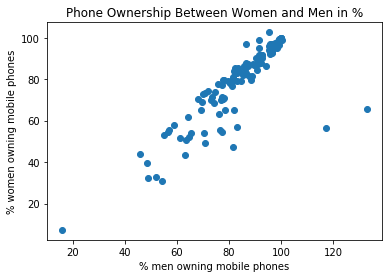

In [39]:
df_sample = df.dropna(subset=['IT_MOB_OWN FEMALE', 'IT_MOB_OWN MALE'])
df_sample.reset_index(inplace=True)
x = pd.DataFrame(df_sample['IT_MOB_OWN MALE'])
y = list(df_sample['IT_MOB_OWN FEMALE'])
plt.scatter(x = x, y = y)
plt.title('Phone Ownership Between Women and Men in %')
plt.xlabel('% men owning mobile phones')
plt.ylabel('% women owning mobile phones')
plt.show()

This scatter shows a relatively straightforward relationship male and female ownership. Any sort of regression preformed on this data would likely preform well. Although there are some notable outliers, passing 100% mark. The only explanation I have of which being for a large number of burner phones being owned by the population. However direct and intuitive relationships aren't the only thing we measure. Substitute another feature, and you can see some of these features don't have much of a relationship to infer. 

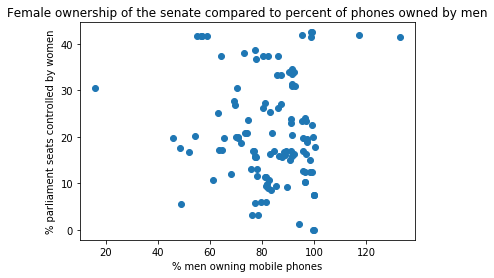

In [40]:
df_sample = df.dropna(subset=['SG_GEN_PARL', 'IT_MOB_OWN MALE'])
df_sample.reset_index(inplace=True)
x = pd.DataFrame(df_sample['IT_MOB_OWN MALE'])
y = list(df_sample['SG_GEN_PARL'])
plt.scatter(x = x, y = y)
plt.title('Female ownership of the senate compared to percent of phones owned by men')
plt.xlabel('% men owning mobile phones')
plt.ylabel('% parliament seats controlled by women')
plt.show()

This scatterplot doesn't appear to demonstrate a very easy relationship, and there's a lot less data here than in the dataset as a whole. A regression preforming on this data would be unlikely to preform well as a whole.

Both of these have a relatively small number of data points to train and test on. While there is enough to preform regressions on, and we will in the larger model, for our example regression we can pull the features that have the most data to compare. 

In [41]:
(df.isna().sum()).sort_values()

SeriesCode
SG_GEN_PARL                           65
IC_GEN_MGTL                         2866
IC_GEN_MGTN                         3538
IT_MOB_OWN FEMALE                   4249
IT_MOB_OWN MALE                     4249
SP_DYN_MRBF18                       4251
SP_DYN_MRBF15                       4251
SH_FPL_INFM                         4271
SH_FPL_INFMCU                       4298
SH_FPL_INFMRH                       4298
SH_FPL_INFMSR                       4298
VC_VAW_MARR 15-49                   4301
VC_VAW_MARR 25-29                   4311
VC_VAW_MARR 35-39                   4313
VC_VAW_MARR 40-44                   4313
VC_VAW_MARR 45-49                   4313
VC_VAW_MARR 30-34                   4314
VC_VAW_MARR 20-24                   4316
VC_VAW_MARR 15-19                   4319
SL_DOM_TSPDDC FEMALE 65+ RURAL      4346
SL_DOM_TSPD FEMALE 65+ RURAL        4346
SL_DOM_TSPD FEMALE 65+ URBAN        4346
VC_VAW_MARR 18-49                   4346
SL_DOM_TSPD MALE 65+ URBAN          4346
SL_DO

An easier and more straightforward regression than the subject of mobile phones, and one with plenty of data, would be managerial positions and senatorial composition. It seems intuitive that the higher the number of parliamentary seats held by women, the higher the proportion of women serving in managerial positions would be. 

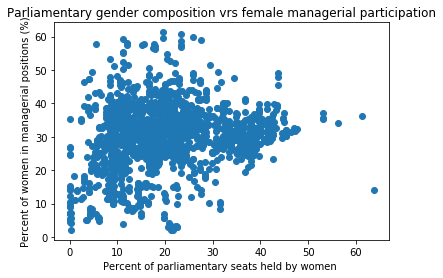

In [42]:
df_sample = df.dropna(subset=['SG_GEN_PARL', 'IC_GEN_MGTL'])
df_sample.reset_index(inplace=True)
x = pd.DataFrame(df_sample['SG_GEN_PARL'])
y = list(df_sample['IC_GEN_MGTL'])
plt.scatter(x = x, y = y)
plt.title('Parliamentary gender composition vrs female managerial participation')
plt.xlabel('Percent of parliamentary seats held by women ')
plt.ylabel('Percent of women in managerial positions (%)')
plt.show()

<a class="anchor" id="Regression_Samples"></a>
## Regression samples

The data vaguely conforms to the hypothesis, but it looks messy. Lets see how the different robust regressions fit compared to the flat linear regression.  Regressions are primarily meassured by the amount of error that they produce, namely the square error. So the more points that are farther away from the predicted value of the regression the more error. The way that this is measured is R squared, which compares the amount of variation that is explained with the regression, or the amount that the data changes that's anticipated by it, and the total amount in the set. R2 represents the portion of variation in the data that the regression explains. Different fields have different standards when it comes to how the property is treated, sociology and psychology, which much of this data would fall under, typically has lower standards to the difficulty of predicting human behavior. For the purposes of these regressions, each regression is going to be fitted, or trained on a training set of the data, each regression attempting to mimimize the amount of error it has within that training set according to it's own parameters, then it is going to be tested within a seperate test set that it has never seen before. Presumably, the higher the score, the better the model is at predicting the values, however, it's very possibly looking at the scatter plot that there isn't much of a relationship to predict. This inability for the regressions to predict the relationships between indicators will be useful down the line. 

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

This is a flat linear regression. It just minimizes error as best it can assigning flat coefficients.

In [44]:

lm = LinearRegression()
lm.fit(X_train, y_train)
print('coefficients: ' + str(lm.coef_))
print('intercept: ' + str(lm.intercept_))
print('score: ' + str(lm.score(X_test, y_test)))

coefficients: [0.17052225]
intercept: 26.986348156331097
score: 0.009626659113051605


The following are robust regressions, they each have means of disregarding outliers, or data points that don't fit the trend, in their fitting process, we won't go into too much detail here about each of them, we're simply scoping out which preform the best on the type of noisy data that we're working with. 

In [45]:

hr = HuberRegressor()


hr.fit(X_train, y_train)
print('coefficients: ' + str(hr.coef_))
print('intercept: ' + str(hr.intercept_))
print('score: ' + str(hr.score(X_test, y_test)))

coefficients: [0.10353811]
intercept: 28.753930387357364
score: 0.010815443955765836


In [46]:

TS = TheilSenRegressor()
TS.fit(X_train, y_train)
print('coefficients: ' + str(TS.coef_))
print('intercept: ' + str(TS.intercept_))
print('score: ' + str(TS.score(X_test, y_test)))

coefficients: [0.1934106]
intercept: 27.25614575195189
score: -0.00638299795392272


Well this isn't terribly encouraging. While the regression did produce an expected relationship, namely that there was a positive relationship between women in parliament and women in managerial positions, none of the models fitted very well, despite having a fair amount of data to work with.  It may be that we need to use the totality of the data that we have available to preform this regression. 

However, there are a couple of issue with this approach. One, there are a large number of missing values in the data, that will have to be integrated into a regression. Two, a multivariable regression will assign coefficients to all values, and, even if it produces a decently preforming regression, will make connections between the indicator in question and every indicator in the set, not terribly selective for building the network. 

A lasso regression pushes many of the features fed into it, down to zero. This is a means of selecting features within a multivariable regression by their connection, so if another indicator is zero'd by the lasso regression, it can be presumed to not be important enough to be connected on the network. 

In [47]:
df_sample = df.dropna(subset=['IC_GEN_MGTL'])
df_sample.reset_index(inplace=True)
df_sample.fillna(0, inplace=True)
x = df_sample.drop(['IC_GEN_MGTL', 'GeoAreaName', 'TimePeriod'], axis=1)
y = list(df_sample['IC_GEN_MGTL'])
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

C:\Users\Ebel\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [48]:

lass = Lasso(alpha=0.01, normalize=True)
lass.fit(X_train, y_train)
print('coefficients: ' + str(lass.coef_))
print('intercept: ' + str(lass.intercept_))
print('score: ' + str(lass.score(X_test, y_test)))

coefficients: [ 0.17360724 -0.         -0.01948437  0.10524064  0.          0.
  0.          0.         -0.05416025 -0.         -0.          0.
  0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.          0.
  0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.         -0.          0.         -0.
 -0.         -0.          0.         -0.         -0.          0.
 -0.         -0.         -0.         -0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.07064126
 -0.          0.1300487   0.          0.          0.          0.
  0.        ]
intercept: 24.885906458214176
score: 0.176037595313815

Although the regression did what we hoped with the coefficients, and preformed better than variable on 2 dimensional regressions, the R2 score is still not good enough to be considered a reasonable connection. Huber preformed the best among our single variable regressions, and lasso on the multivariable. We'll take both methods to the next phase and evaluate the resulting networks. 

<a class="anchor" id="Network_Construction"></a>
## Network Construction

Here we're going to produce a network dataframe object, which looses the hierarchical index of country and year, leaving the indicators in a simple straight index. This is a simpler matrix which retains the pairing between indicator measurements made within a country and year, but looses the the information about which country and which year. This is deliberate, as network of relationships are built around only how the indicators relate to one another, not how they are changing over time, or how different countries are preforming. Said analysis has been done in more thorough and robust reports.

In [49]:
#first getting rid of the awkward pivoted hierarchnical data
network_data = df.reset_index(drop=True)
# network_data = network_data.drop('SeriesCode', axis=1)
network_data

SeriesCode  IC_GEN_MGTL  IC_GEN_MGTN  IT_MOB_OWN FEMALE  IT_MOB_OWN MALE  \
0                   NaN          NaN                NaN              NaN   
1                   NaN          NaN                NaN              NaN   
2                   NaN          NaN                NaN              NaN   
3                   NaN          NaN                NaN              NaN   
4                   NaN          NaN                NaN              NaN   
5                   NaN          NaN                NaN              NaN   
6                   NaN          NaN                NaN              NaN   
7                   NaN          NaN                NaN              NaN   
8                   NaN          NaN                NaN              NaN   
9                   NaN          NaN                NaN              NaN   
10                  NaN          NaN                NaN              NaN   
11                  NaN          NaN                NaN              NaN   
12                  NaN          NaN                NaN              NaN   
13                  NaN          NaN                NaN              NaN   
14                  NaN          NaN                NaN              NaN   
15                  NaN          NaN                NaN              NaN   
16                  NaN          NaN                NaN              NaN   
17                  NaN          NaN                NaN              NaN   
18                  NaN          NaN                NaN              NaN   
19                  NaN          NaN                NaN              NaN   
20                  NaN          NaN                NaN              NaN   
21                 20.5         22.8                NaN              NaN   
22                 23.7         24.4                NaN              NaN   
23                 22.5         22.0                NaN              NaN   
24                 19.1         16.3                NaN              NaN   
25                  NaN          NaN                NaN              NaN   
26                 16.1         14.7                NaN              NaN   
27                 31.9         29.3                NaN              NaN   
28                  NaN          NaN                NaN              NaN   
29                  NaN          NaN                NaN              NaN   
...                 ...          ...                ...              ...   
4346                NaN          NaN                NaN              NaN   
4347                NaN          NaN                NaN              NaN   
4348                NaN          NaN                NaN              NaN   
4349                NaN          NaN                NaN              NaN   
4350                NaN          NaN                NaN              NaN   
4351                NaN          NaN                NaN              NaN   
4352                NaN          NaN                NaN              NaN   
4353                NaN          NaN                NaN              NaN   
4354                NaN          NaN                NaN              NaN   
4355                NaN          NaN                NaN              NaN   
4356                NaN          NaN                NaN              NaN   
4357                NaN          NaN                NaN              NaN   
4358                NaN          NaN                NaN              NaN   
4359                NaN          NaN                NaN              NaN   
4360                NaN          NaN                NaN              NaN   
4361                NaN          NaN                NaN              NaN   
4362                NaN          NaN                NaN              NaN   
4363                NaN          NaN                NaN              NaN   
4364                NaN          NaN                NaN              NaN   
4365                NaN          NaN                NaN              NaN   
4366                NaN          NaN            

This, is pure indicator data, each row representing a year in a country in which they were measured (or more likely not measured, given the number of NaN values) at the same time. This will serve as the data fed to feed our regressions and our network. 

In [50]:
print(len(list(network_data)))
list(network_data)

86


['IC_GEN_MGTL',
 'IC_GEN_MGTN',
 'IT_MOB_OWN FEMALE',
 'IT_MOB_OWN MALE',
 'SG_GEN_PARL',
 'SH_FPL_INFM',
 'SH_FPL_INFMCU',
 'SH_FPL_INFMRH',
 'SH_FPL_INFMSR',
 'SH_STA_FGMS 15-49',
 'SL_DOM_TSPD FEMALE 15-24 RURAL',
 'SL_DOM_TSPD FEMALE 15-24 URBAN',
 'SL_DOM_TSPD FEMALE 15-49 RURAL',
 'SL_DOM_TSPD FEMALE 15-49 URBAN',
 'SL_DOM_TSPD FEMALE 25-44 RURAL',
 'SL_DOM_TSPD FEMALE 25-44 URBAN',
 'SL_DOM_TSPD FEMALE 45-54 RURAL',
 'SL_DOM_TSPD FEMALE 45-54 URBAN',
 'SL_DOM_TSPD FEMALE 55-64 RURAL',
 'SL_DOM_TSPD FEMALE 55-64 URBAN',
 'SL_DOM_TSPD FEMALE 65+ RURAL',
 'SL_DOM_TSPD FEMALE 65+ URBAN',
 'SL_DOM_TSPD MALE 15-24 RURAL',
 'SL_DOM_TSPD MALE 15-24 URBAN',
 'SL_DOM_TSPD MALE 15-49 RURAL',
 'SL_DOM_TSPD MALE 15-49 URBAN',
 'SL_DOM_TSPD MALE 25-44 RURAL',
 'SL_DOM_TSPD MALE 25-44 URBAN',
 'SL_DOM_TSPD MALE 45-54 RURAL',
 'SL_DOM_TSPD MALE 45-54 URBAN',
 'SL_DOM_TSPD MALE 55-64 RURAL',
 'SL_DOM_TSPD MALE 55-64 URBAN',
 'SL_DOM_TSPD MALE 65+ RURAL',
 'SL_DOM_TSPD MALE 65+ URBAN',
 'SL_DOM_T

This is the list of indicators that are going to be analyzed for regressions, and the network. As stated, there are 86 indicators/subpopulation groups within this goal set. Now the network will be filled by these indicators as nodes, and relationships drawn between them using the two regressions discussed above. 

In [51]:
import networkx as nx
indicators=nx.Graph()
indicators.add_nodes_from(list(network_data))
#checking if we have all the indicators in the data
indicators.number_of_nodes()

86

<a class="anchor" id="MVRN"></a>
### Multivariable Regression Network 

As mentioned before, a lasso regression applies a penalty to each coefficient equal to the magnitude of the absolute value of the coefficients. In simpler terms, it sets a qouta of how much coefficient can actually fit into the model. Coefficients that are already small, and less important then other counterparts, are pushed down to zero, afterwhich they no longer effect the model. While there are ways to tweak a lasso regression, the only hyper parameter concerned here is the alpha, which sets how strong this penalty is. The higher the alpha, the more coefficients get penalized to zero, and the fewer connections drawn within the graph. This alpha was chosen based on the network and fit that it produced. While a higher alpha is possible, it reduces the overall performance of the regression across indicators. A lower alpha produced more connections with lower coefficients, reducing the importance of a connection within the network. More indepth view of lasso regression can be found in [this paper](https://www.jstor.org/stable/2346178?seq=1#page_scan_tab_contents)

In [52]:
lass = Lasso(alpha=0.001)

If you are not familiar with python, the following code can look a bit more intimidating then the more basic methods used elsewhere in the notebook. I've put in comments to explain what each part is doing, but a summarized description here might help interested parties. 

This code starts by saving that list of indicators shown earlier. It then goes through every indicator in that list and makes a dataframe composed of instances where it was measured within the network_data. If there are fewer than ten instances of the measurement within the set, it prints a message informing the user, and it drops the indicator from the network, and moves on to the next indicator.

Within the subsection of the dataframe in which the indicator was measured, instances in which other indicators were not measured, and thus have a NaN value, are set to zero. This preserves as much data as possible, while attempting to minimize the impact missing data has on the regression. While 0 is an ideal fill, as when data is missing it won't effect the prediction of the lasso regression, it does impact the way the regression determines coefficients for the data. A lasso regression may still find a high coefficient in a column that has some of these zero values, and use the coefficient to make a prediction, that coefficient is removed in instances of zero, then removing the coefficient and interfering with the models accuracy. Features with a high number of zeros will be discarded by lasso entirely. 

This sample dataframe is then split into training and test sets of data, 80% of the data being used to train and fit the model, 20% being used to test the predictive power of the regression. 

The training subset is fitted to the lasso regression method discussed earlier, and then the function this lasso regression produces is tested on the test data. The resulting score is stored The program then reports the score to the user to give them an idea of how the regressions within the model are. 

If the score produces a less than .70 R2 value, then the indicator is treated as lacking connections to any other indicators, and the program moves on. This leaves a node and a indicator in the list, as we did have data for it, and could have produced a connection if the data supported it. It will, on the network, be represented as a disconnected node.

The coefficients produced by the lasso coefficient are stored in a dictionary with the indicators that produced them. This dictionary is then fed into different loop. 

For each coefficient for the lasso regression performed, the code checks  first if it has an existing connection, moving to the next coefficient if it does. Then it checks if it is negative or positive. It is worth noting that this code excludes indicators that are precisely zero, as many will be in a lasso regression. Each of these generate an "edge" between the indicator pulled before, and the other indicator that produced a value in the coefficient, the weight of which is set to the absolute value of that coefficient. If the coefficient value is positive, then the color of the edge is set to blue, red if it is negative. 


The weight will be used to position nodes closer to nodes that have very high value. 

In [53]:
network_indicators = list(network_data)
for indicator in network_indicators:
    #producing subset dataframe
    df_sample = network_data.dropna(subset=[indicator])
    #checking dataframe length
    if len(df_sample)<20:
        print('Not enough data for indicator {}'.format(indicator))
        #removing the indicator from both the list and the network
        indicators.remove_node(indicator)
        network_indicators.remove(indicator)
        continue
    df_sample.reset_index(drop=True, inplace=True)
    #filling nan values in other columns with 0
    df_sample.fillna(0, inplace=True)
    #splitting into test and train sets
    X_train, X_test, y_train, y_test = train_test_split(df_sample.drop([indicator], axis=1), 
                                                        df_sample[indicator], test_size=0.2)
#     X_train = pd.DataFrame(X_train)
    y_train = list(y_train)
#     X_test = pd.DataFrame(X_test)
    y_test = list(y_test)
    #Fitting the model
    lass.fit(X_train, y_train)
    #scoring the model on test data
    score = lass.score(X_test, y_test)
    #checking if the regression is strong enough to be included.
    if score < .70:
            continue
    #Reporting the R2 value on the test data. 
    print("R2 of {} regression on test data is {}".format(indicator, score))
    Coefficients = dict(zip(np.array(list(X_train)), lass.coef_))
    #Sorting edges into positive and negative colors, and setting weight to the coefficient 
    for coef,val in Coefficients.items(): 
        if indicators.has_edge(indicator, coef) == True: 
            continue
        if val > 0: 
            indicators.add_edge(indicator, coef, weight=(abs(val)), color='b')
        if val < 0: 
            indicators.add_edge(indicator, coef, weight=(abs(val)), color='r')

C:\Users\Ebel\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

R2 of SH_FPL_INFM regression on test data is 0.7469111848692926
R2 of SH_FPL_INFMRH regression on test data is 0.8186184454722629
R2 of SH_FPL_INFMSR regression on test data is 0.7722119834095473


C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

R2 of SL_DOM_TSPD FEMALE 15-24 RURAL regression on test data is 0.9216381144638514
R2 of SL_DOM_TSPD FEMALE 15-24 URBAN regression on test data is 0.8934206498622346
Not enough data for indicator SL_DOM_TSPD FEMALE 15-49 RURAL
R2 of SL_DOM_TSPD FEMALE 25-44 RURAL regression on test data is 0.9373185212624974
R2 of SL_DOM_TSPD FEMALE 25-44 URBAN regression on test data is 0.9857759677496257


C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

R2 of SL_DOM_TSPD FEMALE 45-54 RURAL regression on test data is 0.771128491256828
R2 of SL_DOM_TSPD FEMALE 45-54 URBAN regression on test data is 0.7359148769674968
R2 of SL_DOM_TSPD FEMALE 55-64 RURAL regression on test data is 0.8937213689495813
R2 of SL_DOM_TSPD FEMALE 55-64 URBAN regression on test data is 0.9728597036582534


C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

R2 of SL_DOM_TSPD FEMALE 65+ RURAL regression on test data is 0.9523972020782628
R2 of SL_DOM_TSPD FEMALE 65+ URBAN regression on test data is 0.9722394782006248
R2 of SL_DOM_TSPD MALE 15-24 RURAL regression on test data is 0.8557258373076447
R2 of SL_DOM_TSPD MALE 15-24 URBAN regression on test data is 0.8896512877834839
Not enough data for indicator SL_DOM_TSPD MALE 15-49 RURAL


C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

R2 of SL_DOM_TSPD MALE 25-44 URBAN regression on test data is 0.9523157025471018
R2 of SL_DOM_TSPD MALE 45-54 RURAL regression on test data is 0.8525018605336783
R2 of SL_DOM_TSPD MALE 45-54 URBAN regression on test data is 0.7819320284477098
R2 of SL_DOM_TSPD MALE 55-64 RURAL regression on test data is 0.9098805491203277


C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

R2 of SL_DOM_TSPD MALE 65+ RURAL regression on test data is 0.9309585025726884
R2 of SL_DOM_TSPD MALE 65+ URBAN regression on test data is 0.9360147904981826
R2 of SL_DOM_TSPDCW FEMALE 15-24 RURAL regression on test data is 0.9488894627315595
R2 of SL_DOM_TSPDCW FEMALE 15-24 URBAN regression on test data is 0.9700608364455505


C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

R2 of SL_DOM_TSPDCW FEMALE 25-44 RURAL regression on test data is 0.7495861400631771
R2 of SL_DOM_TSPDCW FEMALE 25-44 URBAN regression on test data is 0.9182259114609305
R2 of SL_DOM_TSPDCW FEMALE 45-54 RURAL regression on test data is 0.8770954530324343


C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

R2 of SL_DOM_TSPDCW MALE 15-24 RURAL regression on test data is 0.7628337380000383
R2 of SL_DOM_TSPDCW MALE 25-44 RURAL regression on test data is 0.7702985784998562


C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

R2 of SL_DOM_TSPDCW MALE 55-64 URBAN regression on test data is 0.8891464990168273
R2 of SL_DOM_TSPDCW MALE 65+ RURAL regression on test data is 0.740179621128802


C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

R2 of SL_DOM_TSPDDC FEMALE 15-24 URBAN regression on test data is 0.9502943732249662
R2 of SL_DOM_TSPDDC FEMALE 25-44 URBAN regression on test data is 0.818951138391703
R2 of SL_DOM_TSPDDC FEMALE 45-54 RURAL regression on test data is 0.9603484278166341


C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

R2 of SL_DOM_TSPDDC FEMALE 45-54 URBAN regression on test data is 0.8827204370914398
R2 of SL_DOM_TSPDDC FEMALE 55-64 RURAL regression on test data is 0.7044215770393576
R2 of SL_DOM_TSPDDC FEMALE 55-64 URBAN regression on test data is 0.9142850391304109
R2 of SL_DOM_TSPDDC FEMALE 65+ RURAL regression on test data is 0.8808523014794227


C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

R2 of SL_DOM_TSPDDC FEMALE 65+ URBAN regression on test data is 0.9393400426919458
R2 of SL_DOM_TSPDDC MALE 15-24 RURAL regression on test data is 0.9099910923465977
R2 of SL_DOM_TSPDDC MALE 15-24 URBAN regression on test data is 0.8455473812442922
R2 of SL_DOM_TSPDDC MALE 25-44 RURAL regression on test data is 0.7232790124392571


C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

R2 of SL_DOM_TSPDDC MALE 45-54 RURAL regression on test data is 0.9667432086921661
R2 of SL_DOM_TSPDDC MALE 55-64 RURAL regression on test data is 0.8660318171025696
R2 of SL_DOM_TSPDDC MALE 55-64 URBAN regression on test data is 0.8708668793608166


C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

R2 of SL_DOM_TSPDDC MALE 65+ URBAN regression on test data is 0.8941876751796749
R2 of SP_DYN_MRBF15 regression on test data is 0.7438919530276277
Not enough data for indicator VC_VAW_MARR 15-24


C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


R2 of VC_VAW_MARR 20-24 regression on test data is 0.7346456775549083
R2 of VC_VAW_MARR 30-34 regression on test data is 0.9388878973111551
R2 of VC_VAW_MARR 40-44 regression on test data is 0.7912099141314387
R2 of VC_VAW_MARR 45-49 regression on test data is 0.73316839026632


C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ebel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

A clear issue here is the number of very high scores. This likely indicates that some of our variables have a very high correlation to one another, which can be a problem for our multivariable lasso regerssion, as it will discard features that may have a valid correlation with the indicator at hand, and only take the nearly perfectly correlated featured. Not terribly helpful or informative. 

Regardless, we'll draw out the graph to get an idea of what is being produced by this method. The following code makes very few decisions worth noting on, however, it does choose Fruchterman Reingold algorithm to position nodes. If you are interested in the details of the method, the paper is available [here.](https://onlinelibrary.wiley.com/doi/abs/10.1002/spe.4380211102)  

In this method, connected nodes attract, the strength of this attraction dependent on the weight, and unconnected nodes repulse. The method displays the lowest energy state, or the state with the lowest amount of contradiction between these two forces. 

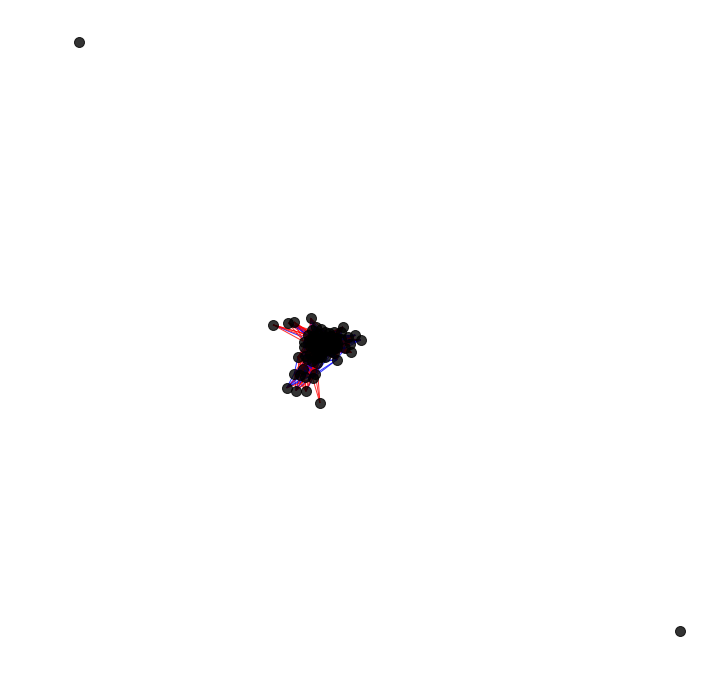

In [54]:
#Drawing the basic graph
edges=indicators.edges()
colors = [indicators[u][v]['color'] for u,v in edges]
plt.rcParams['figure.figsize']=[12,12]
nx.draw_networkx(indicators,
                 pos=nx.spring_layout(indicators,weight='weights'), 
                 node_color='black',
                 edge_color=colors,
                 node_size=100,
                 with_labels=False,
                 alpha=.8
                 )
plt.axis('off')
plt.show()

While this network looks... usable, the high fits reported in the regressions, and the very high weights in between variables indicates that many of these variables are confounded. This compromises the coefficients produced by the regression that connect the network. So while the network can, in theory, be used, it is not necessarily reflective of meaningful relationships within the data. While we could take the top coefficient produced by the lasso regression and merge it to the indicator where the regression produced very high fit, we could try to combine said nodes. However, the initial regression would have still been interfered with on account of the false assumption of independence in between the variables. This is a flaw of multivariable regression. Before we move on from this model though, the clustering of the points makes it rather difficult to read and understand. Moving from a different method to project and position nodes may help. 

Notably, the few unconnected nodes are repulsed very far away from the cluster of connected nodes. While this is good to indicate which nodes are not connected to the network, it's rather poor for illustrating the structure of the nodes that are present. 

[Kamada-Kawai](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.387.7401&rep=rep1&type=pdf) is an alternative layout does not use this repulsion. Instead of using the mass of connected nodes as a repulsive force against the weight of each edge, this method attempts to put edges in their most "relaxed length" or the state that is closest to the weight assigned to them. The total amount of deviation from the relax length is what the algorithm will attempt to minimize. 

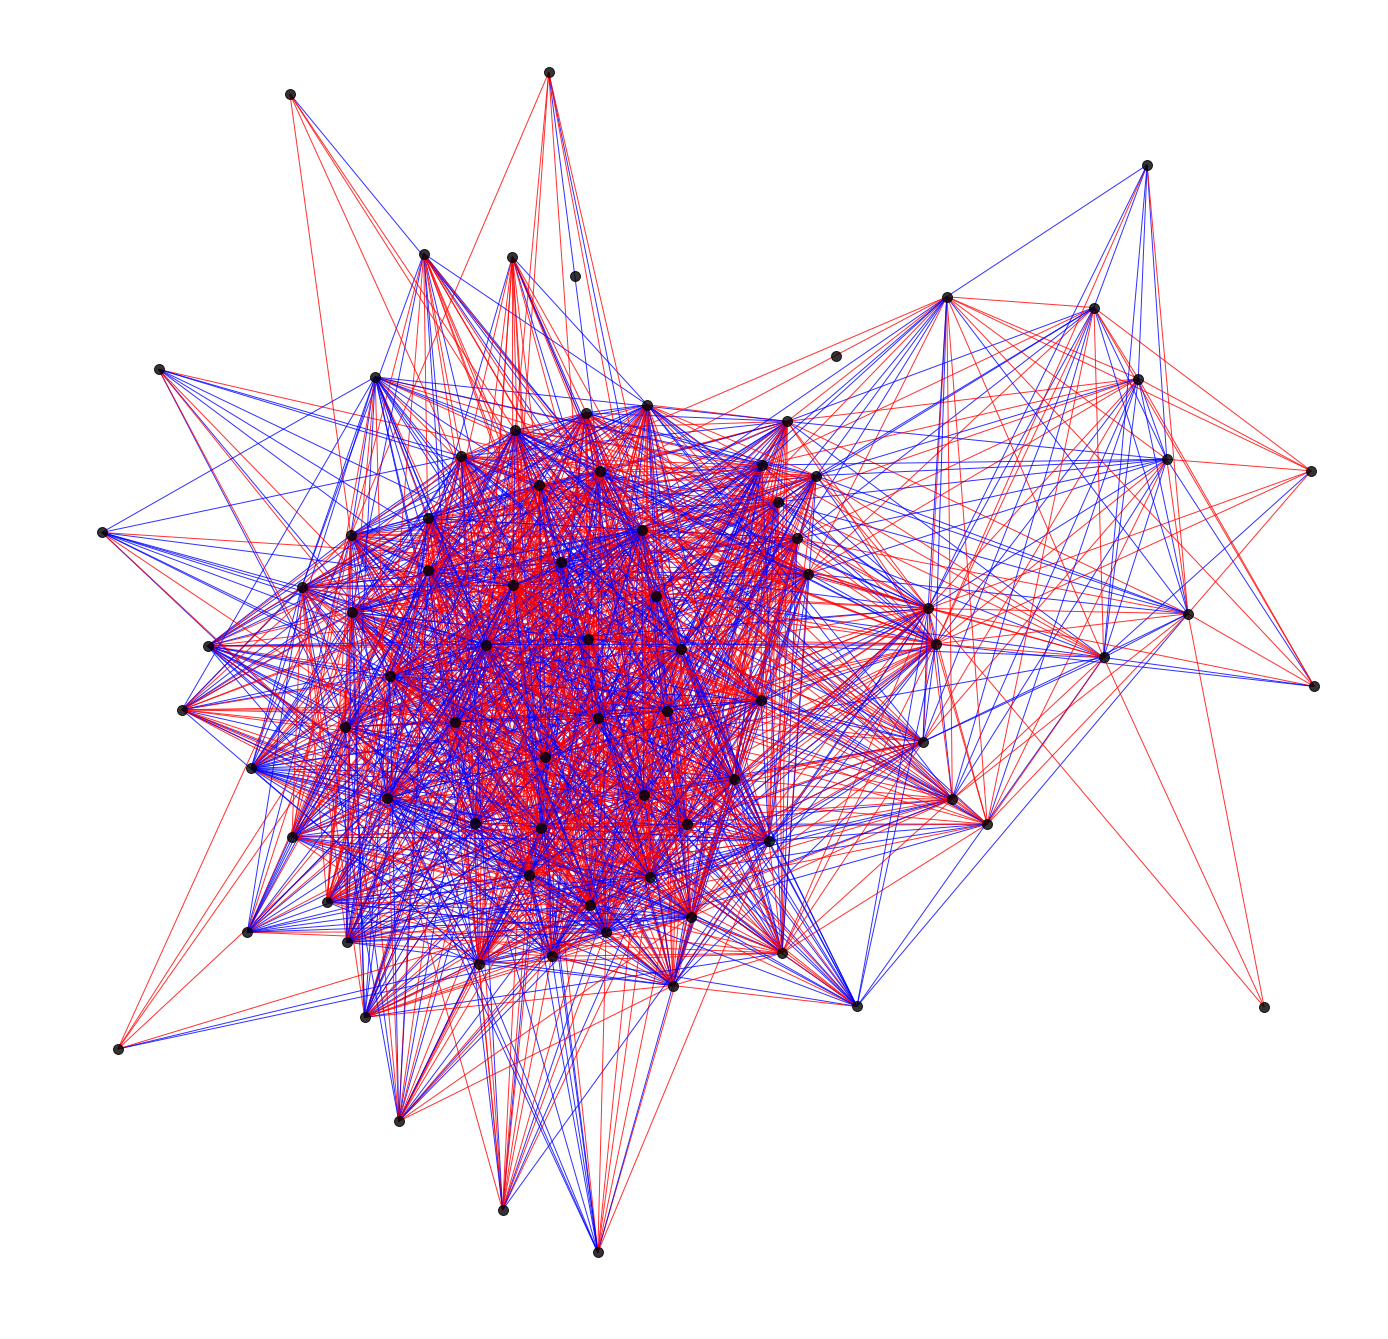

In [55]:
edges=indicators.edges()
colors = [indicators[u][v]['color'] for u,v in edges]
plt.rcParams['figure.figsize']=[24,24]
nx.draw_networkx(indicators,
                 pos=nx.kamada_kawai_layout(indicators,weight='weights'), 
                 node_color='black',
                 edge_color=colors,
                 node_size=100,
                 with_labels=False,
                 alpha=.8
                 )
plt.axis('off')
plt.show()

This isn't much better. The networks is basically a hairball. We can take some meta-stats about the network to be sure. As a whole, it looks like this network has more edges than we want it to be, and potentially more nodes than it really needs, given the high fits of the regressions above. Many conceits were made to the multivariable regression, so lets see if more can be determined using the one on one regressions. 

<a class="anchor" id="SVRN"></a>
### Single Variable Regression Network

   A Huber regressor uses a Huber loss function that identifies a portion of the data as outliers according to a set value, here epsilon. A huber regression then takes the loss caused by these outliers, and reduces it from the squared loss taken by values within the epsilon values, to an absolute loss, reducing the effect of the outliers on the regressions calculation of error. Given that this regression proceeds then as normal, optimizing to reduce error as much as possible, the decision to reduce the amount of error generated by outlier reduces their overall influence on the model. The lower the epsilon, the more data points are qualified as outliers, and the more robust the model against outliers, with the possible risk of minimizing the impact of datapoints that are not outliers. Our epsilon was set slightly lower based on performance, and the need to regress a wide diversity of data, some of which we have seen to have large outliers.

In [56]:

HR = HuberRegressor(epsilon=1.2)

This code is similar, to the previous iteration, with some key differences. Instead of the regression being preformed on the single indicator, and using the totality of the data aside from the indicator to predict it, each pair of indicators has it's own dataset and regression. There are no simulated values here. If a set of indicators has two few instances in which to make a regression on, the code does not attempt to draw a relationship, and alerts the user of the lack of data to do so. The regression proceeds as before, except with just two variables instead of many. With just two variables, the model has less to predict on, so the bar for too high error to be considered for a connection between nodes is lower. The accuracy has been appended to the edge as an attribute for future inspection. 

In [57]:
indicator_list = list(network_data)
indicators=nx.Graph()
indicators.add_nodes_from(list(network_data))
indicators.number_of_nodes()
for indicator in indicator_list:
    df_sample = network_data.dropna(subset=[indicator])
    df_sample.reset_index(drop=True, inplace=True)
    x = df_sample.drop([indicator], axis=1)
    y = list(df_sample[indicator])
    factors = list(x)
    for factor in factors: 
        subset= df_sample.dropna(subset= [factor])
        if len(subset) < 10:
            print('Not enough data for relationship between {} and {}'.format(indicator, factor))
            continue
        X_train, X_test, y_train, y_test = train_test_split(subset[factor], subset[indicator], test_size=0.2)
        X_train = pd.DataFrame(X_train)
        y_train = list(y_train)
        X_test = pd.DataFrame(X_test)
        y_test = list(y_test)
        HR.fit(X_train, y_train)
        score = HR.score(X_test, y_test)
        
        if score > .60: 
            print(HR.coef_)
            if indicators.has_edge(indicator, coef) == True: 
                continue
            if HR.coef_ < 0:
                indicators.add_edge(indicator, factor, weight=(abs(HR.coef_)), color='r', accuracy=score)
            if HR.coef_ > 0:
                indicators.add_edge(indicator, factor, weight=(abs(HR.coef_)), color='b', accuracy=score)



[0.8216823]
Not enough data for relationship between IC_GEN_MGTL and SH_STA_FGMS 15-49
Not enough data for relationship between IC_GEN_MGTL and SL_DOM_TSPD FEMALE 15-49 RURAL
Not enough data for relationship between IC_GEN_MGTL and SL_DOM_TSPD FEMALE 15-49 URBAN
Not enough data for relationship between IC_GEN_MGTL and SL_DOM_TSPD MALE 15-49 RURAL
Not enough data for relationship between IC_GEN_MGTL and SL_DOM_TSPD MALE 15-49 URBAN
Not enough data for relationship between IC_GEN_MGTL and VC_VAW_MARR 15-24
Not enough data for relationship between IC_GEN_MGTN and SH_FPL_INFM
Not enough data for relationship between IC_GEN_MGTN and SH_FPL_INFMCU
Not enough data for relationship between IC_GEN_MGTN and SH_FPL_INFMRH
Not enough data for relationship between IC_GEN_MGTN and SH_FPL_INFMSR
Not enough data for relationship between IC_GEN_MGTN and SH_STA_FGMS 15-49
Not enough data for relationship between IC_GEN_MGTN and SL_DOM_TSPD FEMALE 15-49 RURAL
Not enough data for relationship between IC_G

Not enough data for relationship between IT_MOB_OWN FEMALE and SP_DYN_MRBF18
Not enough data for relationship between IT_MOB_OWN FEMALE and VC_VAW_MARR 15-19
Not enough data for relationship between IT_MOB_OWN FEMALE and VC_VAW_MARR 15-24
Not enough data for relationship between IT_MOB_OWN FEMALE and VC_VAW_MARR 15-49
Not enough data for relationship between IT_MOB_OWN FEMALE and VC_VAW_MARR 18-49
Not enough data for relationship between IT_MOB_OWN FEMALE and VC_VAW_MARR 20-24
Not enough data for relationship between IT_MOB_OWN FEMALE and VC_VAW_MARR 25-29
Not enough data for relationship between IT_MOB_OWN FEMALE and VC_VAW_MARR 30-34
Not enough data for relationship between IT_MOB_OWN FEMALE and VC_VAW_MARR 35-39
Not enough data for relationship between IT_MOB_OWN FEMALE and VC_VAW_MARR 40-44
Not enough data for relationship between IT_MOB_OWN FEMALE and VC_VAW_MARR 45-49
[0.79582411]
Not enough data for relationship between IT_MOB_OWN MALE and SH_FPL_INFM
Not enough data for relatio

Not enough data for relationship between SG_GEN_PARL and SL_DOM_TSPD MALE 15-49 RURAL
Not enough data for relationship between SG_GEN_PARL and SL_DOM_TSPD MALE 15-49 URBAN
[2.88349668]
[2.58525712]
[1.8268069]
Not enough data for relationship between SG_GEN_PARL and VC_VAW_MARR 15-24
Not enough data for relationship between SH_FPL_INFM and IC_GEN_MGTN
Not enough data for relationship between SH_FPL_INFM and IT_MOB_OWN FEMALE
Not enough data for relationship between SH_FPL_INFM and IT_MOB_OWN MALE
[0.9214063]
Not enough data for relationship between SH_FPL_INFM and SL_DOM_TSPD FEMALE 15-24 RURAL
Not enough data for relationship between SH_FPL_INFM and SL_DOM_TSPD FEMALE 15-24 URBAN
Not enough data for relationship between SH_FPL_INFM and SL_DOM_TSPD FEMALE 15-49 RURAL
Not enough data for relationship between SH_FPL_INFM and SL_DOM_TSPD FEMALE 15-49 URBAN
Not enough data for relationship between SH_FPL_INFM and SL_DOM_TSPD FEMALE 25-44 RURAL
Not enough data for relationship between SH_FP

Not enough data for relationship between SH_FPL_INFMRH and IT_MOB_OWN FEMALE
Not enough data for relationship between SH_FPL_INFMRH and IT_MOB_OWN MALE
[0.99317692]
Not enough data for relationship between SH_FPL_INFMRH and SL_DOM_TSPD FEMALE 15-24 RURAL
Not enough data for relationship between SH_FPL_INFMRH and SL_DOM_TSPD FEMALE 15-24 URBAN
Not enough data for relationship between SH_FPL_INFMRH and SL_DOM_TSPD FEMALE 15-49 RURAL
Not enough data for relationship between SH_FPL_INFMRH and SL_DOM_TSPD FEMALE 15-49 URBAN
Not enough data for relationship between SH_FPL_INFMRH and SL_DOM_TSPD FEMALE 25-44 RURAL
Not enough data for relationship between SH_FPL_INFMRH and SL_DOM_TSPD FEMALE 25-44 URBAN
Not enough data for relationship between SH_FPL_INFMRH and SL_DOM_TSPD FEMALE 45-54 RURAL
Not enough data for relationship between SH_FPL_INFMRH and SL_DOM_TSPD FEMALE 45-54 URBAN
Not enough data for relationship between SH_FPL_INFMRH and SL_DOM_TSPD FEMALE 55-64 RURAL
Not enough data for relat

Not enough data for relationship between SH_FPL_INFMSR and SL_DOM_TSPDCW MALE 65+ URBAN
Not enough data for relationship between SH_FPL_INFMSR and SL_DOM_TSPDDC FEMALE 15-24 RURAL
Not enough data for relationship between SH_FPL_INFMSR and SL_DOM_TSPDDC FEMALE 15-24 URBAN
Not enough data for relationship between SH_FPL_INFMSR and SL_DOM_TSPDDC FEMALE 25-44 RURAL
Not enough data for relationship between SH_FPL_INFMSR and SL_DOM_TSPDDC FEMALE 25-44 URBAN
Not enough data for relationship between SH_FPL_INFMSR and SL_DOM_TSPDDC FEMALE 45-54 RURAL
Not enough data for relationship between SH_FPL_INFMSR and SL_DOM_TSPDDC FEMALE 45-54 URBAN
Not enough data for relationship between SH_FPL_INFMSR and SL_DOM_TSPDDC FEMALE 55-64 RURAL
Not enough data for relationship between SH_FPL_INFMSR and SL_DOM_TSPDDC FEMALE 55-64 URBAN
Not enough data for relationship between SH_FPL_INFMSR and SL_DOM_TSPDDC FEMALE 65+ RURAL
Not enough data for relationship between SH_FPL_INFMSR and SL_DOM_TSPDDC FEMALE 65+ UR

Not enough data for relationship between SL_DOM_TSPD FEMALE 15-24 RURAL and SH_FPL_INFM
Not enough data for relationship between SL_DOM_TSPD FEMALE 15-24 RURAL and SH_FPL_INFMCU
Not enough data for relationship between SL_DOM_TSPD FEMALE 15-24 RURAL and SH_FPL_INFMRH
Not enough data for relationship between SL_DOM_TSPD FEMALE 15-24 RURAL and SH_FPL_INFMSR
Not enough data for relationship between SL_DOM_TSPD FEMALE 15-24 RURAL and SH_STA_FGMS 15-49
[1.36096942]
Not enough data for relationship between SL_DOM_TSPD FEMALE 15-24 RURAL and SL_DOM_TSPD FEMALE 15-49 RURAL
Not enough data for relationship between SL_DOM_TSPD FEMALE 15-24 RURAL and SL_DOM_TSPD FEMALE 15-49 URBAN
[0.93553732]
[1.16717045]
Not enough data for relationship between SL_DOM_TSPD FEMALE 15-24 RURAL and SL_DOM_TSPD MALE 15-49 RURAL
Not enough data for relationship between SL_DOM_TSPD FEMALE 15-24 RURAL and SL_DOM_TSPD MALE 15-49 URBAN
[2.01029535]
[1.36285064]
[1.19397753]
[1.68498567]
Not enough data for relationship 

Not enough data for relationship between SL_DOM_TSPD FEMALE 15-49 URBAN and SH_FPL_INFMSR
Not enough data for relationship between SL_DOM_TSPD FEMALE 15-49 URBAN and SH_STA_FGMS 15-49
Not enough data for relationship between SL_DOM_TSPD FEMALE 15-49 URBAN and SL_DOM_TSPD FEMALE 15-24 RURAL
Not enough data for relationship between SL_DOM_TSPD FEMALE 15-49 URBAN and SL_DOM_TSPD FEMALE 15-24 URBAN
Not enough data for relationship between SL_DOM_TSPD FEMALE 15-49 URBAN and SL_DOM_TSPD FEMALE 15-49 RURAL
Not enough data for relationship between SL_DOM_TSPD FEMALE 15-49 URBAN and SL_DOM_TSPD FEMALE 25-44 RURAL
Not enough data for relationship between SL_DOM_TSPD FEMALE 15-49 URBAN and SL_DOM_TSPD FEMALE 25-44 URBAN
Not enough data for relationship between SL_DOM_TSPD FEMALE 15-49 URBAN and SL_DOM_TSPD FEMALE 45-54 RURAL
Not enough data for relationship between SL_DOM_TSPD FEMALE 15-49 URBAN and SL_DOM_TSPD FEMALE 45-54 URBAN
Not enough data for relationship between SL_DOM_TSPD FEMALE 15-49 U

[1.18357861]
Not enough data for relationship between SL_DOM_TSPD FEMALE 25-44 RURAL and SL_DOM_TSPD MALE 15-49 RURAL
Not enough data for relationship between SL_DOM_TSPD FEMALE 25-44 RURAL and SL_DOM_TSPD MALE 15-49 URBAN
[1.16862138]
[1.54298777]
[1.02500861]
Not enough data for relationship between SL_DOM_TSPD FEMALE 25-44 RURAL and SP_DYN_MRBF15
Not enough data for relationship between SL_DOM_TSPD FEMALE 25-44 RURAL and SP_DYN_MRBF18
Not enough data for relationship between SL_DOM_TSPD FEMALE 25-44 RURAL and VC_VAW_MARR 15-19
Not enough data for relationship between SL_DOM_TSPD FEMALE 25-44 RURAL and VC_VAW_MARR 15-24
Not enough data for relationship between SL_DOM_TSPD FEMALE 25-44 RURAL and VC_VAW_MARR 15-49
Not enough data for relationship between SL_DOM_TSPD FEMALE 25-44 RURAL and VC_VAW_MARR 18-49
Not enough data for relationship between SL_DOM_TSPD FEMALE 25-44 RURAL and VC_VAW_MARR 20-24
Not enough data for relationship between SL_DOM_TSPD FEMALE 25-44 RURAL and VC_VAW_MARR 

[1.36913595]
[0.45555912]
[0.73589459]
[0.90950562]
[1.03070563]
Not enough data for relationship between SL_DOM_TSPD FEMALE 55-64 RURAL and SP_DYN_MRBF15
Not enough data for relationship between SL_DOM_TSPD FEMALE 55-64 RURAL and SP_DYN_MRBF18
Not enough data for relationship between SL_DOM_TSPD FEMALE 55-64 RURAL and VC_VAW_MARR 15-19
Not enough data for relationship between SL_DOM_TSPD FEMALE 55-64 RURAL and VC_VAW_MARR 15-24
Not enough data for relationship between SL_DOM_TSPD FEMALE 55-64 RURAL and VC_VAW_MARR 15-49
Not enough data for relationship between SL_DOM_TSPD FEMALE 55-64 RURAL and VC_VAW_MARR 18-49
Not enough data for relationship between SL_DOM_TSPD FEMALE 55-64 RURAL and VC_VAW_MARR 20-24
Not enough data for relationship between SL_DOM_TSPD FEMALE 55-64 RURAL and VC_VAW_MARR 25-29
Not enough data for relationship between SL_DOM_TSPD FEMALE 55-64 RURAL and VC_VAW_MARR 30-34
Not enough data for relationship between SL_DOM_TSPD FEMALE 55-64 RURAL and VC_VAW_MARR 35-39
Not

Not enough data for relationship between SL_DOM_TSPD MALE 15-24 RURAL and SL_DOM_TSPD MALE 15-49 RURAL
Not enough data for relationship between SL_DOM_TSPD MALE 15-24 RURAL and SL_DOM_TSPD MALE 15-49 URBAN
Not enough data for relationship between SL_DOM_TSPD MALE 15-24 RURAL and SP_DYN_MRBF15
Not enough data for relationship between SL_DOM_TSPD MALE 15-24 RURAL and SP_DYN_MRBF18
Not enough data for relationship between SL_DOM_TSPD MALE 15-24 RURAL and VC_VAW_MARR 15-19
Not enough data for relationship between SL_DOM_TSPD MALE 15-24 RURAL and VC_VAW_MARR 15-24
Not enough data for relationship between SL_DOM_TSPD MALE 15-24 RURAL and VC_VAW_MARR 15-49
Not enough data for relationship between SL_DOM_TSPD MALE 15-24 RURAL and VC_VAW_MARR 18-49
Not enough data for relationship between SL_DOM_TSPD MALE 15-24 RURAL and VC_VAW_MARR 20-24
Not enough data for relationship between SL_DOM_TSPD MALE 15-24 RURAL and VC_VAW_MARR 25-29
Not enough data for relationship between SL_DOM_TSPD MALE 15-24 RU

Not enough data for relationship between SL_DOM_TSPD MALE 15-49 RURAL and SL_DOM_TSPDDC MALE 45-54 RURAL
Not enough data for relationship between SL_DOM_TSPD MALE 15-49 RURAL and SL_DOM_TSPDDC MALE 45-54 URBAN
Not enough data for relationship between SL_DOM_TSPD MALE 15-49 RURAL and SL_DOM_TSPDDC MALE 55-64 RURAL
Not enough data for relationship between SL_DOM_TSPD MALE 15-49 RURAL and SL_DOM_TSPDDC MALE 55-64 URBAN
Not enough data for relationship between SL_DOM_TSPD MALE 15-49 RURAL and SL_DOM_TSPDDC MALE 65+ RURAL
Not enough data for relationship between SL_DOM_TSPD MALE 15-49 RURAL and SL_DOM_TSPDDC MALE 65+ URBAN
Not enough data for relationship between SL_DOM_TSPD MALE 15-49 RURAL and SP_DYN_MRBF15
Not enough data for relationship between SL_DOM_TSPD MALE 15-49 RURAL and SP_DYN_MRBF18
Not enough data for relationship between SL_DOM_TSPD MALE 15-49 RURAL and VC_VAW_MARR 15-19
Not enough data for relationship between SL_DOM_TSPD MALE 15-49 RURAL and VC_VAW_MARR 15-24
Not enough dat

Not enough data for relationship between SL_DOM_TSPD MALE 25-44 RURAL and IT_MOB_OWN FEMALE
Not enough data for relationship between SL_DOM_TSPD MALE 25-44 RURAL and IT_MOB_OWN MALE
Not enough data for relationship between SL_DOM_TSPD MALE 25-44 RURAL and SH_FPL_INFM
Not enough data for relationship between SL_DOM_TSPD MALE 25-44 RURAL and SH_FPL_INFMCU
Not enough data for relationship between SL_DOM_TSPD MALE 25-44 RURAL and SH_FPL_INFMRH
Not enough data for relationship between SL_DOM_TSPD MALE 25-44 RURAL and SH_FPL_INFMSR
Not enough data for relationship between SL_DOM_TSPD MALE 25-44 RURAL and SH_STA_FGMS 15-49
Not enough data for relationship between SL_DOM_TSPD MALE 25-44 RURAL and SL_DOM_TSPD FEMALE 15-49 RURAL
Not enough data for relationship between SL_DOM_TSPD MALE 25-44 RURAL and SL_DOM_TSPD FEMALE 15-49 URBAN
Not enough data for relationship between SL_DOM_TSPD MALE 25-44 RURAL and SL_DOM_TSPD MALE 15-49 RURAL
Not enough data for relationship between SL_DOM_TSPD MALE 25-44

Not enough data for relationship between SL_DOM_TSPD MALE 55-64 RURAL and SL_DOM_TSPD MALE 15-49 RURAL
Not enough data for relationship between SL_DOM_TSPD MALE 55-64 RURAL and SL_DOM_TSPD MALE 15-49 URBAN
[1.05382099]
[1.03513758]
[1.21692389]
[0.79997556]
[0.93170478]
[1.29748965]
[1.29544758]
[1.24083155]
[0.93238455]
[1.08307693]
[0.75625953]
[0.95051065]
Not enough data for relationship between SL_DOM_TSPD MALE 55-64 RURAL and SP_DYN_MRBF15
Not enough data for relationship between SL_DOM_TSPD MALE 55-64 RURAL and SP_DYN_MRBF18
Not enough data for relationship between SL_DOM_TSPD MALE 55-64 RURAL and VC_VAW_MARR 15-19
Not enough data for relationship between SL_DOM_TSPD MALE 55-64 RURAL and VC_VAW_MARR 15-24
Not enough data for relationship between SL_DOM_TSPD MALE 55-64 RURAL and VC_VAW_MARR 15-49
Not enough data for relationship between SL_DOM_TSPD MALE 55-64 RURAL and VC_VAW_MARR 18-49
Not enough data for relationship between SL_DOM_TSPD MALE 55-64 RURAL and VC_VAW_MARR 20-24
No

Not enough data for relationship between SL_DOM_TSPDCW FEMALE 15-24 RURAL and SL_DOM_TSPD MALE 15-49 RURAL
Not enough data for relationship between SL_DOM_TSPDCW FEMALE 15-24 RURAL and SL_DOM_TSPD MALE 15-49 URBAN
[1.09846144]
[0.55262788]
[1.12391218]
[2.01814724]
[2.38064656]
[3.25200996]
[2.77787912]
Not enough data for relationship between SL_DOM_TSPDCW FEMALE 15-24 RURAL and SP_DYN_MRBF15
Not enough data for relationship between SL_DOM_TSPDCW FEMALE 15-24 RURAL and SP_DYN_MRBF18
Not enough data for relationship between SL_DOM_TSPDCW FEMALE 15-24 RURAL and VC_VAW_MARR 15-19
Not enough data for relationship between SL_DOM_TSPDCW FEMALE 15-24 RURAL and VC_VAW_MARR 15-24
Not enough data for relationship between SL_DOM_TSPDCW FEMALE 15-24 RURAL and VC_VAW_MARR 15-49
Not enough data for relationship between SL_DOM_TSPDCW FEMALE 15-24 RURAL and VC_VAW_MARR 18-49
Not enough data for relationship between SL_DOM_TSPDCW FEMALE 15-24 RURAL and VC_VAW_MARR 20-24
Not enough data for relationshi

[0.43664217]
[0.39375527]
[0.35057168]
[1.65198855]
[1.59764665]
Not enough data for relationship between SL_DOM_TSPDCW FEMALE 45-54 RURAL and SP_DYN_MRBF15
Not enough data for relationship between SL_DOM_TSPDCW FEMALE 45-54 RURAL and SP_DYN_MRBF18
Not enough data for relationship between SL_DOM_TSPDCW FEMALE 45-54 RURAL and VC_VAW_MARR 15-19
Not enough data for relationship between SL_DOM_TSPDCW FEMALE 45-54 RURAL and VC_VAW_MARR 15-24
Not enough data for relationship between SL_DOM_TSPDCW FEMALE 45-54 RURAL and VC_VAW_MARR 15-49
Not enough data for relationship between SL_DOM_TSPDCW FEMALE 45-54 RURAL and VC_VAW_MARR 18-49
Not enough data for relationship between SL_DOM_TSPDCW FEMALE 45-54 RURAL and VC_VAW_MARR 20-24
Not enough data for relationship between SL_DOM_TSPDCW FEMALE 45-54 RURAL and VC_VAW_MARR 25-29
Not enough data for relationship between SL_DOM_TSPDCW FEMALE 45-54 RURAL and VC_VAW_MARR 30-34
Not enough data for relationship between SL_DOM_TSPDCW FEMALE 45-54 RURAL and V

[0.22836827]
[0.75091911]
[0.82752426]
[1.15477172]
[1.60092913]
Not enough data for relationship between SL_DOM_TSPDCW FEMALE 65+ RURAL and SP_DYN_MRBF15
Not enough data for relationship between SL_DOM_TSPDCW FEMALE 65+ RURAL and SP_DYN_MRBF18
Not enough data for relationship between SL_DOM_TSPDCW FEMALE 65+ RURAL and VC_VAW_MARR 15-19
Not enough data for relationship between SL_DOM_TSPDCW FEMALE 65+ RURAL and VC_VAW_MARR 15-24
Not enough data for relationship between SL_DOM_TSPDCW FEMALE 65+ RURAL and VC_VAW_MARR 15-49
Not enough data for relationship between SL_DOM_TSPDCW FEMALE 65+ RURAL and VC_VAW_MARR 18-49
Not enough data for relationship between SL_DOM_TSPDCW FEMALE 65+ RURAL and VC_VAW_MARR 20-24
Not enough data for relationship between SL_DOM_TSPDCW FEMALE 65+ RURAL and VC_VAW_MARR 25-29
Not enough data for relationship between SL_DOM_TSPDCW FEMALE 65+ RURAL and VC_VAW_MARR 30-34
Not enough data for relationship between SL_DOM_TSPDCW FEMALE 65+ RURAL and VC_VAW_MARR 35-39
Not

[0.32755187]
Not enough data for relationship between SL_DOM_TSPDCW MALE 25-44 RURAL and SP_DYN_MRBF15
Not enough data for relationship between SL_DOM_TSPDCW MALE 25-44 RURAL and SP_DYN_MRBF18
Not enough data for relationship between SL_DOM_TSPDCW MALE 25-44 RURAL and VC_VAW_MARR 15-19
Not enough data for relationship between SL_DOM_TSPDCW MALE 25-44 RURAL and VC_VAW_MARR 15-24
Not enough data for relationship between SL_DOM_TSPDCW MALE 25-44 RURAL and VC_VAW_MARR 15-49
Not enough data for relationship between SL_DOM_TSPDCW MALE 25-44 RURAL and VC_VAW_MARR 18-49
Not enough data for relationship between SL_DOM_TSPDCW MALE 25-44 RURAL and VC_VAW_MARR 20-24
Not enough data for relationship between SL_DOM_TSPDCW MALE 25-44 RURAL and VC_VAW_MARR 25-29
Not enough data for relationship between SL_DOM_TSPDCW MALE 25-44 RURAL and VC_VAW_MARR 30-34
Not enough data for relationship between SL_DOM_TSPDCW MALE 25-44 RURAL and VC_VAW_MARR 35-39
Not enough data for relationship between SL_DOM_TSPDCW 

[0.14260315]
[0.25621126]
[0.42492811]
[0.66921726]
[0.70532547]
[0.23918183]
[0.58224322]
[1.00587733]
[0.80719943]
[0.71381671]
Not enough data for relationship between SL_DOM_TSPDCW MALE 55-64 RURAL and SP_DYN_MRBF15
Not enough data for relationship between SL_DOM_TSPDCW MALE 55-64 RURAL and SP_DYN_MRBF18
Not enough data for relationship between SL_DOM_TSPDCW MALE 55-64 RURAL and VC_VAW_MARR 15-19
Not enough data for relationship between SL_DOM_TSPDCW MALE 55-64 RURAL and VC_VAW_MARR 15-24
Not enough data for relationship between SL_DOM_TSPDCW MALE 55-64 RURAL and VC_VAW_MARR 15-49
Not enough data for relationship between SL_DOM_TSPDCW MALE 55-64 RURAL and VC_VAW_MARR 18-49
Not enough data for relationship between SL_DOM_TSPDCW MALE 55-64 RURAL and VC_VAW_MARR 20-24
Not enough data for relationship between SL_DOM_TSPDCW MALE 55-64 RURAL and VC_VAW_MARR 25-29
Not enough data for relationship between SL_DOM_TSPDCW MALE 55-64 RURAL and VC_VAW_MARR 30-34
Not enough data for relationship

[1.29852582]
[0.73350088]
Not enough data for relationship between SL_DOM_TSPDDC FEMALE 15-24 RURAL and SP_DYN_MRBF15
Not enough data for relationship between SL_DOM_TSPDDC FEMALE 15-24 RURAL and SP_DYN_MRBF18
Not enough data for relationship between SL_DOM_TSPDDC FEMALE 15-24 RURAL and VC_VAW_MARR 15-19
Not enough data for relationship between SL_DOM_TSPDDC FEMALE 15-24 RURAL and VC_VAW_MARR 15-24
Not enough data for relationship between SL_DOM_TSPDDC FEMALE 15-24 RURAL and VC_VAW_MARR 15-49
Not enough data for relationship between SL_DOM_TSPDDC FEMALE 15-24 RURAL and VC_VAW_MARR 18-49
Not enough data for relationship between SL_DOM_TSPDDC FEMALE 15-24 RURAL and VC_VAW_MARR 20-24
Not enough data for relationship between SL_DOM_TSPDDC FEMALE 15-24 RURAL and VC_VAW_MARR 25-29
Not enough data for relationship between SL_DOM_TSPDDC FEMALE 15-24 RURAL and VC_VAW_MARR 30-34
Not enough data for relationship between SL_DOM_TSPDDC FEMALE 15-24 RURAL and VC_VAW_MARR 35-39
Not enough data for re

Not enough data for relationship between SL_DOM_TSPDDC FEMALE 45-54 RURAL and SL_DOM_TSPD MALE 15-49 RURAL
Not enough data for relationship between SL_DOM_TSPDDC FEMALE 45-54 RURAL and SL_DOM_TSPD MALE 15-49 URBAN
[0.80683606]
[0.9341412]
[0.96327598]
Not enough data for relationship between SL_DOM_TSPDDC FEMALE 45-54 RURAL and SP_DYN_MRBF15
Not enough data for relationship between SL_DOM_TSPDDC FEMALE 45-54 RURAL and SP_DYN_MRBF18
Not enough data for relationship between SL_DOM_TSPDDC FEMALE 45-54 RURAL and VC_VAW_MARR 15-19
Not enough data for relationship between SL_DOM_TSPDDC FEMALE 45-54 RURAL and VC_VAW_MARR 15-24
Not enough data for relationship between SL_DOM_TSPDDC FEMALE 45-54 RURAL and VC_VAW_MARR 15-49
Not enough data for relationship between SL_DOM_TSPDDC FEMALE 45-54 RURAL and VC_VAW_MARR 18-49
Not enough data for relationship between SL_DOM_TSPDDC FEMALE 45-54 RURAL and VC_VAW_MARR 20-24
Not enough data for relationship between SL_DOM_TSPDDC FEMALE 45-54 RURAL and VC_VAW

[1.00765054]
[1.27482634]
Not enough data for relationship between SL_DOM_TSPDDC FEMALE 65+ RURAL and SL_DOM_TSPD MALE 15-49 RURAL
Not enough data for relationship between SL_DOM_TSPDDC FEMALE 65+ RURAL and SL_DOM_TSPD MALE 15-49 URBAN
[0.85860675]
[0.8494678]
[0.66957417]
[0.70767137]
Not enough data for relationship between SL_DOM_TSPDDC FEMALE 65+ RURAL and SP_DYN_MRBF15
Not enough data for relationship between SL_DOM_TSPDDC FEMALE 65+ RURAL and SP_DYN_MRBF18
Not enough data for relationship between SL_DOM_TSPDDC FEMALE 65+ RURAL and VC_VAW_MARR 15-19
Not enough data for relationship between SL_DOM_TSPDDC FEMALE 65+ RURAL and VC_VAW_MARR 15-24
Not enough data for relationship between SL_DOM_TSPDDC FEMALE 65+ RURAL and VC_VAW_MARR 15-49
Not enough data for relationship between SL_DOM_TSPDDC FEMALE 65+ RURAL and VC_VAW_MARR 18-49
Not enough data for relationship between SL_DOM_TSPDDC FEMALE 65+ RURAL and VC_VAW_MARR 20-24
Not enough data for relationship between SL_DOM_TSPDDC FEMALE 6

[0.8655705]
[0.6781432]
[0.77177583]
[1.21804452]
[1.04647394]
[0.79770552]
[0.56406817]
[0.58056356]
Not enough data for relationship between SL_DOM_TSPDDC MALE 25-44 RURAL and SP_DYN_MRBF15
Not enough data for relationship between SL_DOM_TSPDDC MALE 25-44 RURAL and SP_DYN_MRBF18
Not enough data for relationship between SL_DOM_TSPDDC MALE 25-44 RURAL and VC_VAW_MARR 15-19
Not enough data for relationship between SL_DOM_TSPDDC MALE 25-44 RURAL and VC_VAW_MARR 15-24
Not enough data for relationship between SL_DOM_TSPDDC MALE 25-44 RURAL and VC_VAW_MARR 15-49
Not enough data for relationship between SL_DOM_TSPDDC MALE 25-44 RURAL and VC_VAW_MARR 18-49
Not enough data for relationship between SL_DOM_TSPDDC MALE 25-44 RURAL and VC_VAW_MARR 20-24
Not enough data for relationship between SL_DOM_TSPDDC MALE 25-44 RURAL and VC_VAW_MARR 25-29
Not enough data for relationship between SL_DOM_TSPDDC MALE 25-44 RURAL and VC_VAW_MARR 30-34
Not enough data for relationship between SL_DOM_TSPDDC MALE 

Not enough data for relationship between SL_DOM_TSPDDC MALE 55-64 RURAL and SL_DOM_TSPD MALE 15-49 URBAN
[0.93235755]
[1.16640138]
[1.05684715]
[0.86375815]
[0.85412295]
[-0.27393751]
[1.61414578]
[1.27059871]
[1.5384358]
[1.35738171]
[1.36166112]
[1.11240353]
[0.8645344]
[0.98929845]
Not enough data for relationship between SL_DOM_TSPDDC MALE 55-64 RURAL and SP_DYN_MRBF15
Not enough data for relationship between SL_DOM_TSPDDC MALE 55-64 RURAL and SP_DYN_MRBF18
Not enough data for relationship between SL_DOM_TSPDDC MALE 55-64 RURAL and VC_VAW_MARR 15-19
Not enough data for relationship between SL_DOM_TSPDDC MALE 55-64 RURAL and VC_VAW_MARR 15-24
Not enough data for relationship between SL_DOM_TSPDDC MALE 55-64 RURAL and VC_VAW_MARR 15-49
Not enough data for relationship between SL_DOM_TSPDDC MALE 55-64 RURAL and VC_VAW_MARR 18-49
Not enough data for relationship between SL_DOM_TSPDDC MALE 55-64 RURAL and VC_VAW_MARR 20-24
Not enough data for relationship between SL_DOM_TSPDDC MALE 55-6

Not enough data for relationship between SP_DYN_MRBF15 and SL_DOM_TSPDCW MALE 45-54 URBAN
Not enough data for relationship between SP_DYN_MRBF15 and SL_DOM_TSPDCW MALE 55-64 RURAL
Not enough data for relationship between SP_DYN_MRBF15 and SL_DOM_TSPDCW MALE 55-64 URBAN
Not enough data for relationship between SP_DYN_MRBF15 and SL_DOM_TSPDCW MALE 65+ RURAL
Not enough data for relationship between SP_DYN_MRBF15 and SL_DOM_TSPDCW MALE 65+ URBAN
Not enough data for relationship between SP_DYN_MRBF15 and SL_DOM_TSPDDC FEMALE 15-24 RURAL
Not enough data for relationship between SP_DYN_MRBF15 and SL_DOM_TSPDDC FEMALE 15-24 URBAN
Not enough data for relationship between SP_DYN_MRBF15 and SL_DOM_TSPDDC FEMALE 25-44 RURAL
Not enough data for relationship between SP_DYN_MRBF15 and SL_DOM_TSPDDC FEMALE 25-44 URBAN
Not enough data for relationship between SP_DYN_MRBF15 and SL_DOM_TSPDDC FEMALE 45-54 RURAL
Not enough data for relationship between SP_DYN_MRBF15 and SL_DOM_TSPDDC FEMALE 45-54 URBAN
No

Not enough data for relationship between VC_VAW_MARR 15-19 and SH_STA_FGMS 15-49
Not enough data for relationship between VC_VAW_MARR 15-19 and SL_DOM_TSPD FEMALE 15-24 RURAL
Not enough data for relationship between VC_VAW_MARR 15-19 and SL_DOM_TSPD FEMALE 15-24 URBAN
Not enough data for relationship between VC_VAW_MARR 15-19 and SL_DOM_TSPD FEMALE 15-49 RURAL
Not enough data for relationship between VC_VAW_MARR 15-19 and SL_DOM_TSPD FEMALE 15-49 URBAN
Not enough data for relationship between VC_VAW_MARR 15-19 and SL_DOM_TSPD FEMALE 25-44 RURAL
Not enough data for relationship between VC_VAW_MARR 15-19 and SL_DOM_TSPD FEMALE 25-44 URBAN
Not enough data for relationship between VC_VAW_MARR 15-19 and SL_DOM_TSPD FEMALE 45-54 RURAL
Not enough data for relationship between VC_VAW_MARR 15-19 and SL_DOM_TSPD FEMALE 45-54 URBAN
Not enough data for relationship between VC_VAW_MARR 15-19 and SL_DOM_TSPD FEMALE 55-64 RURAL
Not enough data for relationship between VC_VAW_MARR 15-19 and SL_DOM_TSP

Not enough data for relationship between VC_VAW_MARR 15-49 and SH_STA_FGMS 15-49
Not enough data for relationship between VC_VAW_MARR 15-49 and SL_DOM_TSPD FEMALE 15-24 RURAL
Not enough data for relationship between VC_VAW_MARR 15-49 and SL_DOM_TSPD FEMALE 15-24 URBAN
Not enough data for relationship between VC_VAW_MARR 15-49 and SL_DOM_TSPD FEMALE 15-49 RURAL
Not enough data for relationship between VC_VAW_MARR 15-49 and SL_DOM_TSPD FEMALE 15-49 URBAN
Not enough data for relationship between VC_VAW_MARR 15-49 and SL_DOM_TSPD FEMALE 25-44 RURAL
Not enough data for relationship between VC_VAW_MARR 15-49 and SL_DOM_TSPD FEMALE 25-44 URBAN
Not enough data for relationship between VC_VAW_MARR 15-49 and SL_DOM_TSPD FEMALE 45-54 RURAL
Not enough data for relationship between VC_VAW_MARR 15-49 and SL_DOM_TSPD FEMALE 45-54 URBAN
Not enough data for relationship between VC_VAW_MARR 15-49 and SL_DOM_TSPD FEMALE 55-64 RURAL
Not enough data for relationship between VC_VAW_MARR 15-49 and SL_DOM_TSP

Not enough data for relationship between VC_VAW_MARR 20-24 and IT_MOB_OWN FEMALE
Not enough data for relationship between VC_VAW_MARR 20-24 and IT_MOB_OWN MALE
Not enough data for relationship between VC_VAW_MARR 20-24 and SH_STA_FGMS 15-49
Not enough data for relationship between VC_VAW_MARR 20-24 and SL_DOM_TSPD FEMALE 15-24 RURAL
Not enough data for relationship between VC_VAW_MARR 20-24 and SL_DOM_TSPD FEMALE 15-24 URBAN
Not enough data for relationship between VC_VAW_MARR 20-24 and SL_DOM_TSPD FEMALE 15-49 RURAL
Not enough data for relationship between VC_VAW_MARR 20-24 and SL_DOM_TSPD FEMALE 15-49 URBAN
Not enough data for relationship between VC_VAW_MARR 20-24 and SL_DOM_TSPD FEMALE 25-44 RURAL
Not enough data for relationship between VC_VAW_MARR 20-24 and SL_DOM_TSPD FEMALE 25-44 URBAN
Not enough data for relationship between VC_VAW_MARR 20-24 and SL_DOM_TSPD FEMALE 45-54 RURAL
Not enough data for relationship between VC_VAW_MARR 20-24 and SL_DOM_TSPD FEMALE 45-54 URBAN
Not eno

Not enough data for relationship between VC_VAW_MARR 25-29 and SL_DOM_TSPDCW MALE 55-64 RURAL
Not enough data for relationship between VC_VAW_MARR 25-29 and SL_DOM_TSPDCW MALE 55-64 URBAN
Not enough data for relationship between VC_VAW_MARR 25-29 and SL_DOM_TSPDCW MALE 65+ RURAL
Not enough data for relationship between VC_VAW_MARR 25-29 and SL_DOM_TSPDCW MALE 65+ URBAN
Not enough data for relationship between VC_VAW_MARR 25-29 and SL_DOM_TSPDDC FEMALE 15-24 RURAL
Not enough data for relationship between VC_VAW_MARR 25-29 and SL_DOM_TSPDDC FEMALE 15-24 URBAN
Not enough data for relationship between VC_VAW_MARR 25-29 and SL_DOM_TSPDDC FEMALE 25-44 RURAL
Not enough data for relationship between VC_VAW_MARR 25-29 and SL_DOM_TSPDDC FEMALE 25-44 URBAN
Not enough data for relationship between VC_VAW_MARR 25-29 and SL_DOM_TSPDDC FEMALE 45-54 RURAL
Not enough data for relationship between VC_VAW_MARR 25-29 and SL_DOM_TSPDDC FEMALE 45-54 URBAN
Not enough data for relationship between VC_VAW_MARR

Not enough data for relationship between VC_VAW_MARR 35-39 and IT_MOB_OWN MALE
Not enough data for relationship between VC_VAW_MARR 35-39 and SH_STA_FGMS 15-49
Not enough data for relationship between VC_VAW_MARR 35-39 and SL_DOM_TSPD FEMALE 15-24 RURAL
Not enough data for relationship between VC_VAW_MARR 35-39 and SL_DOM_TSPD FEMALE 15-24 URBAN
Not enough data for relationship between VC_VAW_MARR 35-39 and SL_DOM_TSPD FEMALE 15-49 RURAL
Not enough data for relationship between VC_VAW_MARR 35-39 and SL_DOM_TSPD FEMALE 15-49 URBAN
Not enough data for relationship between VC_VAW_MARR 35-39 and SL_DOM_TSPD FEMALE 25-44 RURAL
Not enough data for relationship between VC_VAW_MARR 35-39 and SL_DOM_TSPD FEMALE 25-44 URBAN
Not enough data for relationship between VC_VAW_MARR 35-39 and SL_DOM_TSPD FEMALE 45-54 RURAL
Not enough data for relationship between VC_VAW_MARR 35-39 and SL_DOM_TSPD FEMALE 45-54 URBAN
Not enough data for relationship between VC_VAW_MARR 35-39 and SL_DOM_TSPD FEMALE 55-64 

Not enough data for relationship between VC_VAW_MARR 40-44 and SL_DOM_TSPDDC MALE 55-64 RURAL
Not enough data for relationship between VC_VAW_MARR 40-44 and SL_DOM_TSPDDC MALE 55-64 URBAN
Not enough data for relationship between VC_VAW_MARR 40-44 and SL_DOM_TSPDDC MALE 65+ RURAL
Not enough data for relationship between VC_VAW_MARR 40-44 and SL_DOM_TSPDDC MALE 65+ URBAN
Not enough data for relationship between VC_VAW_MARR 40-44 and VC_VAW_MARR 15-24
[0.85779558]
Not enough data for relationship between VC_VAW_MARR 40-44 and VC_VAW_MARR 18-49
[0.65373357]
[0.67696793]
[0.81410789]
[0.90580252]
[0.9119509]
Not enough data for relationship between VC_VAW_MARR 45-49 and IC_GEN_MGTN
Not enough data for relationship between VC_VAW_MARR 45-49 and IT_MOB_OWN FEMALE
Not enough data for relationship between VC_VAW_MARR 45-49 and IT_MOB_OWN MALE
Not enough data for relationship between VC_VAW_MARR 45-49 and SH_STA_FGMS 15-49
Not enough data for relationship between VC_VAW_MARR 45-49 and SL_DOM_TSP

An issue that is clear hear that is something to just note, on a meta level, that the data lacked instances in which it could measure from indicator from indicator within a country-year instance. That means, that there very well could be a relationship between the two variables, but because of a lack of data we do not have the means of proving it. In accordance to the general principles of the project, relationships that we cannot prove with the data at hand, are relationships this model will treat as non-existant. The only relationships we will analyze are relationships we can prove with data. 

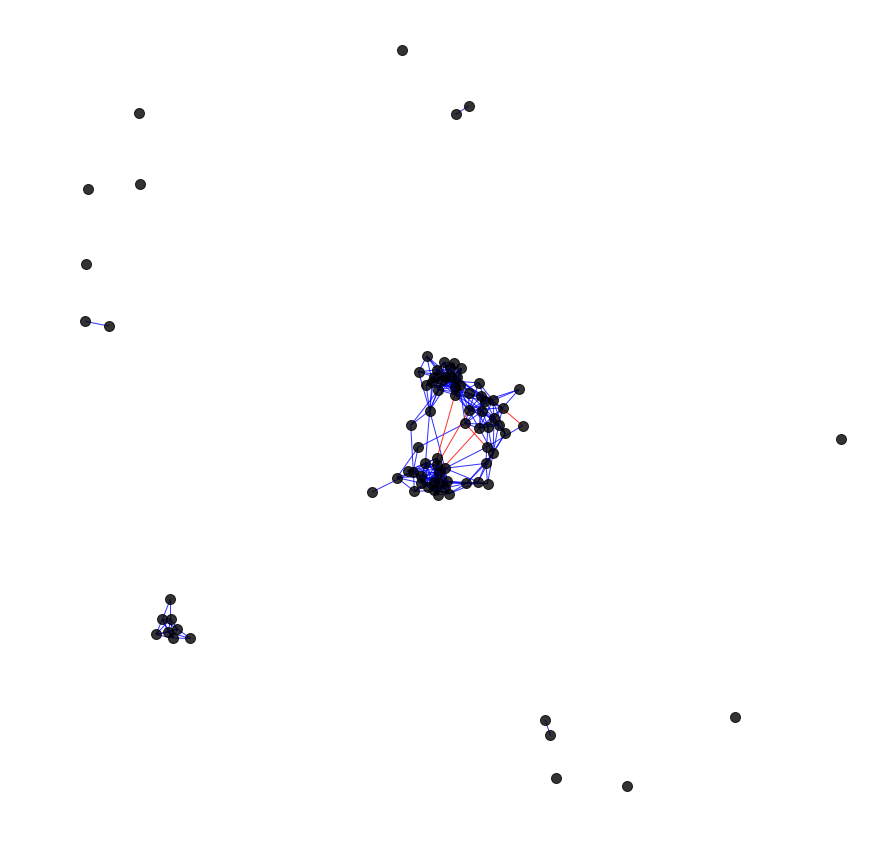

In [58]:
#Drawing the basic graph
edges=indicators.edges()
colors = [indicators[u][v]['color'] for u,v in edges]
plt.rcParams['figure.figsize']=[15, 15]
nx.draw_networkx(indicators,
                 pos=nx.spring_layout(indicators,weight='weights'), 
                 node_color='black',
                 edge_color=colors,
                 node_size=100,
                 with_labels=False,
                 alpha=.8
                 )
plt.axis('off')
plt.show()

Well, the network has individual componenets, but with this cluster it's rather difficult to read. A different node layout would be easier to gather information from.

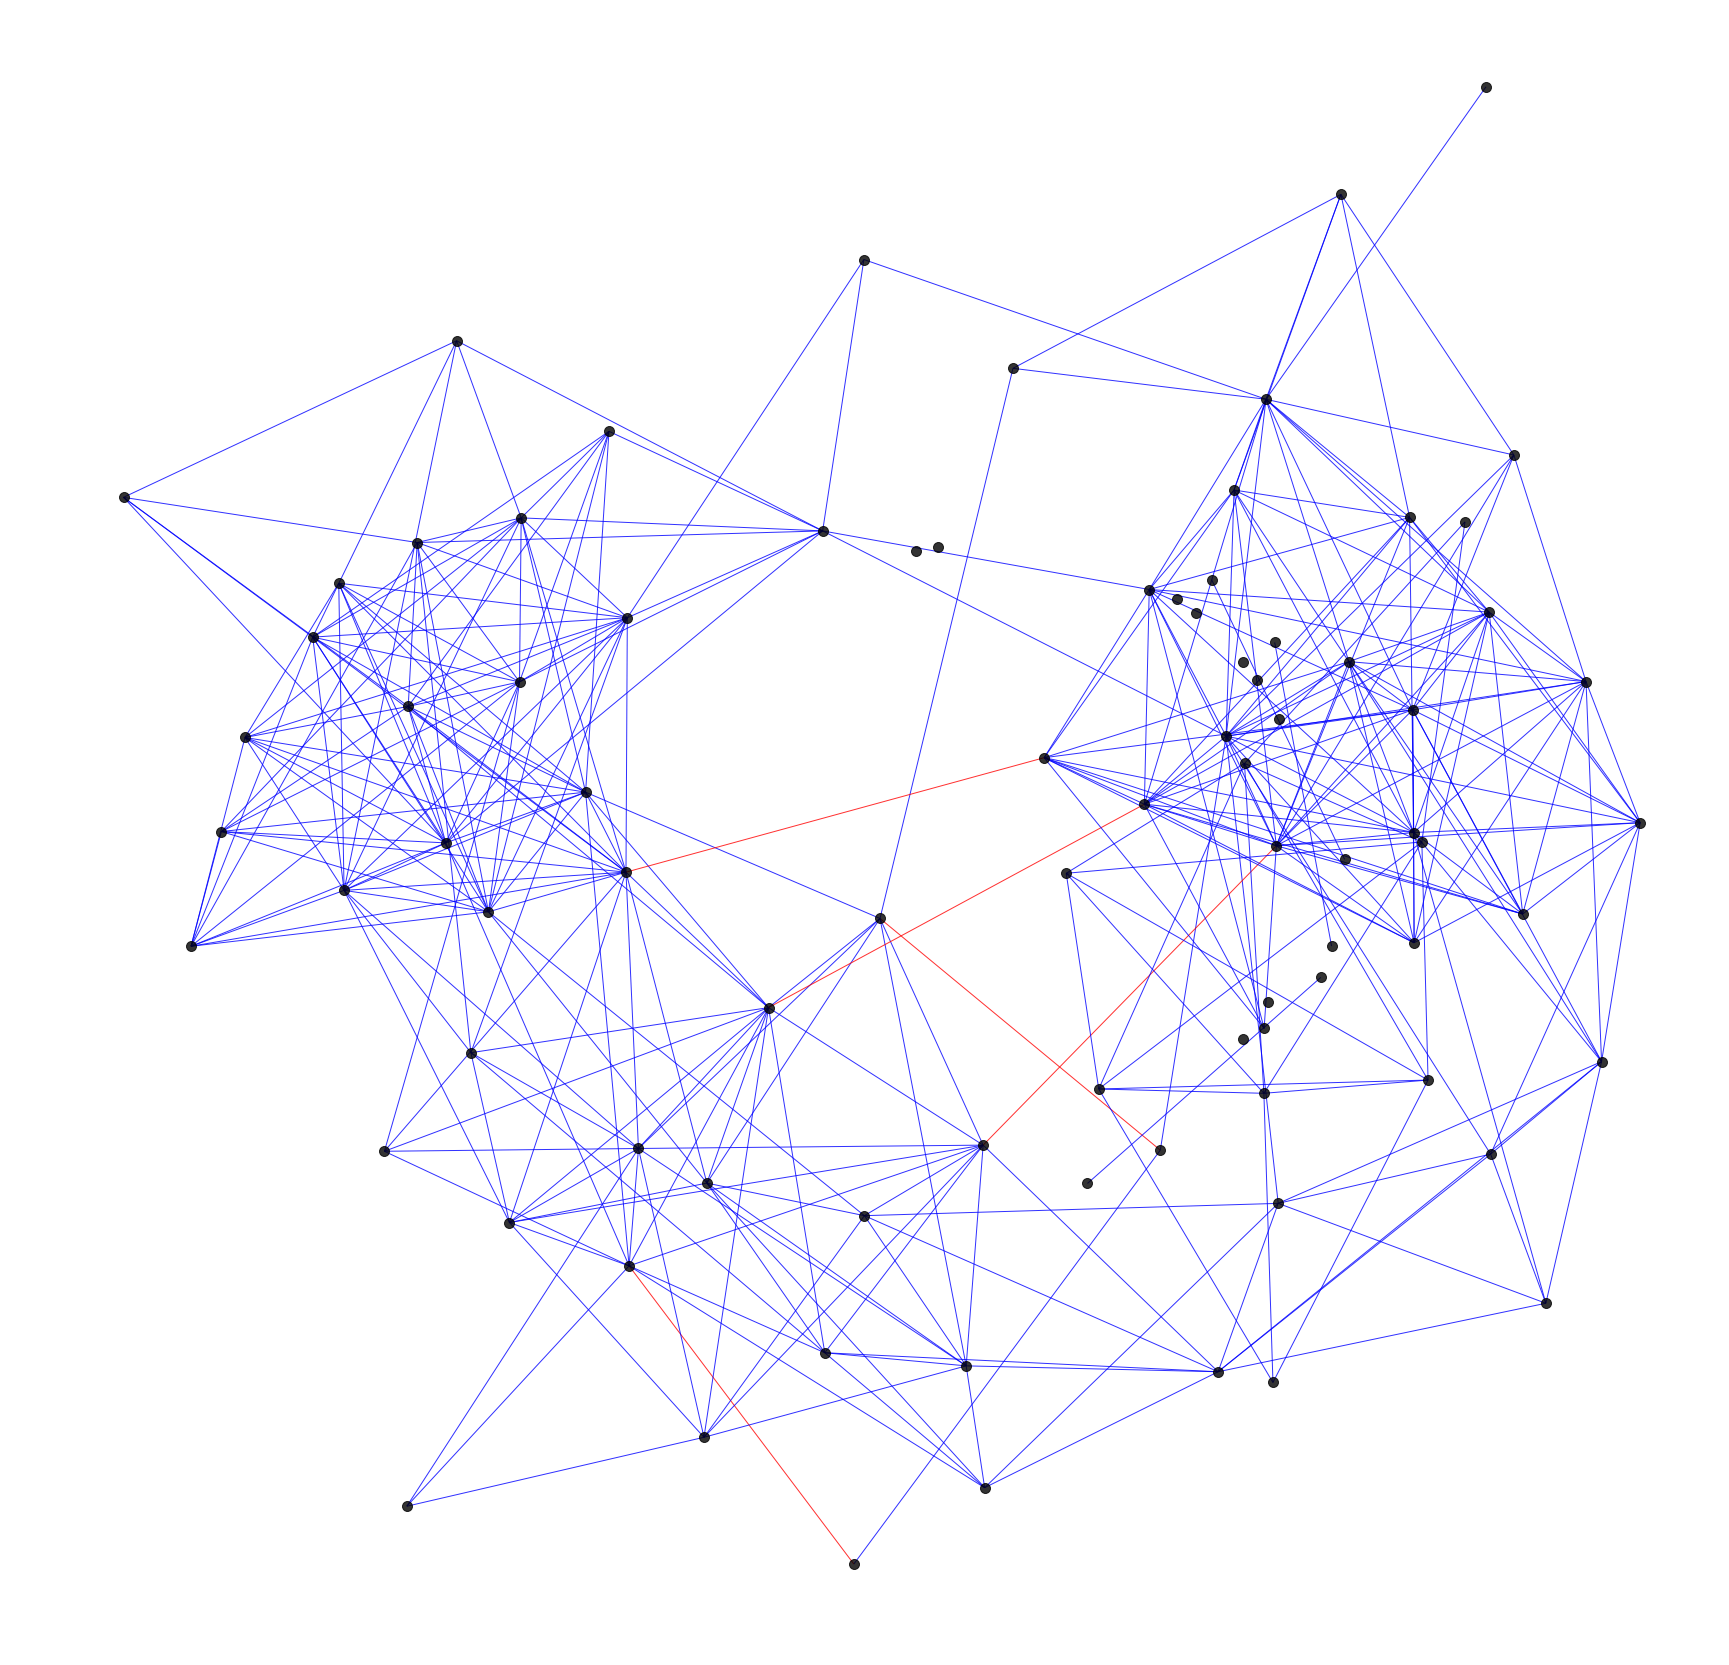

In [59]:
#Drawing the basic graph
edges=indicators.edges()
colors = [indicators[u][v]['color'] for u,v in edges]
plt.rcParams['figure.figsize']=[30, 30]
nx.draw_networkx(indicators,
                 pos=nx.kamada_kawai_layout(indicators,weight='weights'), 
                 node_color='black',
                 edge_color=colors,
                 node_size=100,
                 with_labels=False,
                 alpha=.8
                 )
plt.axis('off')
plt.show()

This layout is quite a bit more informative. Interestingly, we see one dense cluster, one looser cluster, and two indicators between them that seem to bridge ad negative relationship. Identifying those two central nodes might be informative.  But it's important to note that this the same network as seen before. Within that mass, there are isolated separate components, and isolated node. Although this projection is good at examining the network structure of the largest component, the other components within the network will have to be analyzed within a dataframe. 

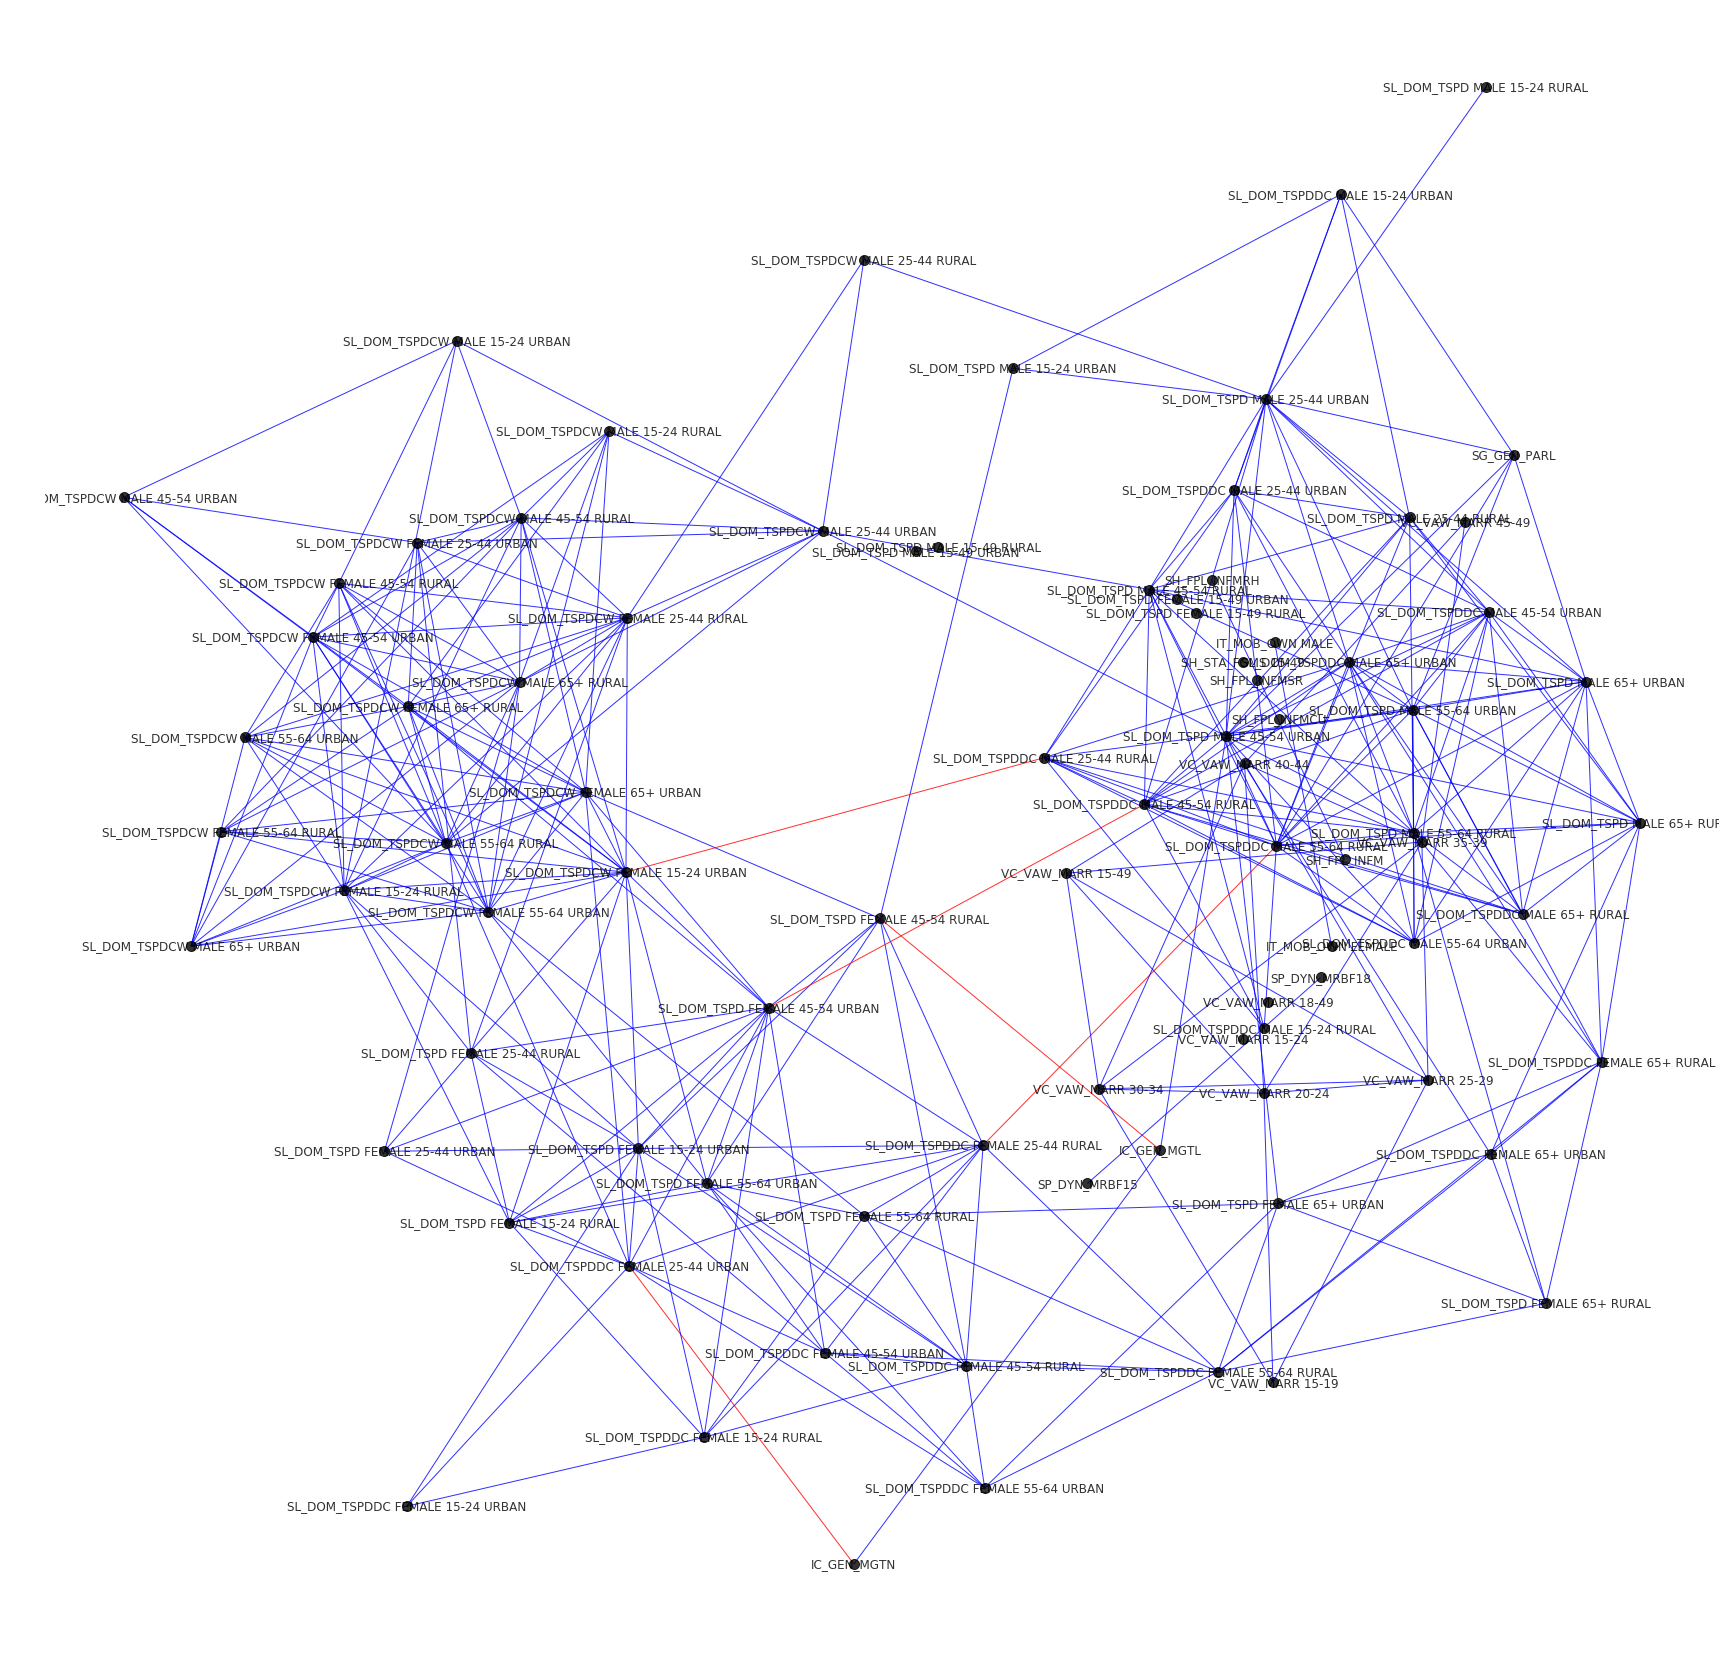

In [60]:
#Drawing the basic graph
edges=indicators.edges()
colors = [indicators[u][v]['color'] for u,v in edges]
plt.rcParams['figure.figsize']=[30, 30]
nx.draw_networkx(indicators,
                 pos=nx.kamada_kawai_layout(indicators,weight='weights'), 
                 node_color='black',
                 edge_color=colors,
                 node_size=100,
                 with_labels=True,
                 alpha=.8
                 )
plt.axis('off')
plt.show()

Here we're going to examine a set of statistics that involve each node in the graph. The degree of a node in a network is equal to the number of other nodes it's connected to. Clustering represents how close any connected neighbors are, recalling that the closeness of the data was set by weight of the coefficient. Betweeness centrality or Betweeness_cent, as represented here, is a measure of how central a node is to the network, based on how quickly one can get from one node to any other particular node. In a sense, the most between nodes in the network are the nodes that are best connected, to the whole network, even if those connections are mediated by other nodes. 

This graph has 86 nodes and 326 edges.
The median degree is 7.5 and the mean degree is 7.5813953488372094.
A indicator node with median degree is connected to 8.720930232558139% of other indicators.
There are 14 connected components within the graph.


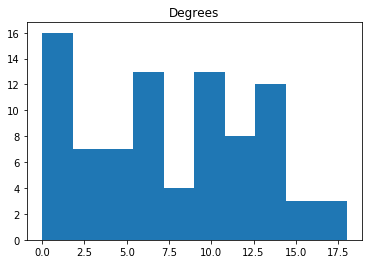

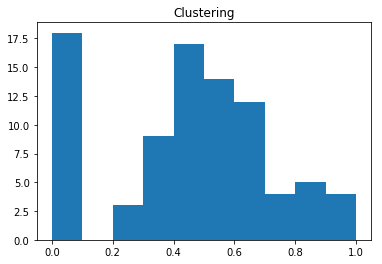

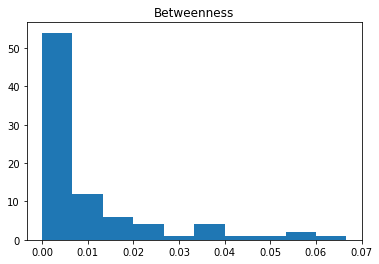

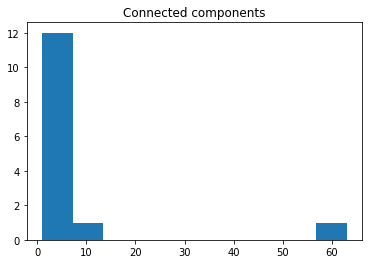

In [61]:
numberofnodes=indicators.number_of_nodes()
nodedegrees=list(dict(indicators.degree).values())
av_degree=np.mean(nodedegrees)
med_degree=np.median(nodedegrees)
clustering=list(nx.clustering(indicators).values())
betweenness_cent=list(nx.betweenness_centrality(indicators).values())
componentsizes=[len(c) for c in sorted(
    nx.connected_components(indicators), key=len, reverse=True)]

print("This graph has {} nodes and {} edges.".format(
    indicators.number_of_nodes(),indicators.number_of_edges()))

print("The median degree is {} and the mean degree is {}.".format(med_degree,av_degree))

print("A indicator node with median degree is connected to {}% of other indicators.".format(
    (med_degree/numberofnodes)*100))

print("There are {} connected components within the graph.".format(
    nx.number_connected_components(indicators)))

plt.rcParams['figure.figsize']=[6,4]

plt.hist(nodedegrees)
plt.title('Degrees')
plt.show()

plt.hist(clustering)
plt.title('Clustering')
plt.show()

plt.hist(betweenness_cent)
plt.title('Betweenness')
plt.show()

plt.hist(componentsizes)
plt.title('Connected components')
plt.show()

If you have very good eyes, and some degree of patience, you can do your best to interpret each indicator on this graph. But for more indepth understanding, of a node, a dataframe should be composed of this data, so that each node and it's connections can be broken down and evaluated individually.  

<a class="anchor" id="DFConstruct"></a>

# Conversion to Dataframe

   As mentioned before, the goal here is to illuminate relationships within the data. While the network graph can give us a general idea of the data's structure and connectivity, as can the meta stats, we need to have an index of all these nodes and their relationships, for this reason, we're going to convert these relationships and nodes into a dataframe, which shall serve as an index of all the connections made within the graph, as well as their statistics within the network. 
   
   The first bit of data to integrate into a dataframe is the data of each of the nodes. The following codes takes the values in terms of the nodes, their various stats and the component they belong to, and assign it to a row in a dataframe. This is just the start of the dataframe we eventually use, however. 

In [63]:
graph_stats=pd.DataFrame({'node':list(dict(indicators.degree()).keys()),
                          'degree':list(dict(indicators.degree()).values()),
                          'clustering':list(nx.clustering(indicators).values()),
                          'betweenness_cent':list(
                              nx.betweenness_centrality(indicators).values())
                         })

# Assigning each node to a component by number.
graph_stats['component']=None

# Sorting the components by size so that the largest component will be numbered 0.
components=sorted(nx.connected_components(indicators), key=len, reverse=True)
for i,component in enumerate(components):
    graph_stats.loc[graph_stats['node'].isin(list(component)),'component']=i
graph_stats

node  degree  clustering  betweenness_cent  \
0                        IC_GEN_MGTL       3    0.000000          0.008588   
1                        IC_GEN_MGTN       2    0.000000          0.000923   
2                  IT_MOB_OWN FEMALE       1    0.000000          0.000000   
3                    IT_MOB_OWN MALE       1    0.000000          0.000000   
4                        SG_GEN_PARL       6    0.666667          0.001639   
5                        SH_FPL_INFM       1    0.000000          0.000000   
6                      SH_FPL_INFMCU       0    0.000000          0.000000   
7                      SH_FPL_INFMRH       1    0.000000          0.000000   
8                      SH_FPL_INFMSR       0    0.000000          0.000000   
9                  SH_STA_FGMS 15-49       0    0.000000          0.000000   
10    SL_DOM_TSPD FEMALE 15-24 RURAL       9    0.500000          0.004585   
11    SL_DOM_TSPD FEMALE 15-24 URBAN      12    0.393939          0.017924   
12    SL_DOM_TSPD FEMALE 15-49 RURAL       0    0.000000          0.000000   
13    SL_DOM_TSPD FEMALE 15-49 URBAN       0    0.000000          0.000000   
14    SL_DOM_TSPD FEMALE 25-44 RURAL       7    0.380952          0.006832   
15    SL_DOM_TSPD FEMALE 25-44 URBAN       5    0.500000          0.002006   
16    SL_DOM_TSPD FEMALE 45-54 RURAL       8    0.285714          0.023334   
17    SL_DOM_TSPD FEMALE 45-54 URBAN      14    0.329670          0.047070   
18    SL_DOM_TSPD FEMALE 55-64 RURAL       7    0.380952          0.015909   
19    SL_DOM_TSPD FEMALE 55-64 URBAN       9    0.333333          0.009551   
20      SL_DOM_TSPD FEMALE 65+ RURAL       5    0.700000          0.001084   
21      SL_DOM_TSPD FEMALE 65+ URBAN       7    0.428571          0.013880   
22      SL_DOM_TSPD MALE 15-24 RURAL       1    0.000000          0.000000   
23      SL_DOM_TSPD MALE 15-24 URBAN       3    0.333333          0.007126   
24      SL_DOM_TSPD MALE 15-49 RURAL       0    0.000000          0.000000   
25      SL_DOM_TSPD MALE 15-49 URBAN       0    0.000000          0.000000   
26      SL_DOM_TSPD MALE 25-44 RURAL      10    0.688889          0.003783   
27      SL_DOM_TSPD MALE 25-44 URBAN      14    0.384615          0.035872   
28      SL_DOM_TSPD MALE 45-54 RURAL      13    0.589744          0.020332   
29      SL_DOM_TSPD MALE 45-54 URBAN      18    0.437908          0.066686   
..                               ...     ...         ...               ...   
56  SL_DOM_TSPDDC FEMALE 25-44 RURAL      11    0.400000          0.035586   
57  SL_DOM_TSPDDC FEMALE 25-44 URBAN      11    0.254545          0.026912   
58  SL_DOM_TSPDDC FEMALE 45-54 RURAL       9    0.472222          0.005325   
59  SL_DOM_TSPDDC FEMALE 45-54 URBAN       8    0.464286          0.006874   
60  SL_DOM_TSPDDC FEMALE 55-64 RURAL       9    0.416667          0.017741   
61  SL_DOM_TSPDDC FEMALE 55-64 URBAN       6    0.466667          0.004759   
62    SL_DOM_TSPDDC FEMALE 65+ RURAL       9    0.500000          0.007535   
63    SL_DOM_TSPDDC FEMALE 65+ URBAN       6    0.600000          0.003070   
64    SL_DOM_TSPDDC MALE 15-24 RURAL       4    1.000000          0.000000   
65    SL_DOM_TSPDDC MALE 15-24 URBAN       5    0.500000          0.001020   
66    SL_DOM_TSPDDC MALE 25-44 RURAL      11    0.563636          0.041493   
67    SL_DOM_TSPDDC MALE 25-44 URBAN      10    0.666667          0.005115   
68    SL_DOM_TSPDDC MALE 45-54 RURAL      14    0.571429          0.035383   
69    SL_DOM_TSPDDC MALE 45-54 URBAN      14    0.736264          0.002203   
70    SL_DOM_TSPDDC MALE 55-64 RURAL      17    0.536765          0.033469   
71    SL_DOM_TSPDDC MALE 55-64 URBAN      10    0.866667          0.001153   
72      SL_DOM_TSPDDC MALE 65+ RURAL       9    0.861111          0.000992   
73      SL_DOM_TSPDDC MALE 65+ URBAN      14    0.681319          0.005539   
74                     SP_DYN_MRBF15       1    0.000000          0.000000   
75                     SP_DYN_MRBF18       1    0.0000

While this metadata is helpful, knowing precisely what connections a dataframe has will be useful. NetworkX comes with a function to convert edges into a pandas dataframe, ready to be joined to our own dataframe. 

In [64]:
networkx_df = nx.to_pandas_edgelist(indicators)
networkx_df

source                            target color  \
0                       IC_GEN_MGTL                       IC_GEN_MGTN     b   
1                       IC_GEN_MGTL    SL_DOM_TSPD FEMALE 45-54 RURAL     r   
2                       IC_GEN_MGTL      SL_DOM_TSPD MALE 45-54 URBAN     b   
3                       IC_GEN_MGTN  SL_DOM_TSPDDC FEMALE 25-44 URBAN     r   
4                 IT_MOB_OWN FEMALE                   IT_MOB_OWN MALE     b   
5                       SG_GEN_PARL      SL_DOM_TSPD MALE 25-44 URBAN     b   
6                       SG_GEN_PARL      SL_DOM_TSPD MALE 55-64 URBAN     b   
7                       SG_GEN_PARL        SL_DOM_TSPD MALE 65+ URBAN     b   
8                       SG_GEN_PARL      SL_DOM_TSPD MALE 45-54 URBAN     b   
9                       SG_GEN_PARL    SL_DOM_TSPDDC MALE 15-24 URBAN     b   
10                      SG_GEN_PARL    SL_DOM_TSPDDC MALE 55-64 RURAL     b   
11                      SH_FPL_INFM                     SH_FPL_INFMRH     b   
12   SL_DOM_TSPD FEMALE 15-24 RURAL    SL_DOM_TSPD FEMALE 15-24 URBAN     b   
13   SL_DOM_TSPD FEMALE 15-24 RURAL    SL_DOM_TSPD FEMALE 25-44 RURAL     b   
14   SL_DOM_TSPD FEMALE 15-24 RURAL    SL_DOM_TSPD FEMALE 45-54 URBAN     b   
15   SL_DOM_TSPD FEMALE 15-24 RURAL  SL_DOM_TSPDCW FEMALE 15-24 URBAN     b   
16   SL_DOM_TSPD FEMALE 15-24 RURAL  SL_DOM_TSPDDC FEMALE 15-24 RURAL     b   
17   SL_DOM_TSPD FEMALE 15-24 RURAL  SL_DOM_TSPDDC FEMALE 25-44 RURAL     b   
18   SL_DOM_TSPD FEMALE 15-24 RURAL  SL_DOM_TSPDDC FEMALE 25-44 URBAN     b   
19   SL_DOM_TSPD FEMALE 15-24 RURAL    SL_DOM_TSPD FEMALE 55-64 URBAN     b   
20   SL_DOM_TSPD FEMALE 15-24 RURAL  SL_DOM_TSPDCW FEMALE 15-24 RURAL     b   
21   SL_DOM_TSPD FEMALE 15-24 URBAN    SL_DOM_TSPD FEMALE 25-44 URBAN     b   
22   SL_DOM_TSPD FEMALE 15-24 URBAN  SL_DOM_TSPDCW FEMALE 15-24 RURAL     b   
23   SL_DOM_TSPD FEMALE 15-24 URBAN  SL_DOM_TSPDCW FEMALE 15-24 URBAN     b   
24   SL_DOM_TSPD FEMALE 15-24 URBAN  SL_DOM_TSPDDC FEMALE 15-24 RURAL     b   
25   SL_DOM_TSPD FEMALE 15-24 URBAN  SL_DOM_TSPDDC FEMALE 15-24 URBAN     b   
26   SL_DOM_TSPD FEMALE 15-24 URBAN  SL_DOM_TSPDDC FEMALE 45-54 RURAL     b   
27   SL_DOM_TSPD FEMALE 15-24 URBAN    SL_DOM_TSPD FEMALE 25-44 RURAL     b   
28   SL_DOM_TSPD FEMALE 15-24 URBAN    SL_DOM_TSPD FEMALE 45-54 RURAL     b   
29   SL_DOM_TSPD FEMALE 15-24 URBAN    SL_DOM_TSPD FEMALE 45-54 URBAN     b   
..                              ...                               ...   ...   
296  SL_DOM_TSPDDC MALE 45-54 URBAN    SL_DOM_TSPDDC MALE 55-64 RURAL     b   
297  SL_DOM_TSPDDC MALE 45-54 URBAN      SL_DOM_TSPDDC MALE 65+ URBAN     b   
298  SL_DOM_TSPDDC MALE 45-54 URBAN    SL_DOM_TSPDDC MALE 55-64 URBAN     b   
299  SL_DOM_TSPDDC MALE 45-54 URBAN      SL_DOM_TSPDDC MALE 65+ RURAL     b   
300  SL_DOM_TSPDDC MALE 55-64 RURAL    SL_DOM_TSPDDC MALE 55-64 URBAN     b   
301  SL_DOM_TSPDDC MALE 55-64 RURAL      SL_DOM_TSPDDC MALE 65+ RURAL     b   
302  SL_DOM_TSPDDC MALE 55-64 RURAL      SL_DOM_TSPDDC MALE 65+ URBAN     b   
303  SL_DOM_TSPDDC MALE 55-64 URBAN      SL_DOM_TSPDDC MALE 65+ URBAN     b   
304    SL_DOM_TSPDDC MALE 65+ RURAL      SL_DOM_TSPDDC MALE 65+ URBAN     b   
305                   SP_DYN_MRBF15                     SP_DYN_MRBF18     b   
306               VC_VAW_MARR 15-19                 VC_VAW_MARR 20-24     b   
307               VC_VAW_MARR 15-19                 VC_VAW_MARR 30-34     b   
308               VC_VAW_MARR 15-19                 VC_VAW_MARR 25-29     b   
309               VC_VAW_MARR 15-49                 VC_VAW_MARR 20-24     b   
310               VC_VAW_MARR 15-49                 VC_VAW_MARR 25-29     b   
311               VC_VAW_MARR 15-49                 VC_VAW_MARR 30-34     b   
312               VC_VAW_MARR 15-49                 VC_VAW_MARR 35-39     b   
313               VC_VAW_MARR 15-49                 VC_VAW_MARR 40-44     b   
314               VC_VAW_MARR 20-24                 VC_VAW_MARR 25-29     b   


We'll rename the column to something that can be joined on by the other data frame, and avoids confusion with the "target" variable that is going to be integrated next. 

In [66]:
networkx_df.rename(columns={'source':'node', 'target':'connection'}, inplace=True)
networkx_df

node                        connection color  \
0                       IC_GEN_MGTL                       IC_GEN_MGTN     b   
1                       IC_GEN_MGTL    SL_DOM_TSPD FEMALE 45-54 RURAL     r   
2                       IC_GEN_MGTL      SL_DOM_TSPD MALE 45-54 URBAN     b   
3                       IC_GEN_MGTN  SL_DOM_TSPDDC FEMALE 25-44 URBAN     r   
4                 IT_MOB_OWN FEMALE                   IT_MOB_OWN MALE     b   
5                       SG_GEN_PARL      SL_DOM_TSPD MALE 25-44 URBAN     b   
6                       SG_GEN_PARL      SL_DOM_TSPD MALE 55-64 URBAN     b   
7                       SG_GEN_PARL        SL_DOM_TSPD MALE 65+ URBAN     b   
8                       SG_GEN_PARL      SL_DOM_TSPD MALE 45-54 URBAN     b   
9                       SG_GEN_PARL    SL_DOM_TSPDDC MALE 15-24 URBAN     b   
10                      SG_GEN_PARL    SL_DOM_TSPDDC MALE 55-64 RURAL     b   
11                      SH_FPL_INFM                     SH_FPL_INFMRH     b   
12   SL_DOM_TSPD FEMALE 15-24 RURAL    SL_DOM_TSPD FEMALE 15-24 URBAN     b   
13   SL_DOM_TSPD FEMALE 15-24 RURAL    SL_DOM_TSPD FEMALE 25-44 RURAL     b   
14   SL_DOM_TSPD FEMALE 15-24 RURAL    SL_DOM_TSPD FEMALE 45-54 URBAN     b   
15   SL_DOM_TSPD FEMALE 15-24 RURAL  SL_DOM_TSPDCW FEMALE 15-24 URBAN     b   
16   SL_DOM_TSPD FEMALE 15-24 RURAL  SL_DOM_TSPDDC FEMALE 15-24 RURAL     b   
17   SL_DOM_TSPD FEMALE 15-24 RURAL  SL_DOM_TSPDDC FEMALE 25-44 RURAL     b   
18   SL_DOM_TSPD FEMALE 15-24 RURAL  SL_DOM_TSPDDC FEMALE 25-44 URBAN     b   
19   SL_DOM_TSPD FEMALE 15-24 RURAL    SL_DOM_TSPD FEMALE 55-64 URBAN     b   
20   SL_DOM_TSPD FEMALE 15-24 RURAL  SL_DOM_TSPDCW FEMALE 15-24 RURAL     b   
21   SL_DOM_TSPD FEMALE 15-24 URBAN    SL_DOM_TSPD FEMALE 25-44 URBAN     b   
22   SL_DOM_TSPD FEMALE 15-24 URBAN  SL_DOM_TSPDCW FEMALE 15-24 RURAL     b   
23   SL_DOM_TSPD FEMALE 15-24 URBAN  SL_DOM_TSPDCW FEMALE 15-24 URBAN     b   
24   SL_DOM_TSPD FEMALE 15-24 URBAN  SL_DOM_TSPDDC FEMALE 15-24 RURAL     b   
25   SL_DOM_TSPD FEMALE 15-24 URBAN  SL_DOM_TSPDDC FEMALE 15-24 URBAN     b   
26   SL_DOM_TSPD FEMALE 15-24 URBAN  SL_DOM_TSPDDC FEMALE 45-54 RURAL     b   
27   SL_DOM_TSPD FEMALE 15-24 URBAN    SL_DOM_TSPD FEMALE 25-44 RURAL     b   
28   SL_DOM_TSPD FEMALE 15-24 URBAN    SL_DOM_TSPD FEMALE 45-54 RURAL     b   
29   SL_DOM_TSPD FEMALE 15-24 URBAN    SL_DOM_TSPD FEMALE 45-54 URBAN     b   
..                              ...                               ...   ...   
296  SL_DOM_TSPDDC MALE 45-54 URBAN    SL_DOM_TSPDDC MALE 55-64 RURAL     b   
297  SL_DOM_TSPDDC MALE 45-54 URBAN      SL_DOM_TSPDDC MALE 65+ URBAN     b   
298  SL_DOM_TSPDDC MALE 45-54 URBAN    SL_DOM_TSPDDC MALE 55-64 URBAN     b   
299  SL_DOM_TSPDDC MALE 45-54 URBAN      SL_DOM_TSPDDC MALE 65+ RURAL     b   
300  SL_DOM_TSPDDC MALE 55-64 RURAL    SL_DOM_TSPDDC MALE 55-64 URBAN     b   
301  SL_DOM_TSPDDC MALE 55-64 RURAL      SL_DOM_TSPDDC MALE 65+ RURAL     b   
302  SL_DOM_TSPDDC MALE 55-64 RURAL      SL_DOM_TSPDDC MALE 65+ URBAN     b   
303  SL_DOM_TSPDDC MALE 55-64 URBAN      SL_DOM_TSPDDC MALE 65+ URBAN     b   
304    SL_DOM_TSPDDC MALE 65+ RURAL      SL_DOM_TSPDDC MALE 65+ URBAN     b   
305                   SP_DYN_MRBF15                     SP_DYN_MRBF18     b   
306               VC_VAW_MARR 15-19                 VC_VAW_MARR 20-24     b   
307               VC_VAW_MARR 15-19                 VC_VAW_MARR 30-34     b   
308               VC_VAW_MARR 15-19                 VC_VAW_MARR 25-29     b   
309               VC_VAW_MARR 15-49                 VC_VAW_MARR 20-24     b   
310               VC_VAW_MARR 15-49                 VC_VAW_MARR 25-29     b   
311               VC_VAW_MARR 15-49                 VC_VAW_MARR 30-34     b   
312               VC_VAW_MARR 15-49                 VC_VAW_MARR 35-39     b   
313               VC_VAW_MARR 15-49                 VC_VAW_MARR 40-44     b   
314               VC_VAW_MARR 20-24                 VC_VAW_MARR 25-29     b   
31

In [67]:
combined_df= pd.merge(networkx_df, graph_stats, on='node')

Now we cue up that guide we made earlier, that shows to which target each series code goes to, as well as a description of what it is. 

In [68]:
SeriesCodeGuide

SeriesCode Target  \
0                    VC_VAW_MARR 25-29    5.2   
1                    VC_VAW_MARR 30-34    5.2   
2                    VC_VAW_MARR 20-24    5.2   
3                    VC_VAW_MARR 45-49    5.2   
4                    VC_VAW_MARR 15-19    5.2   
5                    VC_VAW_MARR 40-44    5.2   
6                    VC_VAW_MARR 35-39    5.2   
7                    VC_VAW_MARR 15-49    5.2   
24                   VC_VAW_MARR 18-49    5.2   
367                  VC_VAW_MARR 15-24    5.2   
542                  SH_STA_FGMS 15-49    5.3   
571                      SP_DYN_MRBF15    5.3   
696                      SP_DYN_MRBF18    5.3   
821       SL_DOM_TSPD FEMALE 65+ RURAL    5.4   
822         SL_DOM_TSPD MALE 65+ RURAL    5.4   
823       SL_DOM_TSPD FEMALE 65+ URBAN    5.4   
824         SL_DOM_TSPD MALE 65+ URBAN    5.4   
825     SL_DOM_TSPD FEMALE 15-24 RURAL    5.4   
827       SL_DOM_TSPD MALE 15-24 URBAN    5.4   
828     SL_DOM_TSPD FEMALE 15-24 URBAN    5.4   
829       SL_DOM_TSPD MALE 15-24 RURAL    5.4   
830     SL_DOM_TSPD FEMALE 25-44 RURAL    5.4   
831       SL_DOM_TSPD MALE 25-44 RURAL    5.4   
832     SL_DOM_TSPD FEMALE 45-54 RURAL    5.4   
833     SL_DOM_TSPD FEMALE 25-44 URBAN    5.4   
834       SL_DOM_TSPD MALE 25-44 URBAN    5.4   
835     SL_DOM_TSPD FEMALE 45-54 URBAN    5.4   
836       SL_DOM_TSPD MALE 45-54 URBAN    5.4   
837     SL_DOM_TSPD FEMALE 55-64 URBAN    5.4   
838       SL_DOM_TSPD MALE 55-64 URBAN    5.4   
...                                ...    ...   
1421  SL_DOM_TSPDCW FEMALE 55-64 URBAN    5.4   
1957    SL_DOM_TSPDDC FEMALE 65+ RURAL    5.4   
1958      SL_DOM_TSPDDC MALE 65+ RURAL    5.4   
1959      SL_DOM_TSPDDC MALE 65+ URBAN    5.4   
1960    SL_DOM_TSPDDC FEMALE 65+ URBAN    5.4   
1961  SL_DOM_TSPDDC FEMALE 15-24 RURAL    5.4   
1962  SL_DOM_TSPDDC FEMALE 15-24 URBAN    5.4   
1963    SL_DOM_TSPDDC MALE 55-64 RURAL    5.4   
1964  SL_DOM_TSPDDC FEMALE 25-44 RURAL    5.4   
1965  SL_DOM_TSPDDC FEMALE 25-44 URBAN    5.4   
1966    SL_DOM_TSPDDC MALE 45-54 RURAL    5.4   
1967    SL_DOM_TSPDDC MALE 45-54 URBAN    5.4   
1968  SL_DOM_TSPDDC FEMALE 55-64 URBAN    5.4   
1969  SL_DOM_TSPDDC FEMALE 55-64 RURAL    5.4   
1973    SL_DOM_TSPDDC MALE 55-64 URBAN    5.4   
1975    SL_DOM_TSPDDC MALE 15-24 RURAL    5.4   
1976    SL_DOM_TSPDDC MALE 15-24 URBAN    5.4   
1977  SL_DOM_TSPDDC FEMALE 45-54 RURAL    5.4   
1978  SL_DOM_TSPDDC FEMALE 45-54 URBAN    5.4   
1979    SL_DOM_TSPDDC MALE 25-44 RURAL    5.4   
1980    SL_DOM_TSPDDC MALE 25-44 URBAN    5.4   
2533                       IC_GEN_MGTL    5.5   
4043                       IC_GEN_MGTN    5.5   
4881                       SG_GEN_PARL    5.5   
9192                       SH_FPL_INFM    5.6   
9297                     SH_FPL_INFMCU    5.6   
9375                     SH_FPL_INFMRH    5.6   
9453                     SH_FPL_INFMSR    5.6   
9531                 IT_MOB_OWN FEMALE    5.b   
9532                   IT_MOB_OWN MALE    5.b   

                                      SeriesDescription  
0     Proportion of ever-partnered women and girls s...  
1     Proportion of ever-partnered women and girls s...  
2     Proportion of ever-partnered women and girls s...  
3     Proportion of ever-partnered women and girls s...  
4     Proportion of ever-partnered women and girls s...  
5     Proportion of ever-partnered women and girls s...  
6     Proportion of ever-partnered women and girls s...  
7     Proportion of ever-partnered women and girls s...  
24    Proportion of ever-partnered women and girls s...  
367   Proportion of ever-partnered women and girls s...  
542   Proportion of girls and women aged 15-49 years...  
571   Proportion of women aged 20-24 years who were ...  
696   Proportion of women aged 20-24 years who were ...  
821   Proportion of time spent on unpaid domestic ch...  
822   Proportion of time spent on unpaid domestic ch...  
823   Proportion of time spent on unpaid domestic ch...  
824

Series code is the most descriptive column name out of the three, we'll switch to that. 

In [69]:
combined_df.rename(columns={'node':"SeriesCode"}, inplace=True)

combined_df.head()

SeriesCode                        connection color  accuracy  \
0        IC_GEN_MGTL                       IC_GEN_MGTN     b  0.679171   
1        IC_GEN_MGTL    SL_DOM_TSPD FEMALE 45-54 RURAL     r  0.637347   
2        IC_GEN_MGTL      SL_DOM_TSPD MALE 45-54 URBAN     b  0.638967   
3        IC_GEN_MGTN  SL_DOM_TSPDDC FEMALE 25-44 URBAN     r  0.726314   
4  IT_MOB_OWN FEMALE                   IT_MOB_OWN MALE     b  0.920972   

                  weight  degree  clustering  betweenness_cent  component  
0   [0.8216822952027262]       3         0.0          0.008588          0  
1  [0.08141862352411602]       3         0.0          0.008588          0  
2  [0.22302614342151095]       3         0.0          0.008588          0  
3   [1.0058112977021496]       2         0.0          0.000923          0  
4   [0.7958241086454889]       1         0.0          0.000000          2

In [70]:
full_df = pd.merge(combined_df, SeriesCodeGuide, on='SeriesCode')
full_df

SeriesCode                        connection color  \
0                       IC_GEN_MGTL                       IC_GEN_MGTN     b   
1                       IC_GEN_MGTL    SL_DOM_TSPD FEMALE 45-54 RURAL     r   
2                       IC_GEN_MGTL      SL_DOM_TSPD MALE 45-54 URBAN     b   
3                       IC_GEN_MGTN  SL_DOM_TSPDDC FEMALE 25-44 URBAN     r   
4                 IT_MOB_OWN FEMALE                   IT_MOB_OWN MALE     b   
5                       SG_GEN_PARL      SL_DOM_TSPD MALE 25-44 URBAN     b   
6                       SG_GEN_PARL      SL_DOM_TSPD MALE 55-64 URBAN     b   
7                       SG_GEN_PARL        SL_DOM_TSPD MALE 65+ URBAN     b   
8                       SG_GEN_PARL      SL_DOM_TSPD MALE 45-54 URBAN     b   
9                       SG_GEN_PARL    SL_DOM_TSPDDC MALE 15-24 URBAN     b   
10                      SG_GEN_PARL    SL_DOM_TSPDDC MALE 55-64 RURAL     b   
11                      SH_FPL_INFM                     SH_FPL_INFMRH     b   
12   SL_DOM_TSPD FEMALE 15-24 RURAL    SL_DOM_TSPD FEMALE 15-24 URBAN     b   
13   SL_DOM_TSPD FEMALE 15-24 RURAL    SL_DOM_TSPD FEMALE 25-44 RURAL     b   
14   SL_DOM_TSPD FEMALE 15-24 RURAL    SL_DOM_TSPD FEMALE 45-54 URBAN     b   
15   SL_DOM_TSPD FEMALE 15-24 RURAL  SL_DOM_TSPDCW FEMALE 15-24 URBAN     b   
16   SL_DOM_TSPD FEMALE 15-24 RURAL  SL_DOM_TSPDDC FEMALE 15-24 RURAL     b   
17   SL_DOM_TSPD FEMALE 15-24 RURAL  SL_DOM_TSPDDC FEMALE 25-44 RURAL     b   
18   SL_DOM_TSPD FEMALE 15-24 RURAL  SL_DOM_TSPDDC FEMALE 25-44 URBAN     b   
19   SL_DOM_TSPD FEMALE 15-24 RURAL    SL_DOM_TSPD FEMALE 55-64 URBAN     b   
20   SL_DOM_TSPD FEMALE 15-24 RURAL  SL_DOM_TSPDCW FEMALE 15-24 RURAL     b   
21   SL_DOM_TSPD FEMALE 15-24 URBAN    SL_DOM_TSPD FEMALE 25-44 URBAN     b   
22   SL_DOM_TSPD FEMALE 15-24 URBAN  SL_DOM_TSPDCW FEMALE 15-24 RURAL     b   
23   SL_DOM_TSPD FEMALE 15-24 URBAN  SL_DOM_TSPDCW FEMALE 15-24 URBAN     b   
24   SL_DOM_TSPD FEMALE 15-24 URBAN  SL_DOM_TSPDDC FEMALE 15-24 RURAL     b   
25   SL_DOM_TSPD FEMALE 15-24 URBAN  SL_DOM_TSPDDC FEMALE 15-24 URBAN     b   
26   SL_DOM_TSPD FEMALE 15-24 URBAN  SL_DOM_TSPDDC FEMALE 45-54 RURAL     b   
27   SL_DOM_TSPD FEMALE 15-24 URBAN    SL_DOM_TSPD FEMALE 25-44 RURAL     b   
28   SL_DOM_TSPD FEMALE 15-24 URBAN    SL_DOM_TSPD FEMALE 45-54 RURAL     b   
29   SL_DOM_TSPD FEMALE 15-24 URBAN    SL_DOM_TSPD FEMALE 45-54 URBAN     b   
..                              ...                               ...   ...   
296  SL_DOM_TSPDDC MALE 45-54 URBAN    SL_DOM_TSPDDC MALE 55-64 RURAL     b   
297  SL_DOM_TSPDDC MALE 45-54 URBAN      SL_DOM_TSPDDC MALE 65+ URBAN     b   
298  SL_DOM_TSPDDC MALE 45-54 URBAN    SL_DOM_TSPDDC MALE 55-64 URBAN     b   
299  SL_DOM_TSPDDC MALE 45-54 URBAN      SL_DOM_TSPDDC MALE 65+ RURAL     b   
300  SL_DOM_TSPDDC MALE 55-64 RURAL    SL_DOM_TSPDDC MALE 55-64 URBAN     b   
301  SL_DOM_TSPDDC MALE 55-64 RURAL      SL_DOM_TSPDDC MALE 65+ RURAL     b   
302  SL_DOM_TSPDDC MALE 55-64 RURAL      SL_DOM_TSPDDC MALE 65+ URBAN     b   
303  SL_DOM_TSPDDC MALE 55-64 URBAN      SL_DOM_TSPDDC MALE 65+ URBAN     b   
304    SL_DOM_TSPDDC MALE 65+ RURAL      SL_DOM_TSPDDC MALE 65+ URBAN     b   
305                   SP_DYN_MRBF15                     SP_DYN_MRBF18     b   
306               VC_VAW_MARR 15-19                 VC_VAW_MARR 20-24     b   
307               VC_VAW_MARR 15-19                 VC_VAW_MARR 30-34     b   
308               VC_VAW_MARR 15-19                 VC_VAW_MARR 25-29     b   
309               VC_VAW_MARR 15-49                 VC_VAW_MARR 20-24     b   
310               VC_VAW_MARR 15-49                 VC_VAW_MARR 25-29     b   
311               VC_VAW_MARR 15-49                 VC_VAW_MARR 30-34     b   
312               VC_VAW_MARR 15-49                 VC_VAW_MARR 35-39     b   
313               VC_VAW_MARR 15-49                 VC_VAW_MARR 40-44     b   
314               VC_VAW_MARR 20-24                 VC_VAW_MARR 25-29     b

In [71]:
#checking if the merge produced any NaN values
full_df.isnull().values.any()

False

Recall that the color coding of edges was dependent on the negativity of the coefficient produced by the Huber Regression. Essentially the color of the edge is just telling us whether the coefficient, also found in the absolute value of the huber regression, was negative or positive. It can easily be integrated into the other feature. 

In [73]:
full_df = full_df.dropna()

In [74]:
full_df['weight'] = full_df['weight'].apply(lambda x: x.item())

In [75]:
full_df

SeriesCode                        connection color  \
0                       IC_GEN_MGTL                       IC_GEN_MGTN     b   
1                       IC_GEN_MGTL    SL_DOM_TSPD FEMALE 45-54 RURAL     r   
2                       IC_GEN_MGTL      SL_DOM_TSPD MALE 45-54 URBAN     b   
3                       IC_GEN_MGTN  SL_DOM_TSPDDC FEMALE 25-44 URBAN     r   
4                 IT_MOB_OWN FEMALE                   IT_MOB_OWN MALE     b   
5                       SG_GEN_PARL      SL_DOM_TSPD MALE 25-44 URBAN     b   
6                       SG_GEN_PARL      SL_DOM_TSPD MALE 55-64 URBAN     b   
7                       SG_GEN_PARL        SL_DOM_TSPD MALE 65+ URBAN     b   
8                       SG_GEN_PARL      SL_DOM_TSPD MALE 45-54 URBAN     b   
9                       SG_GEN_PARL    SL_DOM_TSPDDC MALE 15-24 URBAN     b   
10                      SG_GEN_PARL    SL_DOM_TSPDDC MALE 55-64 RURAL     b   
11                      SH_FPL_INFM                     SH_FPL_INFMRH     b   
12   SL_DOM_TSPD FEMALE 15-24 RURAL    SL_DOM_TSPD FEMALE 15-24 URBAN     b   
13   SL_DOM_TSPD FEMALE 15-24 RURAL    SL_DOM_TSPD FEMALE 25-44 RURAL     b   
14   SL_DOM_TSPD FEMALE 15-24 RURAL    SL_DOM_TSPD FEMALE 45-54 URBAN     b   
15   SL_DOM_TSPD FEMALE 15-24 RURAL  SL_DOM_TSPDCW FEMALE 15-24 URBAN     b   
16   SL_DOM_TSPD FEMALE 15-24 RURAL  SL_DOM_TSPDDC FEMALE 15-24 RURAL     b   
17   SL_DOM_TSPD FEMALE 15-24 RURAL  SL_DOM_TSPDDC FEMALE 25-44 RURAL     b   
18   SL_DOM_TSPD FEMALE 15-24 RURAL  SL_DOM_TSPDDC FEMALE 25-44 URBAN     b   
19   SL_DOM_TSPD FEMALE 15-24 RURAL    SL_DOM_TSPD FEMALE 55-64 URBAN     b   
20   SL_DOM_TSPD FEMALE 15-24 RURAL  SL_DOM_TSPDCW FEMALE 15-24 RURAL     b   
21   SL_DOM_TSPD FEMALE 15-24 URBAN    SL_DOM_TSPD FEMALE 25-44 URBAN     b   
22   SL_DOM_TSPD FEMALE 15-24 URBAN  SL_DOM_TSPDCW FEMALE 15-24 RURAL     b   
23   SL_DOM_TSPD FEMALE 15-24 URBAN  SL_DOM_TSPDCW FEMALE 15-24 URBAN     b   
24   SL_DOM_TSPD FEMALE 15-24 URBAN  SL_DOM_TSPDDC FEMALE 15-24 RURAL     b   
25   SL_DOM_TSPD FEMALE 15-24 URBAN  SL_DOM_TSPDDC FEMALE 15-24 URBAN     b   
26   SL_DOM_TSPD FEMALE 15-24 URBAN  SL_DOM_TSPDDC FEMALE 45-54 RURAL     b   
27   SL_DOM_TSPD FEMALE 15-24 URBAN    SL_DOM_TSPD FEMALE 25-44 RURAL     b   
28   SL_DOM_TSPD FEMALE 15-24 URBAN    SL_DOM_TSPD FEMALE 45-54 RURAL     b   
29   SL_DOM_TSPD FEMALE 15-24 URBAN    SL_DOM_TSPD FEMALE 45-54 URBAN     b   
..                              ...                               ...   ...   
296  SL_DOM_TSPDDC MALE 45-54 URBAN    SL_DOM_TSPDDC MALE 55-64 RURAL     b   
297  SL_DOM_TSPDDC MALE 45-54 URBAN      SL_DOM_TSPDDC MALE 65+ URBAN     b   
298  SL_DOM_TSPDDC MALE 45-54 URBAN    SL_DOM_TSPDDC MALE 55-64 URBAN     b   
299  SL_DOM_TSPDDC MALE 45-54 URBAN      SL_DOM_TSPDDC MALE 65+ RURAL     b   
300  SL_DOM_TSPDDC MALE 55-64 RURAL    SL_DOM_TSPDDC MALE 55-64 URBAN     b   
301  SL_DOM_TSPDDC MALE 55-64 RURAL      SL_DOM_TSPDDC MALE 65+ RURAL     b   
302  SL_DOM_TSPDDC MALE 55-64 RURAL      SL_DOM_TSPDDC MALE 65+ URBAN     b   
303  SL_DOM_TSPDDC MALE 55-64 URBAN      SL_DOM_TSPDDC MALE 65+ URBAN     b   
304    SL_DOM_TSPDDC MALE 65+ RURAL      SL_DOM_TSPDDC MALE 65+ URBAN     b   
305                   SP_DYN_MRBF15                     SP_DYN_MRBF18     b   
306               VC_VAW_MARR 15-19                 VC_VAW_MARR 20-24     b   
307               VC_VAW_MARR 15-19                 VC_VAW_MARR 30-34     b   
308               VC_VAW_MARR 15-19                 VC_VAW_MARR 25-29     b   
309               VC_VAW_MARR 15-49                 VC_VAW_MARR 20-24     b   
310               VC_VAW_MARR 15-49                 VC_VAW_MARR 25-29     b   
311               VC_VAW_MARR 15-49                 VC_VAW_MARR 30-34     b   
312               VC_VAW_MARR 15-49                 VC_VAW_MARR 35-39     b   
313               VC_VAW_MARR 15-49                 VC_VAW_MARR 40-44     b   
314               VC_VAW_MARR 20-24                 VC_VAW_MARR 25-29     b

In [76]:
mask = (full_df['color']=='r')
df_negative = full_df[mask]
full_df.loc[mask, 'weight'] = full_df['weight']*-1

In [77]:
#Checking to make sure the function took effect
full_df['weight'].min()

-1.0058112977021496

Color is now useless to us and can be safely dropped from the dataframe. 

In [78]:
full_df = full_df.drop(['color'], axis=1)

In [79]:
full_df.head()

SeriesCode                        connection  accuracy    weight  \
0        IC_GEN_MGTL                       IC_GEN_MGTN  0.679171  0.821682   
1        IC_GEN_MGTL    SL_DOM_TSPD FEMALE 45-54 RURAL  0.637347 -0.081419   
2        IC_GEN_MGTL      SL_DOM_TSPD MALE 45-54 URBAN  0.638967  0.223026   
3        IC_GEN_MGTN  SL_DOM_TSPDDC FEMALE 25-44 URBAN  0.726314 -1.005811   
4  IT_MOB_OWN FEMALE                   IT_MOB_OWN MALE  0.920972  0.795824   

   degree  clustering  betweenness_cent  component Target  \
0       3         0.0          0.008588          0    5.5   
1       3         0.0          0.008588          0    5.5   
2       3         0.0          0.008588          0    5.5   
3       2         0.0          0.000923          0    5.5   
4       1         0.0          0.000000          2    5.b   

                                   SeriesDescription  
0    Proportion of women in managerial positions (%)  
1    Proportion of women in managerial positions (%)  
2    Proportion of women in managerial positions (%)  
3  Proportion of women in senior and middle manag...  
4  Proportion of individuals who own a mobile tel...

<a class="anchor" id="DF_use"></a>
## Dataframe use example 
In a sense, this dataframe is the culimnation of the project, the final statisical body that provides the stated goal within the scope of this proof of concept. 

Each indicator has been tested against each other in a series of regressions, the data from which produced a network of indicator relationships, which is now loaded into a dataframe. However, the stated use of this body of statistics is the identification of important nodes, and exploration of what relationship they have to the rest of the data. 

So following is a small example of a use of the data produced by this analytical pipeline. 

So, for our purposes, our primary interest is identifying critical indicators that are most important in terms of influencing the rest of the network. For this reason, the measurement we care most about is centrality, measured by betweeness in this network. 

In [80]:
grouped = full_df.groupby('SeriesCode').mean().reset_index()
grouped.sort_values('betweenness_cent', ascending=False)

SeriesCode  accuracy    weight  degree  clustering  \
20      SL_DOM_TSPD MALE 45-54 URBAN  0.764533  0.849676      18    0.437908   
38    SL_DOM_TSPDCW MALE 25-44 URBAN  0.708983  0.613965      10    0.288889   
26  SL_DOM_TSPDCW FEMALE 15-24 URBAN  0.752152  0.752086      17    0.352941   
10    SL_DOM_TSPD FEMALE 45-54 URBAN  0.724059  1.058885      14    0.329670   
54    SL_DOM_TSPDDC MALE 25-44 RURAL  0.741049  1.051302      11    0.563636   
18      SL_DOM_TSPD MALE 25-44 URBAN  0.746671  0.928809      14    0.384615   
46  SL_DOM_TSPDDC FEMALE 25-44 RURAL  0.750732  0.558628      11    0.400000   
56    SL_DOM_TSPDDC MALE 45-54 RURAL  0.834238  0.906567      14    0.571429   
58    SL_DOM_TSPDDC MALE 55-64 RURAL  0.944266  0.926843      17    0.536765   
47  SL_DOM_TSPDDC FEMALE 25-44 URBAN  0.777878  0.795759      11    0.254545   
9     SL_DOM_TSPD FEMALE 45-54 RURAL  0.799178  1.046513       8    0.285714   
32  SL_DOM_TSPDCW FEMALE 55-64 URBAN  0.849832  0.977761      15    0.438095   
34    SL_DOM_TSPDCW FEMALE 65+ URBAN  0.705641  0.729994      14    0.428571   
19      SL_DOM_TSPD MALE 45-54 RURAL  0.788067  0.737126      13    0.589744   
27  SL_DOM_TSPDCW FEMALE 25-44 RURAL  0.812885  0.730152      14    0.461538   
6     SL_DOM_TSPD FEMALE 15-24 URBAN  0.741303  0.932047      12    0.393939   
50  SL_DOM_TSPDDC FEMALE 55-64 RURAL  0.724286  0.660111       9    0.416667   
41    SL_DOM_TSPDCW MALE 55-64 RURAL  0.771047  0.867212      13    0.410256   
11    SL_DOM_TSPD FEMALE 55-64 RURAL  0.705549  0.854806       7    0.380952   
14      SL_DOM_TSPD FEMALE 65+ URBAN  0.735365  0.857895       7    0.428571   
25  SL_DOM_TSPDCW FEMALE 15-24 RURAL  0.755502  1.318039      14    0.450549   
21      SL_DOM_TSPD MALE 55-64 RURAL  0.823962  0.883050      16    0.600000   
12    SL_DOM_TSPD FEMALE 55-64 URBAN  0.816387  0.993140       9    0.333333   
37    SL_DOM_TSPDCW MALE 25-44 RURAL  0.899360  0.785219       3    0.333333   
33    SL_DOM_TSPDCW FEMALE 65+ RURAL  0.832646  0.748508      12    0.454545   
0                        IC_GEN_MGTL  0.651828  0.321097       3    0.000000   
51    SL_DOM_TSPDDC FEMALE 65+ RURAL  0.685425  0.762669       9    0.500000   
22      SL_DOM_TSPD MALE 55-64 URBAN  0.861284  0.955695      15    0.647619   
43      SL_DOM_TSPDCW MALE 65+ RURAL  0.602675  0.982435      13    0.448718   
16      SL_DOM_TSPD MALE 15-24 URBAN  0.825087  0.963429       3    0.333333   
..                               ...       ...       ...     ...         ...   
17      SL_DOM_TSPD MALE 25-44 RURAL  0.762965  0.807481      10    0.688889   
44  SL_DOM_TSPDDC FEMALE 15-24 RURAL  0.652666  0.994976       7    0.523810   
23        SL_DOM_TSPD MALE 65+ RURAL  0.798216  0.805109      12    0.666667   
36    SL_DOM_TSPDCW MALE 15-24 URBAN  0.674710  0.788367       5    0.500000   
57    SL_DOM_TSPDDC MALE 45-54 URBAN  0.835561  1.182218      14    0.736264   
8     SL_DOM_TSPD FEMALE 25-44 URBAN  0.751326  2.039298       5    0.500000   
3                        SG_GEN_PARL  0.700279  0.889830       6    0.666667   
35    SL_DOM_TSPDCW MALE 15-24 RURAL  0.706359  0.624106       7    0.619048   
59    SL_DOM_TSPDDC MALE 55-64 URBAN  0.781333  1.250653      10    0.866667   
13      SL_DOM_TSPD FEMALE 65+ RURAL  0.812689  0.795128       5    0.700000   
53    SL_DOM_TSPDDC MALE 15-24 URBAN  0.715288  1.191275       5    0.500000   
60      SL_DOM_TSPDDC MALE 65+ RURAL  0.976402  0.839613       9    0.861111   
1                        IC_GEN_MGTN  0.726314 -1.005811       2    0.000000   
42    SL_DOM_TSPDCW MALE 55-64 URBAN  0.672561  0.964219      10    0.688889   
40    SL_DOM_TSPDCW MALE 45-54 URBAN  0.615833  0.582243       5    0.400000   
67                 VC_VAW_MARR 35-39  0.769670  0.954380       6    0.733333   
68                 VC_VAW_MARR 40-44  0.711559  0.911951       6    0.733333   
31  SL_DOM_TSPDCW FEMALE 55-64 RURAL  0.810213  0.680118       8    0.642857   
29  SL_DOM_TSPDCW FEMALE 4

One limitation within this data can be seen, each age group, while, separate from others and distinct variables, have high correlation with one another within a variable. So, if a variable has a high number of ages, that'll produce a large number of nodes to connect to, which will increase the betweeness of said nodes within the network, and do legitimately, but only due because that indicator had been inflated in terms of number of nodes due to the number of age groups attached to it. 

If there is a conclusion to be drawn from this particular phenomenon is that age subgroups are often strong predictors for one another in terms of unpaid domestic work.

Despite this limitation int the data we can examine the most central node to demonstrate the general analysis method. 

In [89]:
full_df.loc[full_df["SeriesCode"].str.contains('SL_DOM_TSPD MALE 45-54 URBAN')]['SeriesDescription'].iloc[0]

'Proportion of time spent on unpaid domestic chores and care work, by sex, age and location (%)'

So that is the 'Proportion of time spent on unpaid domestic chores and care work, by sex, age and location (%)', or more specifically, the porportion of time spent by men on unpaid domestic chores and care work in urban areas. 

In [90]:
full_df.loc[full_df["SeriesCode"].str.contains('SL_DOM_TSPD MALE 45-54 URBAN')]

SeriesCode                      connection  accuracy  \
112  SL_DOM_TSPD MALE 45-54 URBAN    SL_DOM_TSPD MALE 55-64 RURAL  0.775278   
113  SL_DOM_TSPD MALE 45-54 URBAN      SL_DOM_TSPD MALE 65+ RURAL  0.658453   
114  SL_DOM_TSPD MALE 45-54 URBAN      SL_DOM_TSPD MALE 65+ URBAN  0.732592   
115  SL_DOM_TSPD MALE 45-54 URBAN  SL_DOM_TSPDDC FEMALE 65+ URBAN  0.623304   
116  SL_DOM_TSPD MALE 45-54 URBAN  SL_DOM_TSPDDC MALE 45-54 RURAL  0.823079   
117  SL_DOM_TSPD MALE 45-54 URBAN  SL_DOM_TSPDDC MALE 45-54 URBAN  0.961844   
118  SL_DOM_TSPD MALE 45-54 URBAN  SL_DOM_TSPDDC MALE 55-64 RURAL  0.704315   
119  SL_DOM_TSPD MALE 45-54 URBAN  SL_DOM_TSPDDC MALE 55-64 URBAN  0.697595   
120  SL_DOM_TSPD MALE 45-54 URBAN    SL_DOM_TSPDDC MALE 65+ URBAN  0.790737   
121  SL_DOM_TSPD MALE 45-54 URBAN    SL_DOM_TSPD MALE 55-64 URBAN  0.955904   
122  SL_DOM_TSPD MALE 45-54 URBAN  SL_DOM_TSPDCW MALE 25-44 URBAN  0.600496   
123  SL_DOM_TSPD MALE 45-54 URBAN  SL_DOM_TSPDDC MALE 25-44 URBAN  0.850798   

       weight  degree  clustering  betweenness_cent  component Target  \
112  1.035138      18    0.437908          0.066686          0    5.4   
113  1.267066      18    0.437908          0.066686          0    5.4   
114  1.272852      18    0.437908          0.066686          0    5.4   
115  0.545485      18    0.437908          0.066686          0    5.4   
116  0.744001      18    0.437908          0.066686          0    5.4   
117  0.913534      18    0.437908          0.066686          0    5.4   
118  0.645631      18    0.437908          0.066686          0    5.4   
119  0.831212      18    0.437908          0.066686          0    5.4   
120  1.116893      18    0.437908          0.066686          0    5.4   
121  0.900478      18    0.437908          0.066686          0    5.4   
122  0.166236      18    0.437908          0.066686          0    5.4   
123  0.757584      18    0.437908          0.066686          0    5.4   

                                     SeriesDescription  
112  Proportion of time spent on unpaid domestic ch...  
113  Proportion of time spent on unpaid domestic ch...  
114  Proportion of time spent on unpaid domestic ch...  
115  Proportion of time spent on unpaid domestic ch...  
116  Proportion of time spent on unpaid domestic ch...  
117  Proportion of time spent on unpaid domestic ch...  
118  Proportion of time spent on unpaid domestic ch...  
119  Proportion of time spent on unpaid domestic ch...  
120  Proportion of time spent on unpaid domestic ch...  
121  Proportion of time spent on unpaid domestic ch...  
122  Proportion of time spent on unpaid domestic ch...  
123  Proportion of time spent on unpaid domestic ch...

As suspected, most of the connections from this node are to other age groups within the same indicator. Although it's likely the same for other indicators, we can explore unaged indicators and see how they connect, the first one of those according to our grouped data would be IC_GEN_MGTL or proportion of women in managerial positions. 

In [82]:
full_df.loc[full_df["SeriesCode"].str.contains('IC_GEN_MGTL')]

SeriesCode                      connection  accuracy    weight  degree  \
0  IC_GEN_MGTL                     IC_GEN_MGTN  0.679171  0.821682       3   
1  IC_GEN_MGTL  SL_DOM_TSPD FEMALE 45-54 RURAL  0.637347 -0.081419       3   
2  IC_GEN_MGTL    SL_DOM_TSPD MALE 45-54 URBAN  0.638967  0.223026       3   

   clustering  betweenness_cent  component Target  \
0         0.0          0.008588          0    5.5   
1         0.0          0.008588          0    5.5   
2         0.0          0.008588          0    5.5   

                                 SeriesDescription  
0  Proportion of women in managerial positions (%)  
1  Proportion of women in managerial positions (%)  
2  Proportion of women in managerial positions (%)

Now, if we're interested, we can expand on each of these connections, examining each node. For example, let's examine the regression between the proportion of women in management, and the proportion of time women ages 45-54 in rural areas spend on unpaid domestic work. For convenience, I'll build the display of the huber regression as a callable function, which can be repeated between any two values. 

In [113]:
def HuberRegressionDisplay(x, y):
    x_desc = full_df.loc[full_df['SeriesCode'].str.contains(x)]['SeriesDescription'].iloc[0]
    y_desc = full_df.loc[full_df['SeriesCode'].str.contains(y)]['SeriesDescription'].iloc[0]
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title("{} vrs. {}".format(x_desc, y_desc))
    sub = network_data.dropna(subset=[x,y])
    plt.scatter(sub[x], sub[y])
    x=pd.DataFrame(sub[x])
    y=sub[y]
    HR.fit(x, y)
    coef_ = HR.coef_*x+HR.intercept_
    plt.plot(x, coef_)
    plt.show()

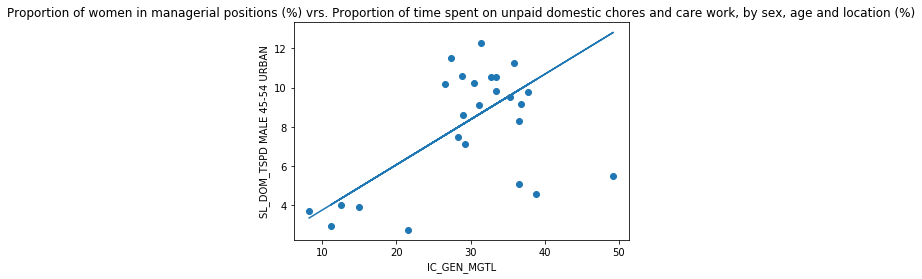

In [114]:
HuberRegressionDisplay("IC_GEN_MGTL", "SL_DOM_TSPD MALE 45-54 URBAN")

So seen here is a loose positive correlation between the proportion of women in management, and the porportion of time men(45-54) spend doing unpaid domestic work in urban areas. This makes intuitive sense, give that the more men there are to do unpaid domestic work in cities, the more women can break away from that traditional role and pursue managerial positions. Also note the outliers in the scatterplot, given the small amount of data this regression was applied to, they would have had a heavy influence had we not opted for a huber regression. 

Admittedly, each of these analysis is small, and each relationship only given the most basic information about, but given that this can be repeated for every value and relationship, and is contextualized within a network, this analytical pipeline can be used to explore and illustrate a wide array of analysis, and with an extension of some additional data preprocessing, repeated across all goals within the SDG set. 

<a class="anchor" id="Conclusion"></a>
# Conclusion

   In this model, we see a small sample of what is possible to accomplish with this methodology. The combination of regression and network construction can be used to illustrate not only the Sustainable Development Goals, but any large set of inter-connected statistics.

   In this sense, this proof of concept is remarkably small compared to what could be accomplished with more data and data processing. Within goal five, the large number of population sub groups and missing data might be a challenge, but it is a challenge possibly repeated across the other goals. Even so, we were able to develop a dataframe of relationships between indicators, and get a general sense of how connected each indicator was to one another. Furthermore, this data can be further explored.